In [1]:
pip install pandas matplotlib seaborn numpy scikit-learn Pillow wordcloud textblob nltk

Mounted at /content/drive


In [8]:

import pandas as pd

# Define the base path for your files

# Import data information
data = pd.read_csv('covid-19-all.csv',
                   usecols=['Country/Region', 'Province/State', 'Latitude', 'Longitude',
                            'Confirmed', 'Recovered', 'Deaths', 'Date'],
                   dtype={'Country/Region': str, 'Province/State': str, 'Latitude': float,
                          'Longitude': float, 'Confirmed': float, 'Recovered': float,
                          'Deaths': float},
                   parse_dates=['Date'])
data.rename(columns={"Country/Region": "Country", "Province/State": "State"}, inplace=True)

tweets = pd.read_csv('covid19_tweets.csv',
                     usecols=['user_name', 'user_location', 'user_description',
                              'user_created', 'user_followers', 'user_friends',
                              'user_favourites', 'user_verified', 'date', 'text',
                              'hashtags', 'source', 'is_retweet'],
                     dtype={'user_name': str, 'user_location': str,
                            'user_description': str, 'user_followers': float,
                            'user_friends': float, 'user_favourites': float,
                            'user_verified': bool, 'text': str,
                            'hashtags': str, 'source': str, 'is_retweet': bool},
                     parse_dates=['user_created', 'date'])



Country      State  Latitude  Longitude  Confirmed  Recovered  Deaths  \
0   China      Anhui   31.8257   117.2264        1.0        NaN     NaN   
1   China    Beijing   40.1824   116.4142       14.0        NaN     NaN   
2   China  Chongqing   30.0572   107.8740        6.0        NaN     NaN   
3   China     Fujian   26.0789   117.9874        1.0        NaN     NaN   
4   China      Gansu   35.7518   104.2861        NaN        NaN     NaN   

        Date  
0 2020-01-22  
1 2020-01-22  
2 2020-01-22  
3 2020-01-22  
4 2020-01-22

In [ ]:
# Inspect tweet data
tweets.head(2)

user_name user_location  \
0         ᏉᎥ☻լꂅϮ    astroworld   
1  Tom Basile 🇺🇸  New York, NY   

                                    user_description        user_created  \
0  wednesday addams as a disney princess keepin i... 2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth... 2009-04-16 20:06:23   

   user_followers  user_friends  user_favourites  user_verified  \
0           624.0         950.0          18775.0          False   
1          2253.0        1677.0             24.0           True   

                 date                                               text  \
0 2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1 2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   

  hashtags               source  is_retweet  
0      NaN   Twitter for iPhone       False  
1      NaN  Twitter for Android       False

In [ ]:
tweets.dtypes

user_name                   object
user_location               object
user_description            object
user_created        datetime64[ns]
user_followers             float64
user_friends               float64
user_favourites            float64
user_verified                 bool
date                datetime64[ns]
text                        object
hashtags                    object
source                      object
is_retweet                    bool
dtype: object

In [ ]:
data.dtypes

Country              object
State                object
Latitude            float64
Longitude           float64
Confirmed           float64
Recovered           float64
Deaths              float64
Date         datetime64[ns]
dtype: object

In [ ]:
c

<ipython-input-8-79701cc0928b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['Severe'] = (covid_df['Confirmed'] > threshold).astype(int)


Accuracy: 0.8299177944084687

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82     48401
           1       0.83      0.85      0.84     54755

    accuracy                           0.83    103156
   macro avg       0.83      0.83      0.83    103156
weighted avg       0.83      0.83      0.83    103156



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
mod_lin = LinearRegression()
mod_lin.fit(X_train,y_train)

y_pred = mod_lin.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)  # If squared=False, returns RMSE
print("Root Mean Squared Error (RMSE):", rmse)

# R² Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.4678923741256554
Mean Squared Error (MSE): 0.23325346457410426
Root Mean Squared Error (RMSE): 0.4829632124438716
R-squared (R²): 0.06317208987989964


In [ ]:
c

Mean Absolute Error (MAE): 0.23169892098597955
Mean Squared Error (MSE): 0.11700753783046884
Root Mean Squared Error (RMSE): 0.3420636458767123
R-squared (R²): 0.5300565960117094


In [ ]:
from xgboost.sklearn import XGBRegressor

xgbmodel = XGBRegressor()
xgbmodel.fit(X_train,y_train)

y_pred = xgbmodel.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)  # If squared=False, returns RMSE
print("Root Mean Squared Error (RMSE):", rmse)

# R² Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 0.295132155528668
Mean Squared Error (MSE): 0.1367291868349898
Root Mean Squared Error (RMSE): 0.36976909935118946
R-squared (R²): 0.4508475207906303


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Accuracy: 0.6467486137500484

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.60      0.61     48287
           1       0.66      0.69      0.67     54869

    accuracy                           0.65    103156
   macro avg       0.65      0.64      0.64    103156
weighted avg       0.65      0.65      0.65    103156



In [ ]:
"""
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

tweets_df = tweets.copy()

tweets_df['user_verified'] = tweets_df['user_verified'].astype(int)

user_profiles = tweets_df[['user_name', 'user_location', 'user_followers', 'user_friends', 'user_verified']].drop_duplicates(subset='user_name')

location_vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
location_matrix = location_vectorizer.fit_transform(user_profiles['user_location'].astype(str))

scaler = StandardScaler()
numerical_features = scaler.fit_transform(user_profiles[['user_followers', 'user_friends', 'user_verified']])

combined_features = np.hstack((numerical_features, location_matrix.toarray()))

cosine_sim_matrix = cosine_similarity(combined_features)

user_ids = user_profiles['user_name']
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=user_ids, columns=user_ids)

def get_similar_users(user_name, cosine_sim_df, number_of_users=3):
    if user_name not in cosine_sim_df.index:
        return 'User not found.'
    else:

        sim_values = cosine_sim_df.loc[user_name]
        most_similar_users = sim_values.sort_values(ascending=False).iloc[1:number_of_users+1].index.tolist()
        return most_similar_users

example_user_name = user_profiles['user_name'].iloc[0]
similar_users = get_similar_users(example_user_name, cosine_sim_df)
print(f"Users similar to '{example_user_name}': {similar_users}")

"""

In [ ]:
c

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=395f0f678fb0cc3916ac8d4651d0ea4261a83ef8427825ac84164c7898944f38
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built nrclex


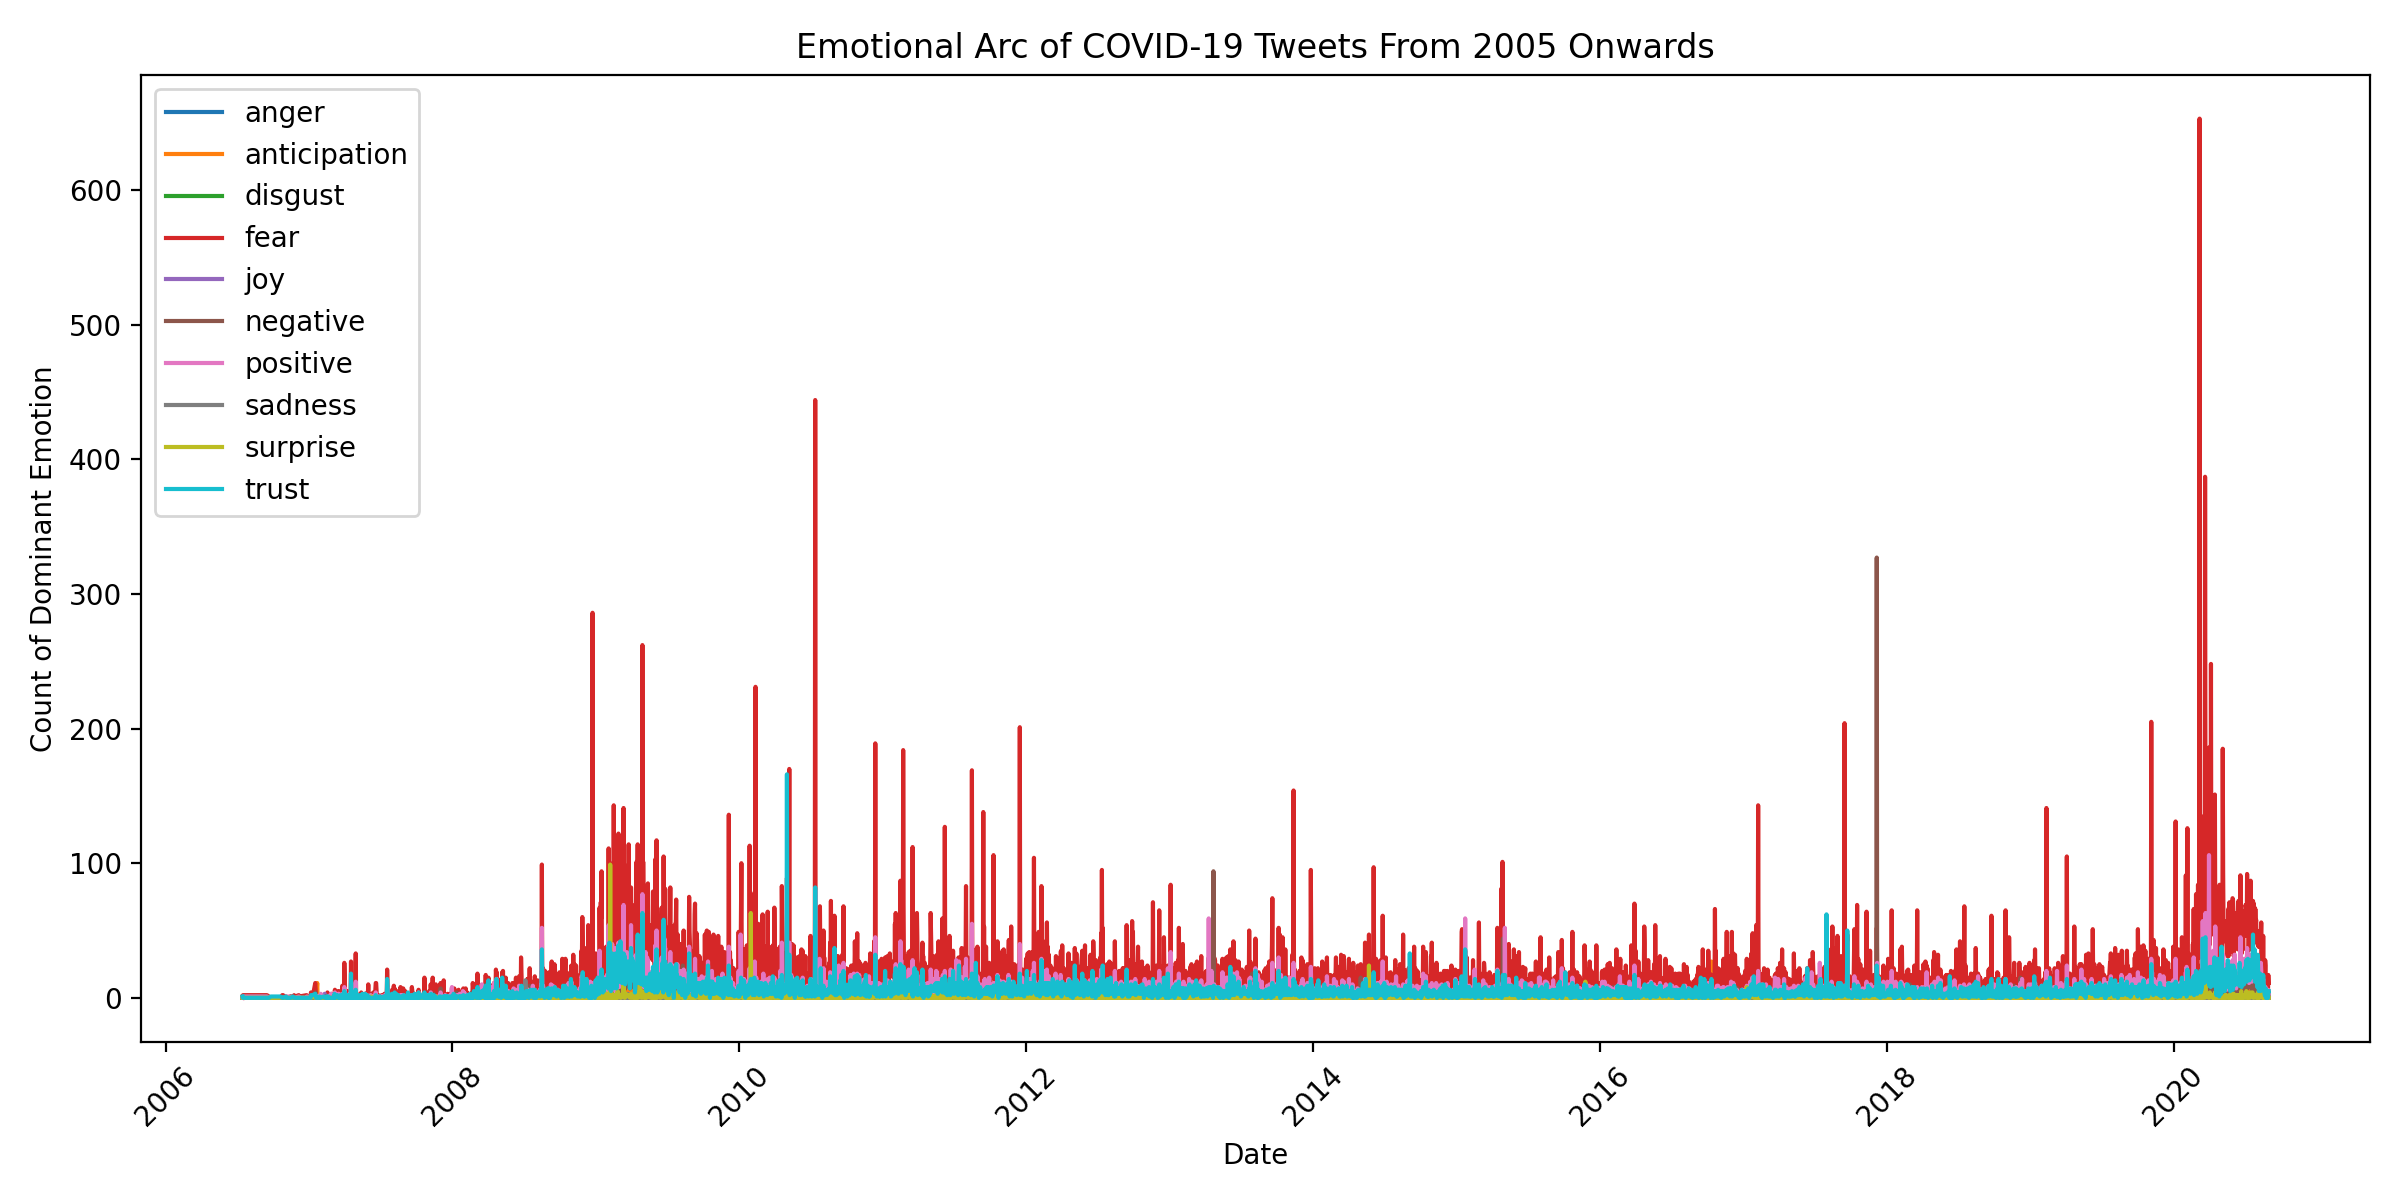

In [ ]:
# Additional data import
base_path = '/content/drive/My Drive/IS688_PiyushaSayal/'

worldcities = pd.read_csv(base_path + 'worldcitiespop.csv',
                          usecols=['Country', 'City', 'AccentCity', 'Region',
                                   'Population', 'Latitude', 'Longitude'],
                          dtype={'Country': str, 'City': str, 'AccentCity': str,
                                 'Region': str, 'Population': float,
                                 'Latitude': float, 'Longitude': float})


In [ ]:
worldcities.head(2)

Country        City  AccentCity Region  Population   Latitude  Longitude
0      ad       aixas       Aixàs     06         NaN  42.483333   1.466667
1      ad  aixirivali  Aixirivali     06         NaN  42.466667   1.500000

In [ ]:
!pip install missingno

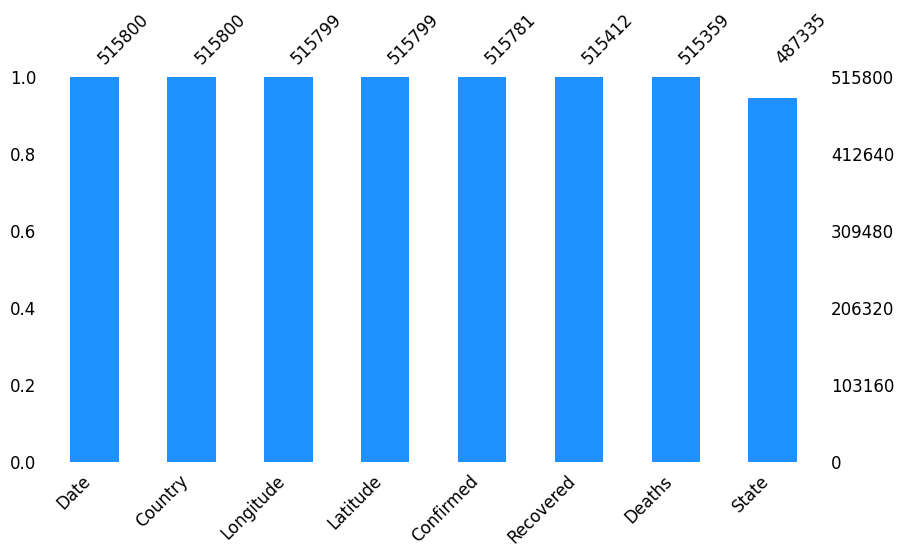

<Figure size 1200x600 with 0 Axes>

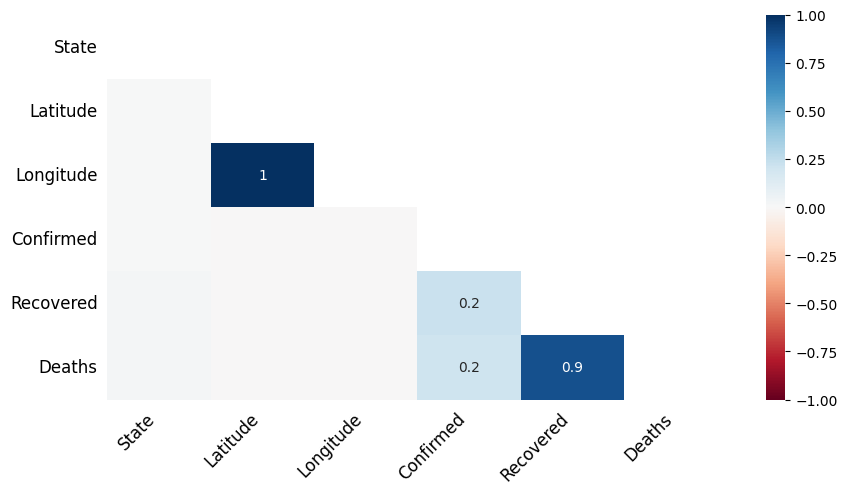

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# Assuming 'data' is a pandas DataFrame already loaded with your data

# Plot a bar chart of missing values
plt.figure(figsize=(12, 6))
msno.bar(data, color="dodgerblue", sort="descending", figsize=(10,5), fontsize=12)
plt.show()

# Plot a heatmap to see the correlation of missingness between different columns
plt.figure(figsize=(12, 6))
msno.heatmap(data, figsize=(10,5), fontsize=12)
plt.show()


In [ ]:
data = data.dropna(subset=['Confirmed'])

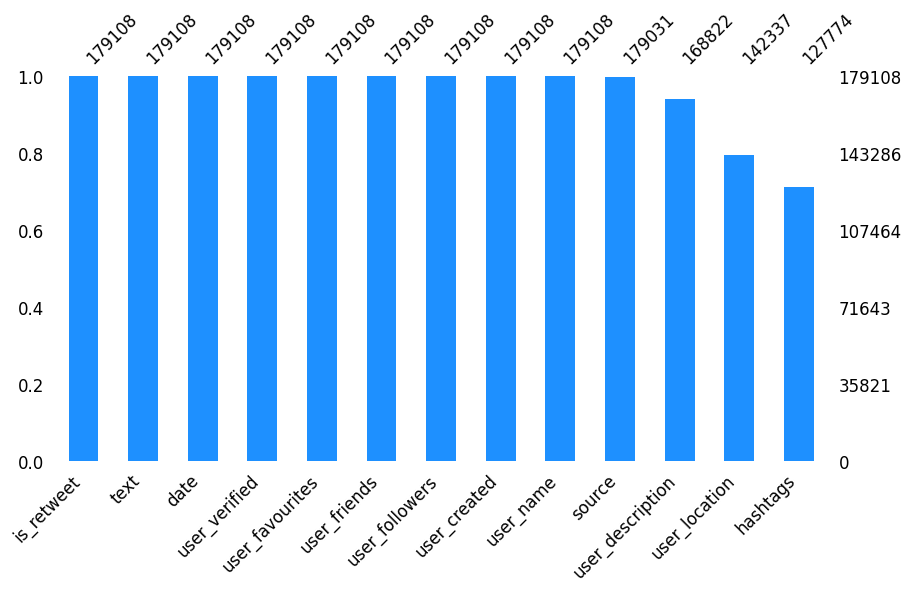

<Figure size 1200x600 with 0 Axes>

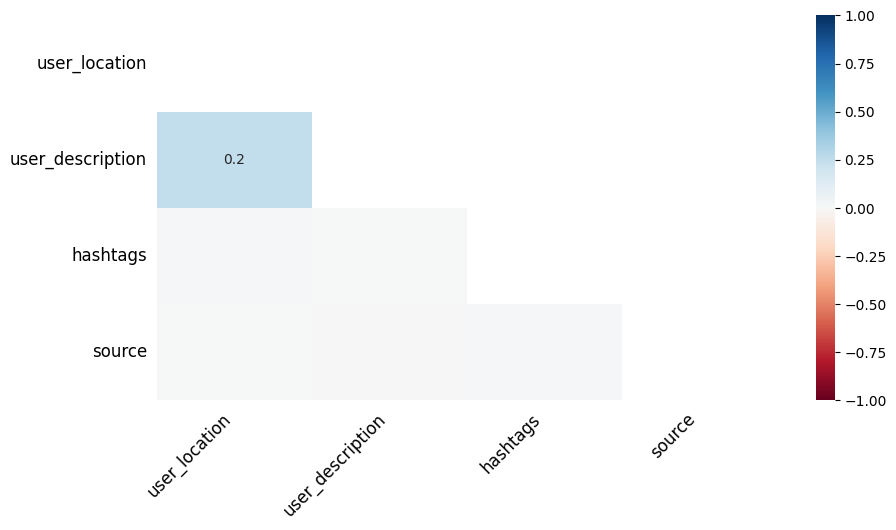

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# Assuming 'data' is a pandas DataFrame already loaded with your data

# Plot a bar chart of missing values
plt.figure(figsize=(12, 6))
msno.bar(tweets, color="dodgerblue", sort="descending", figsize=(10,5), fontsize=12)
plt.show()

# Plot a heatmap to see the correlation of missingness between different columns
plt.figure(figsize=(12, 6))
msno.heatmap(tweets, figsize=(10,5), fontsize=12)
plt.show()


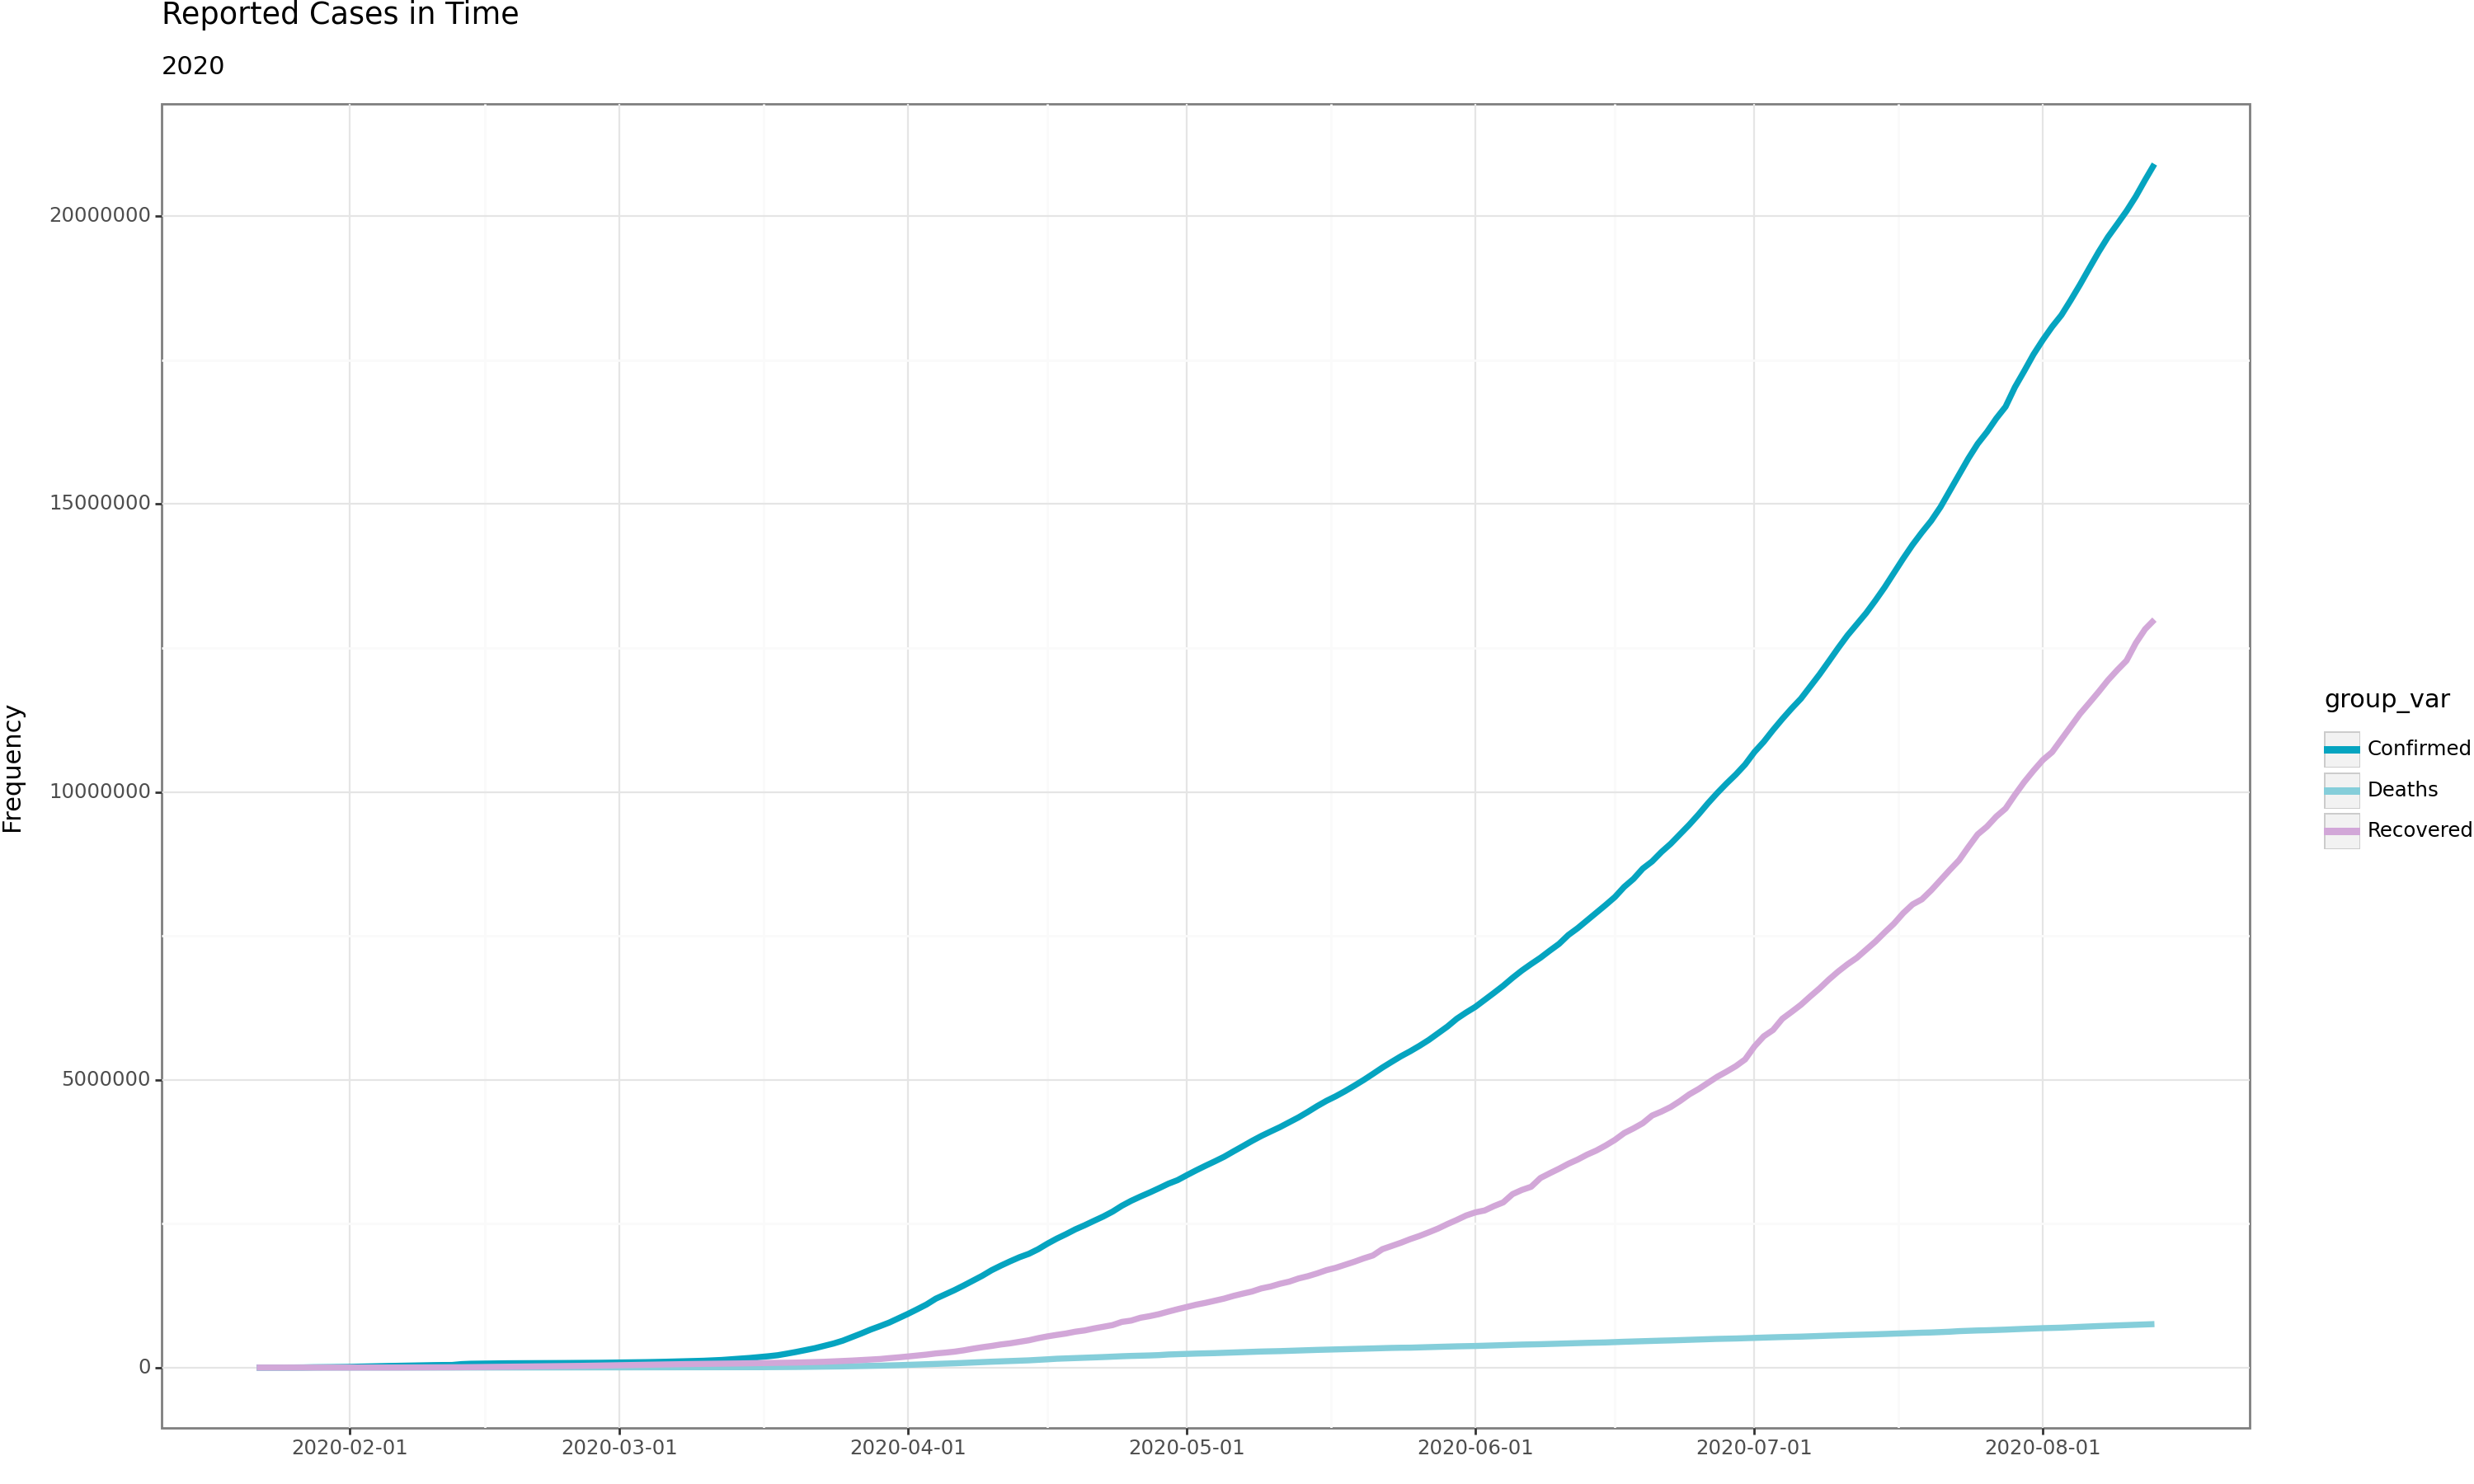

In [ ]:
import pandas as pd
from plotnine import *

# Assuming 'data' is already loaded as a pandas DataFrame with your COVID data
# and 'my_colors' is a list of color hex codes defined previously

# Select and transform the data
tidy_data = (
    data[['Date', 'Confirmed', 'Recovered', 'Deaths']]
    .melt(id_vars=['Date'], var_name='group_var', value_name='Cases')
    .dropna(subset=['Cases'])  # This drops rows where 'Cases' is NA
    .groupby(['Date', 'group_var'], as_index=False)
    .agg(n=('Cases', 'sum'))
)

# The latest date in the dataset
latest_date = tidy_data['Date'].max()

# Adding labels for the latest date
tidy_data['label'] = tidy_data.apply(lambda x: x['group_var'] if x['Date'] == latest_date else '', axis=1)

# Plotting
plot = (
    ggplot(tidy_data, aes(x='Date', y='n', color='group_var'))
    + geom_line(size=1.5)
    + scale_color_manual(values=my_colors)
    + labs(title='Reported Cases in Time', subtitle='2020', y='Frequency', x='')
    + theme_bw()
    + theme(figure_size=(15, 9), axis_title_x=element_blank(), plot_margin=0)
)


print(plot)

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 15 rows containing missing values.


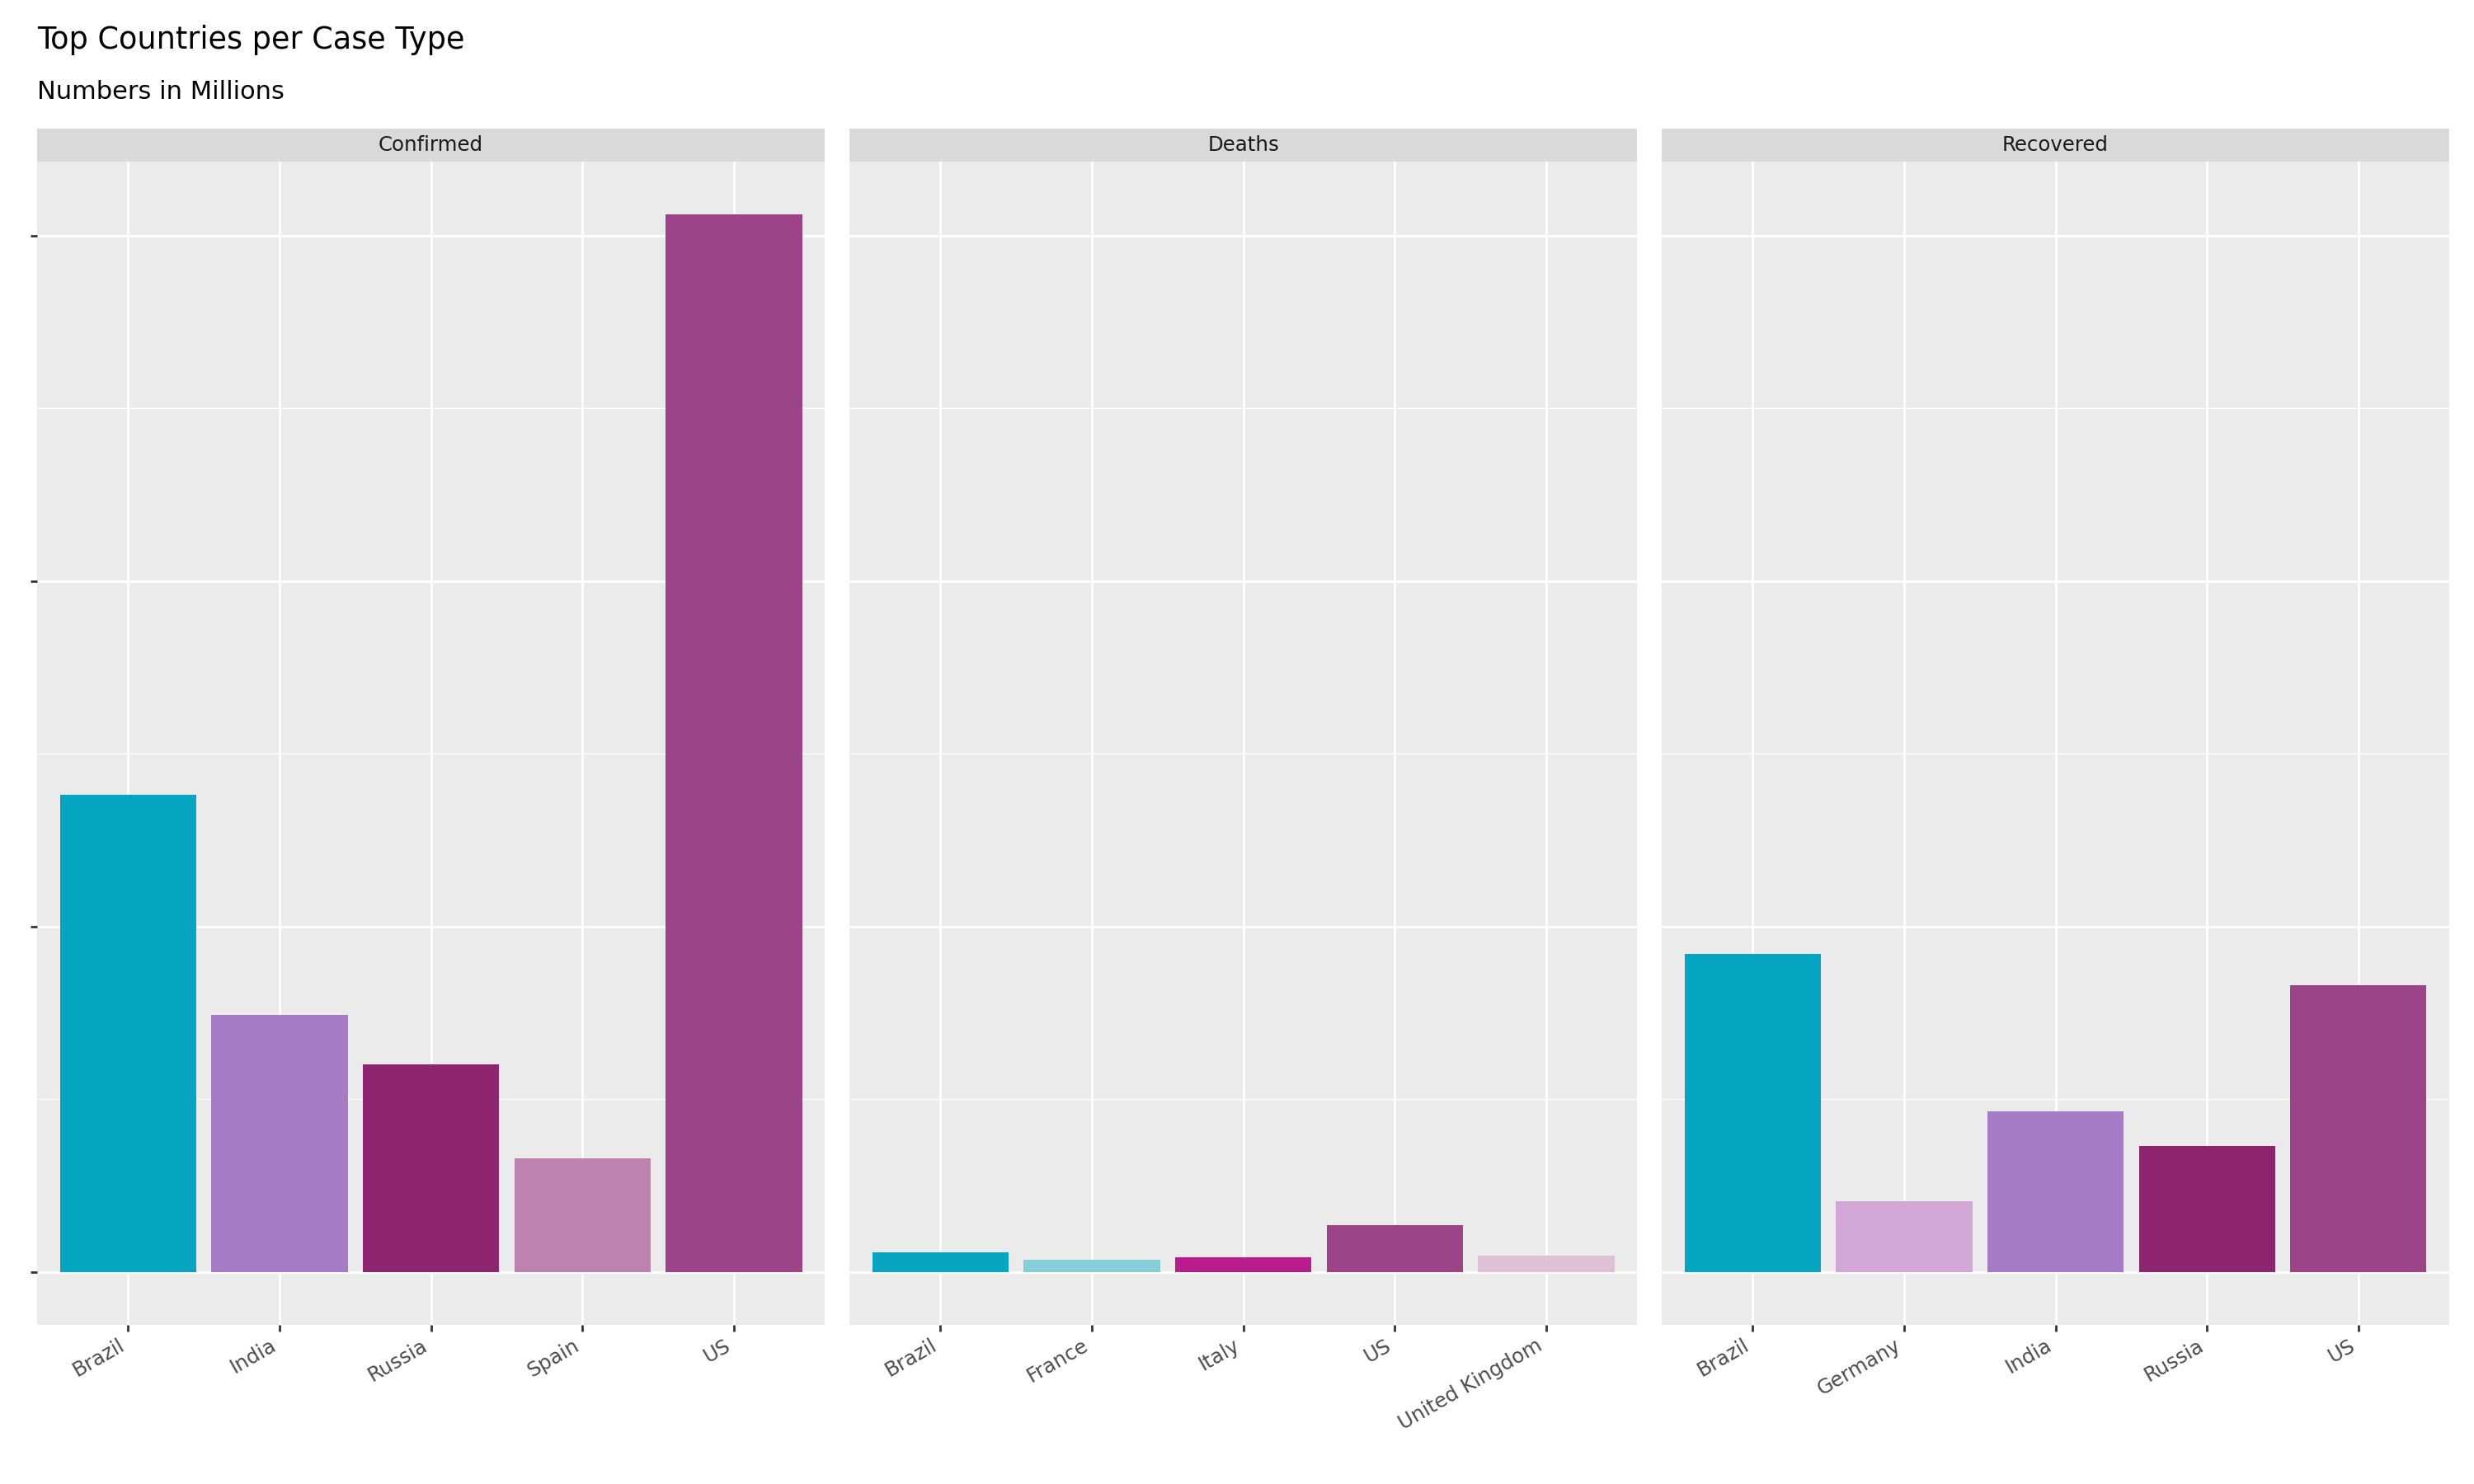

In [ ]:
import pandas as pd
from plotnine import *

# Assuming 'data' is already loaded as a pandas DataFrame with your COVID data
# and 'my_colors' is a list of color hex codes defined previously

# Data transformation
tidy_data = (
    data[['Country', 'Confirmed', 'Recovered', 'Deaths']]
    .melt(id_vars=['Country'], var_name='group_var', value_name='Cases')
    .groupby(['Country', 'group_var'])
    .agg(n=('Cases', 'sum'))
    .reset_index()
    .sort_values('n', ascending=False)
    .groupby('group_var')
    .head(5)
)

# Plotting
plot = (
    ggplot(tidy_data, aes(x='Country', y='n', fill='Country'))
    + geom_bar(stat='identity', show_legend=False)
    + facet_grid('~ group_var', scales='free')
    + scale_fill_manual(values=my_colors + ["#BE82AF", "#9D4387", "#DEC0D7"])
    + geom_text(aes(label=round(tidy_data['n']/1000000, 1)), size=10, color='white')
    + labs(title='Top Countries per Case Type', subtitle='Numbers in Millions')
    + theme(figure_size=(15, 9), axis_text_x=element_text(rotation=30, hjust=1),
            axis_text_y=element_blank(), axis_title=element_blank())
)

# Display the plot
plot.draw()

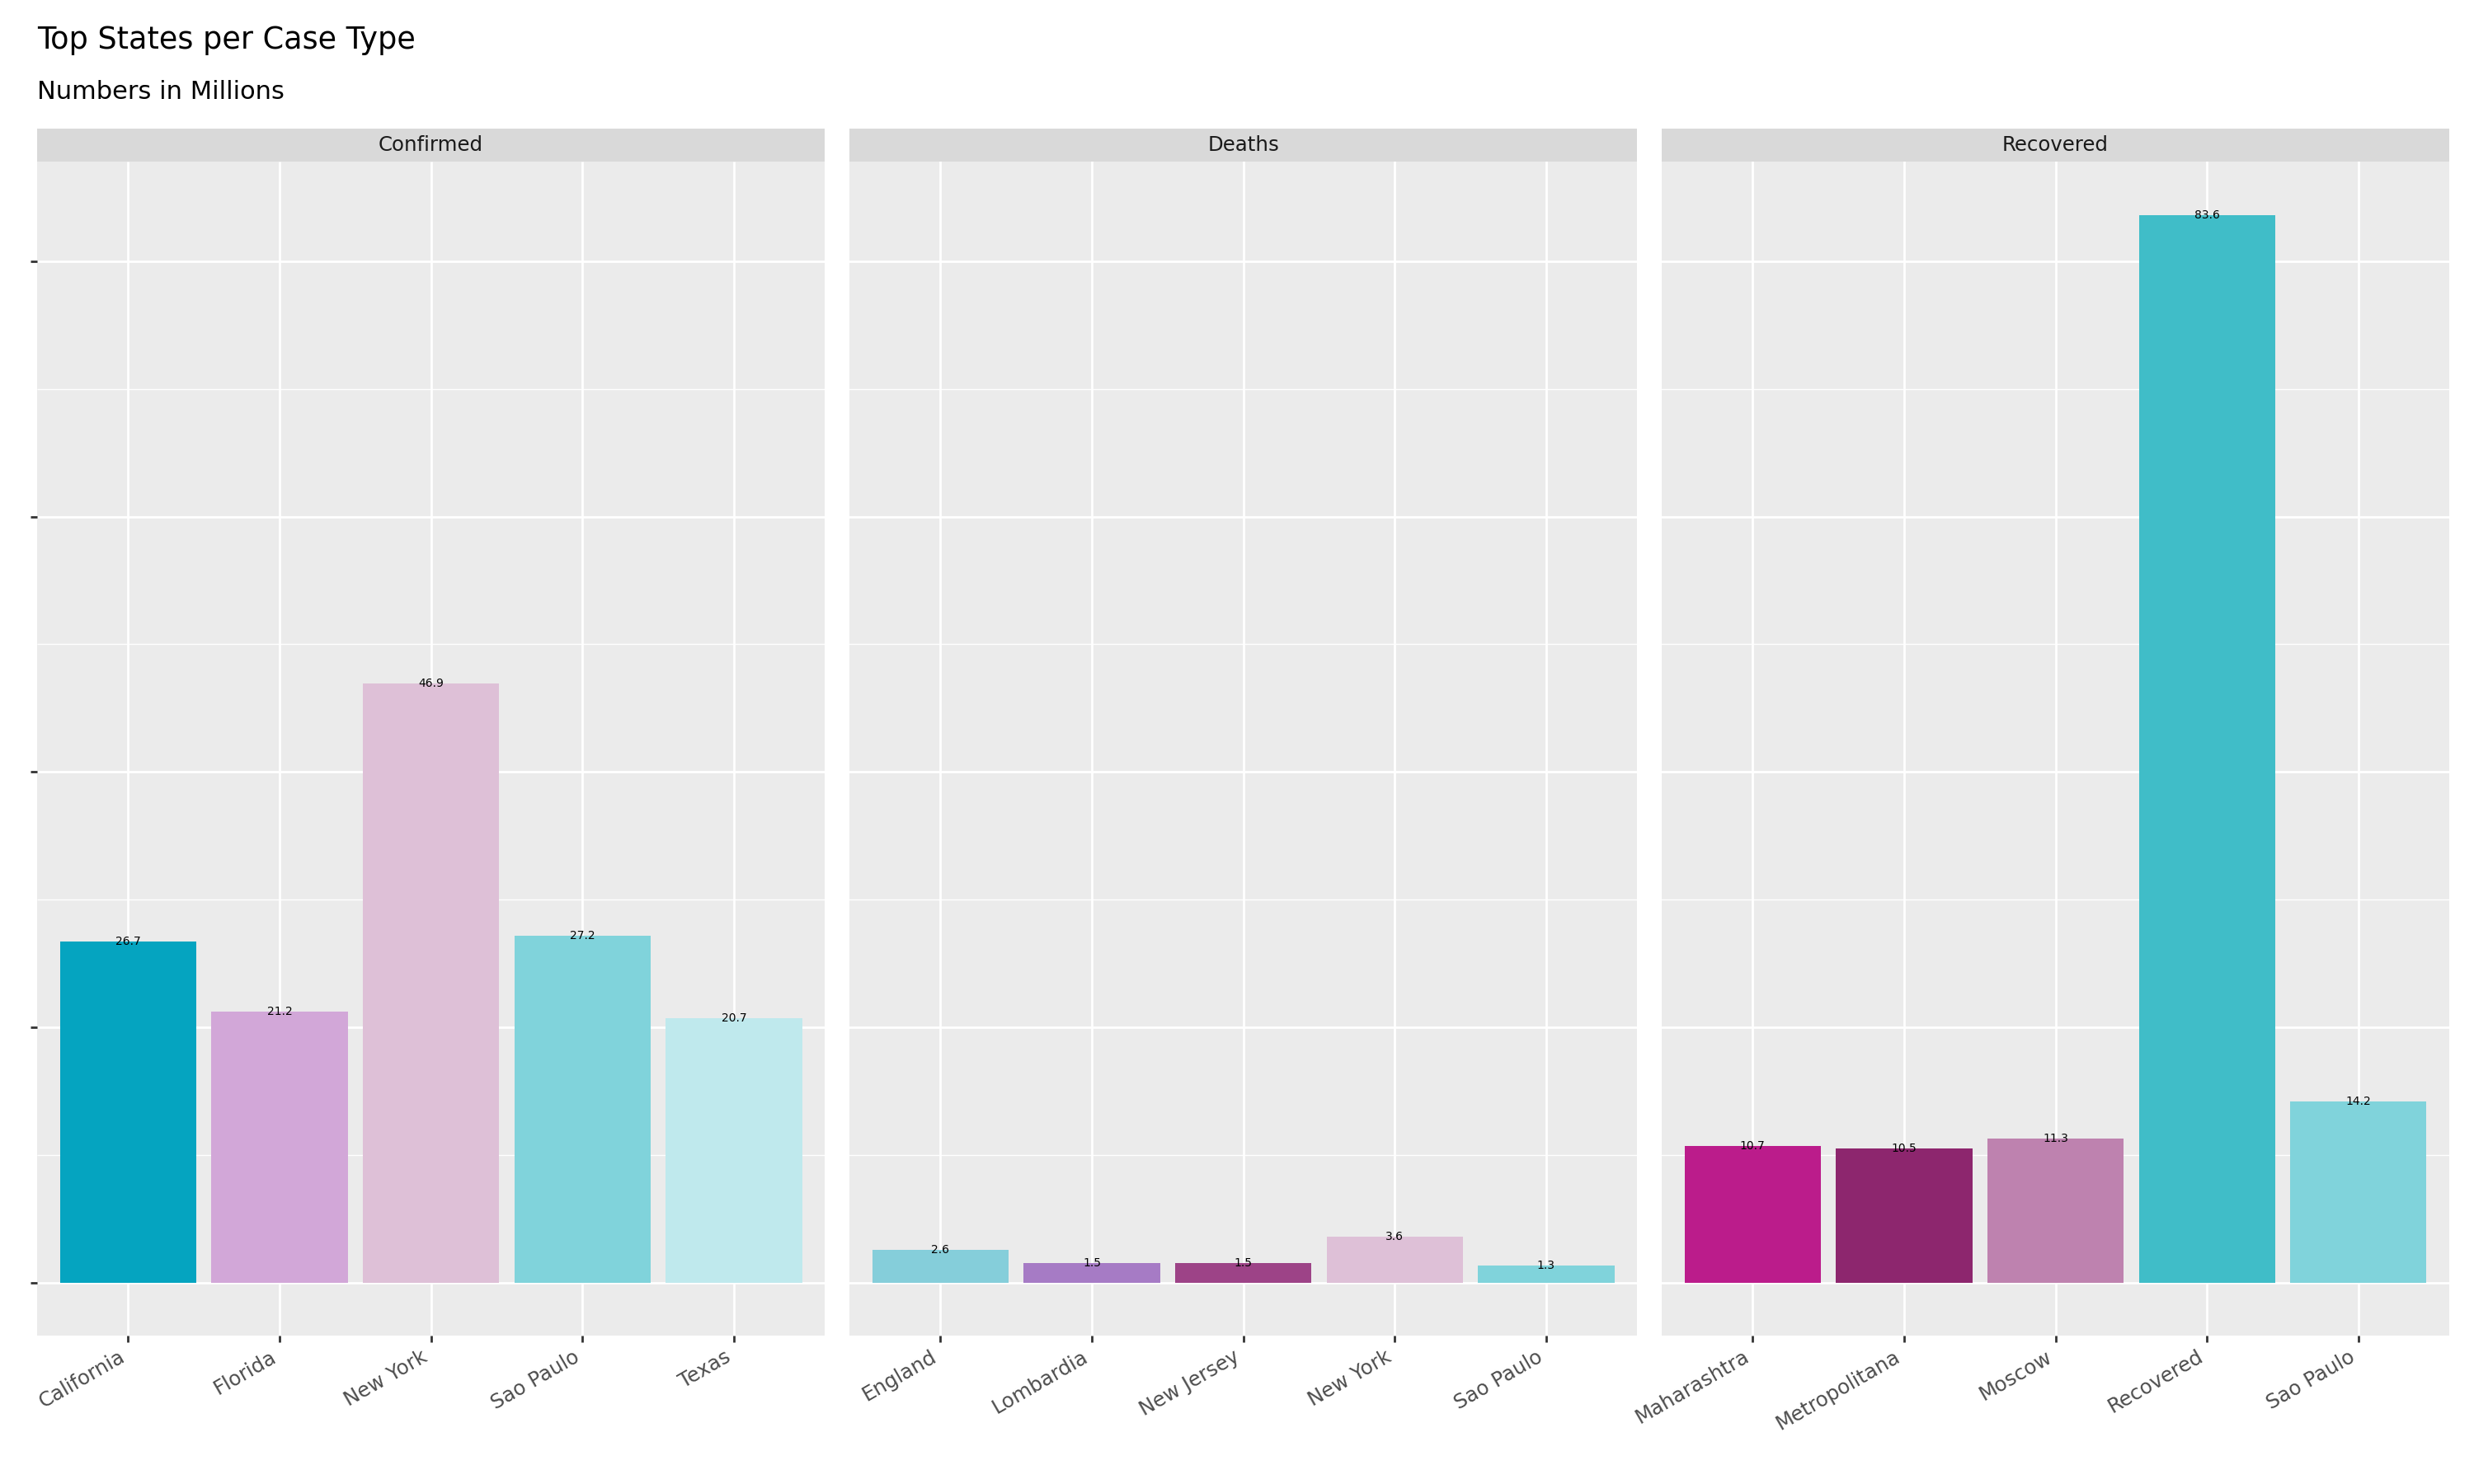

In [ ]:
import pandas as pd
from plotnine import *

# Assuming 'data' is a pandas DataFrame already loaded with your COVID data
# and 'my_colors' is a list of color hex codes defined previously

# We only want to sum numeric columns, not datetime or other non-numeric columns
numeric_cols = ['Confirmed', 'Recovered', 'Deaths']  # Adjust if there are other numeric columns

# Filter out unwanted 'State' values and then reshape the data
tidy_data = (
    data[data['State'].notna() & ~data['State'].isin(['Unknown'])]  # Updated filter condition
    .melt(id_vars=['State'], var_name='group_var', value_name='Cases',
          value_vars=numeric_cols)  # Only melt numeric columns
    .groupby(['State', 'group_var'], as_index=False)
    .agg(n=('Cases', 'sum'))  # Ensure that only numeric data is being summed
    .sort_values('n', ascending=False)
    .groupby('group_var')
    .head(5)
    .reset_index(drop=True)
)

# Create the plot
plot = (
    ggplot(tidy_data, aes(x='State', y='n', fill='State'))
    + geom_bar(stat='identity')
    + facet_grid('~ group_var', scales='free')
    + scale_fill_manual(values=my_colors + ["#BE82AF", "#9D4387", "#DEC0D7",
                                            "#40BDC8", "#80D3DB", "#BFE9ED"], guide=False)
    + geom_text(aes(label=round(tidy_data['n'] / 1e6, 1)), size=5)
    + labs(title='Top States per Case Type', subtitle='Numbers in Millions')
    + theme(figure_size=(15, 9), axis_text_x=element_text(rotation=30, hjust=1, vjust=1),
            axis_text_y=element_blank(), axis_title=element_blank())
)


# Display the plot
plot.draw()


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

def clean_corpus(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Convert to lowercase and remove punctuation and numbers
    words = [word.lower() for word in words if word.isalpha()]

    # Prepare a list of stopwords
    stop_words = set(stopwords.words('english'))
    additional_stopwords = {"thats", "weve", "hes", "theres", "ive", "im",
                            "will", "can", "cant", "dont", "youve", "us",
                            "youre", "youll", "theyre", "whats", "didnt"}
    all_stopwords = stop_words.union(additional_stopwords)

    # Remove stopwords
    words = [word for word in words if word not in all_stopwords]

    # Return the cleaned list of words
    return ' '.join(words)

# Example usage:
cleaned_text = clean_corpus("Your input text here, including punctuation and numbers like 123.")
print(cleaned_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


input text including punctuation numbers like


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
pip install nltk scikit-learn

In [ ]:
import nltk
from nltk import bigrams, trigrams
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')

# Assuming the clean_corpus function is defined as in the previous example

# Unigram Frequency Function
def frequent_terms(texts):
    vectorizer = CountVectorizer(stop_words='english')
    x = vectorizer.fit_transform(texts)
    freqs = zip(vectorizer.get_feature_names_out(), x.sum(axis=0).tolist()[0])
    word_freqs = sorted(freqs, key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(word_freqs, columns=['word', 'freq'])
    return df[df['freq'] > 1]  # Adjust this number as needed to handle sparsity

# Bigram Frequency Function
def frequent_bigrams(texts):
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
    x = vectorizer.fit_transform(texts)
    freqs = zip(vectorizer.get_feature_names_out(), x.sum(axis=0).tolist()[0])
    word_freqs = sorted(freqs, key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(word_freqs, columns=['word', 'freq'])
    return df[df['freq'] > 1]  # Adjust this number as needed to handle sparsity

# Trigram Frequency Function
def frequent_trigrams(texts):
    vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
    x = vectorizer.fit_transform(texts)
    freqs = zip(vectorizer.get_feature_names_out(), x.sum(axis=0).tolist()[0])
    word_freqs = sorted(freqs, key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(word_freqs, columns=['word', 'freq'])
    return df[df['freq'] > 1]  # Adjust this number as needed to handle sparsity

"""
# Example Usage:
cleaned_texts = [clean_corpus(text) for text in texts]  # list_of_texts should be your list of documents

# Get frequent unigrams
df_unigrams = frequent_terms(cleaned_texts)
print(df_unigrams)

# Get frequent bigrams
df_bigrams = frequent_bigrams(cleaned_texts)
print(df_bigrams)

# Get frequent trigrams
df_trigrams = frequent_trigrams(cleaned_texts)
print(df_trigrams)
"""

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'\n# Example Usage:\ncleaned_texts = [clean_corpus(text) for text in texts]  # list_of_texts should be your list of documents\n\n# Get frequent unigrams\ndf_unigrams = frequent_terms(cleaned_texts)\nprint(df_unigrams)\n\n# Get frequent bigrams\ndf_bigrams = frequent_bigrams(cleaned_texts)\nprint(df_bigrams)\n\n# Get frequent trigrams\ndf_trigrams = frequent_trigrams(cleaned_texts)\nprint(df_trigrams)\n'

In [ ]:
import pandas as pd

# Define your file paths
afinn_file_path = '/content/drive/My Drive/IS688_PiyushaSayal/Afinn.csv'
bing_file_path = '/content/drive/My Drive/IS688_PiyushaSayal/Bing.csv'
nrc_file_path = '/content/drive/My Drive/IS688_PiyushaSayal/NRC.csv'

# Read in the CSV files
afinn = pd.read_csv(afinn_file_path, dtype={'word': str, 'value': float}, encoding='latin1')
bing = pd.read_csv(bing_file_path, dtype={'word': str, 'sentiment': str}, encoding='latin1')
nrc = pd.read_csv(nrc_file_path, dtype={'word': str, 'sentiment': str}, encoding='latin1')

# Display the first few rows of the dataframes to confirm
print(afinn.head())
print(bing.head())
print(nrc.head())

        word  value
0    abandon   -2.0
1  abandoned   -2.0
2   abandons   -2.0
3   abducted   -2.0
4  abduction   -2.0
         word sentiment
0     2-faces  negative
1    abnormal  negative
2     abolish  negative
3  abominable  negative
4  abominably  negative
        word sentiment
0     abacus     trust
1    abandon      fear
2    abandon  negative
3    abandon   sadness
4  abandoned     anger


In [ ]:
import pandas as pd

# Assuming 'tweets' is already loaded as a pandas DataFrame with your tweets data

# Convert user_location to lower case and count the occurrences
tweets_location = (
    tweets.assign(user_location=tweets['user_location'].str.lower())  # Convert to lower case
    .groupby('user_location')  # Group by user_location
    .size()  # Count the occurrences
    .reset_index(name='n')  # Convert series to DataFrame and name the count column as 'n'
    .sort_values(by='n', ascending=False)  # Sort by count in descending order
)

# Create a new column and fill it with NA
tweets_location['country'] = pd.NA

# Display the first few rows to confirm
print(tweets_location.head())

          user_location     n country
10292             india  3842    <NA>
23071     united states  2457    <NA>
24904         worldwide  1738    <NA>
15306  new delhi, india  1731    <NA>
14716     mumbai, india  1406    <NA>


In [ ]:
import pandas as pd

# Assuming tweets_location is a DataFrame with a 'user_location' column

# Define a function to assign country based on location keywords
def assign_country(location):
    location = location.lower()
    if 'india' in location or 'delhi' in location or 'mumbai' in location or \
       'bengaluru' in location or 'bangalore' in location or 'bhubaneswar' in location or \
       'hyderabad' in location:
        return 'India'
    # Add additional conditions for other countries and cities
    elif 'china' in location or 'beijing' in location:
        return 'China'
    elif 'hong kong' in location:
        return 'Hong Kong'
    # ... repeat for other keywords and countries
    elif 'united states' in location or 'usa' in location or 'us' in location or \
         'washington' in location or 'new york' in location or 'angeles' in location or \
         'atlanta' in location or 'california' in location or 'chicago' in location or \
         'boston' in location or 'philadelphia' in location or 'diego' in location or \
         'seattle' in location or 'texas' in location or 'nyc' in location or \
         'vegas' in location or 'francisco' in location or 'florida' in location or \
         'dallas' in location or 'denver' in location:
        return 'US'
    elif 'worldwide' in location or 'global' in location or 'earth' in location or \
         'everywhere' in location:
        return 'NoCountry'
    # ... and so on for the rest of the keywords
    else:
        return pd.NA  # Use pd.NA for missing values in Pandas

# Apply the function to the 'user_location' column to create a new 'country' column
tweets_location['country'] = tweets_location['user_location'].apply(assign_country)

# If needed, the resulting DataFrame can be examined or exported
print(tweets_location.head())

          user_location     n    country
10292             india  3842      India
23071     united states  2457         US
24904         worldwide  1738  NoCountry
15306  new delhi, india  1731      India
14716     mumbai, india  1406      India


In [ ]:
# Filter to get US cities and clean up the data
us_cities = worldcities[worldcities['Country'] == "us"].copy()
us_cities['Country'] = "US"
us_cities = us_cities[['Country', 'City', 'AccentCity']]

# Create a set of US city names for faster membership checking
us_city_set = set(us_cities['City'].str.lower())

# Check if each location in tweets_location is in the set of US cities
tweets_location['flag_us'] = tweets_location['user_location'].str.lower().isin(us_city_set)


In [ ]:
# Assuming 'tweets' and 'tweets_location' are already loaded as pandas DataFrames

# Perform a left join on the 'user_location' column
tweets = tweets.merge(tweets_location, on='user_location', how='left')

# Drop the 'n' and 'flag_us' columns from the tweets DataFrame
tweets = tweets.drop(columns=['n', 'flag_us'])


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Assuming 'tweets' is your pandas DataFrame and it has a column named 'text'

# Ensure the 'text' column is of type string
tweets['text'] = tweets['text'].astype(str)

# Tokenize the 'text' column
tweets['words'] = tweets['text'].apply(nltk.word_tokenize)

# Explode the 'words' list into separate rows
unnest_tweets = tweets.explode('words').rename(columns={'words': 'word'})

# Now unnest_tweets contains individual tokens in the 'word' column, similar to unnest_tokens
print(unnest_tweets.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  user_name user_location                                   user_description  \
0    ᏉᎥ☻լꂅϮ    astroworld  wednesday addams as a disney princess keepin i...   
0    ᏉᎥ☻լꂅϮ    astroworld  wednesday addams as a disney princess keepin i...   
0    ᏉᎥ☻լꂅϮ    astroworld  wednesday addams as a disney princess keepin i...   
0    ᏉᎥ☻լꂅϮ    astroworld  wednesday addams as a disney princess keepin i...   
0    ᏉᎥ☻լꂅϮ    astroworld  wednesday addams as a disney princess keepin i...   

         user_created  user_followers  user_friends  user_favourites  \
0 2017-05-26 05:46:42           624.0         950.0          18775.0   
0 2017-05-26 05:46:42           624.0         950.0          18775.0   
0 2017-05-26 05:46:42           624.0         950.0          18775.0   
0 2017-05-26 05:46:42           624.0         950.0          18775.0   
0 2017-05-26 05:46:42           624.0         950.0          18775.0   

   user_verified                date  \
0          False 2020-07-25 12:27:21   
0     

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Make sure to download the stopwords dataset from nltk
nltk.download('stopwords')

# Combine nltk's English stopwords with your custom list
custom_stopwords = ["thats", "weve", "hes", "theres", "ive", "im",
                    "will", "can", "cant", "dont", "youve", "us",
                    "youre", "youll", "theyre", "whats", "didnt", "just"]

all_stopwords = stopwords.words('english') + custom_stopwords

# Create a dataframe with these stopwords
stopwords_script = pd.DataFrame({'word': all_stopwords})

# Display the dataframe
print(stopwords_script.head())


     word
0       i
1      me
2      my
3  myself
4      we


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd

# Assuming 'tweets' is your pandas DataFrame with a 'date' column

# Convert 'date' column to datetime type if it's not already
tweets['date'] = pd.to_datetime(tweets['date'])

# Extract day of month and month from 'date' column
tweets['day_of_month'] = tweets['date'].dt.day
tweets['month'] = tweets['date'].dt.month

# Define a function to determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to the 'month' column to create the 'season' column
tweets['season'] = tweets['month'].apply(get_season)

# Display the modified DataFrame
print(tweets.head())


         user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description        user_created  \
0  wednesday addams as a disney princess keepin i... 2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth... 2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re... 2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ... 2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf... 2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0           624.0         950.0          18775.0          False   
1          2253.0        1677.0             24.0           True   
2          9275.0        9525.0           7254.0          False   
3         

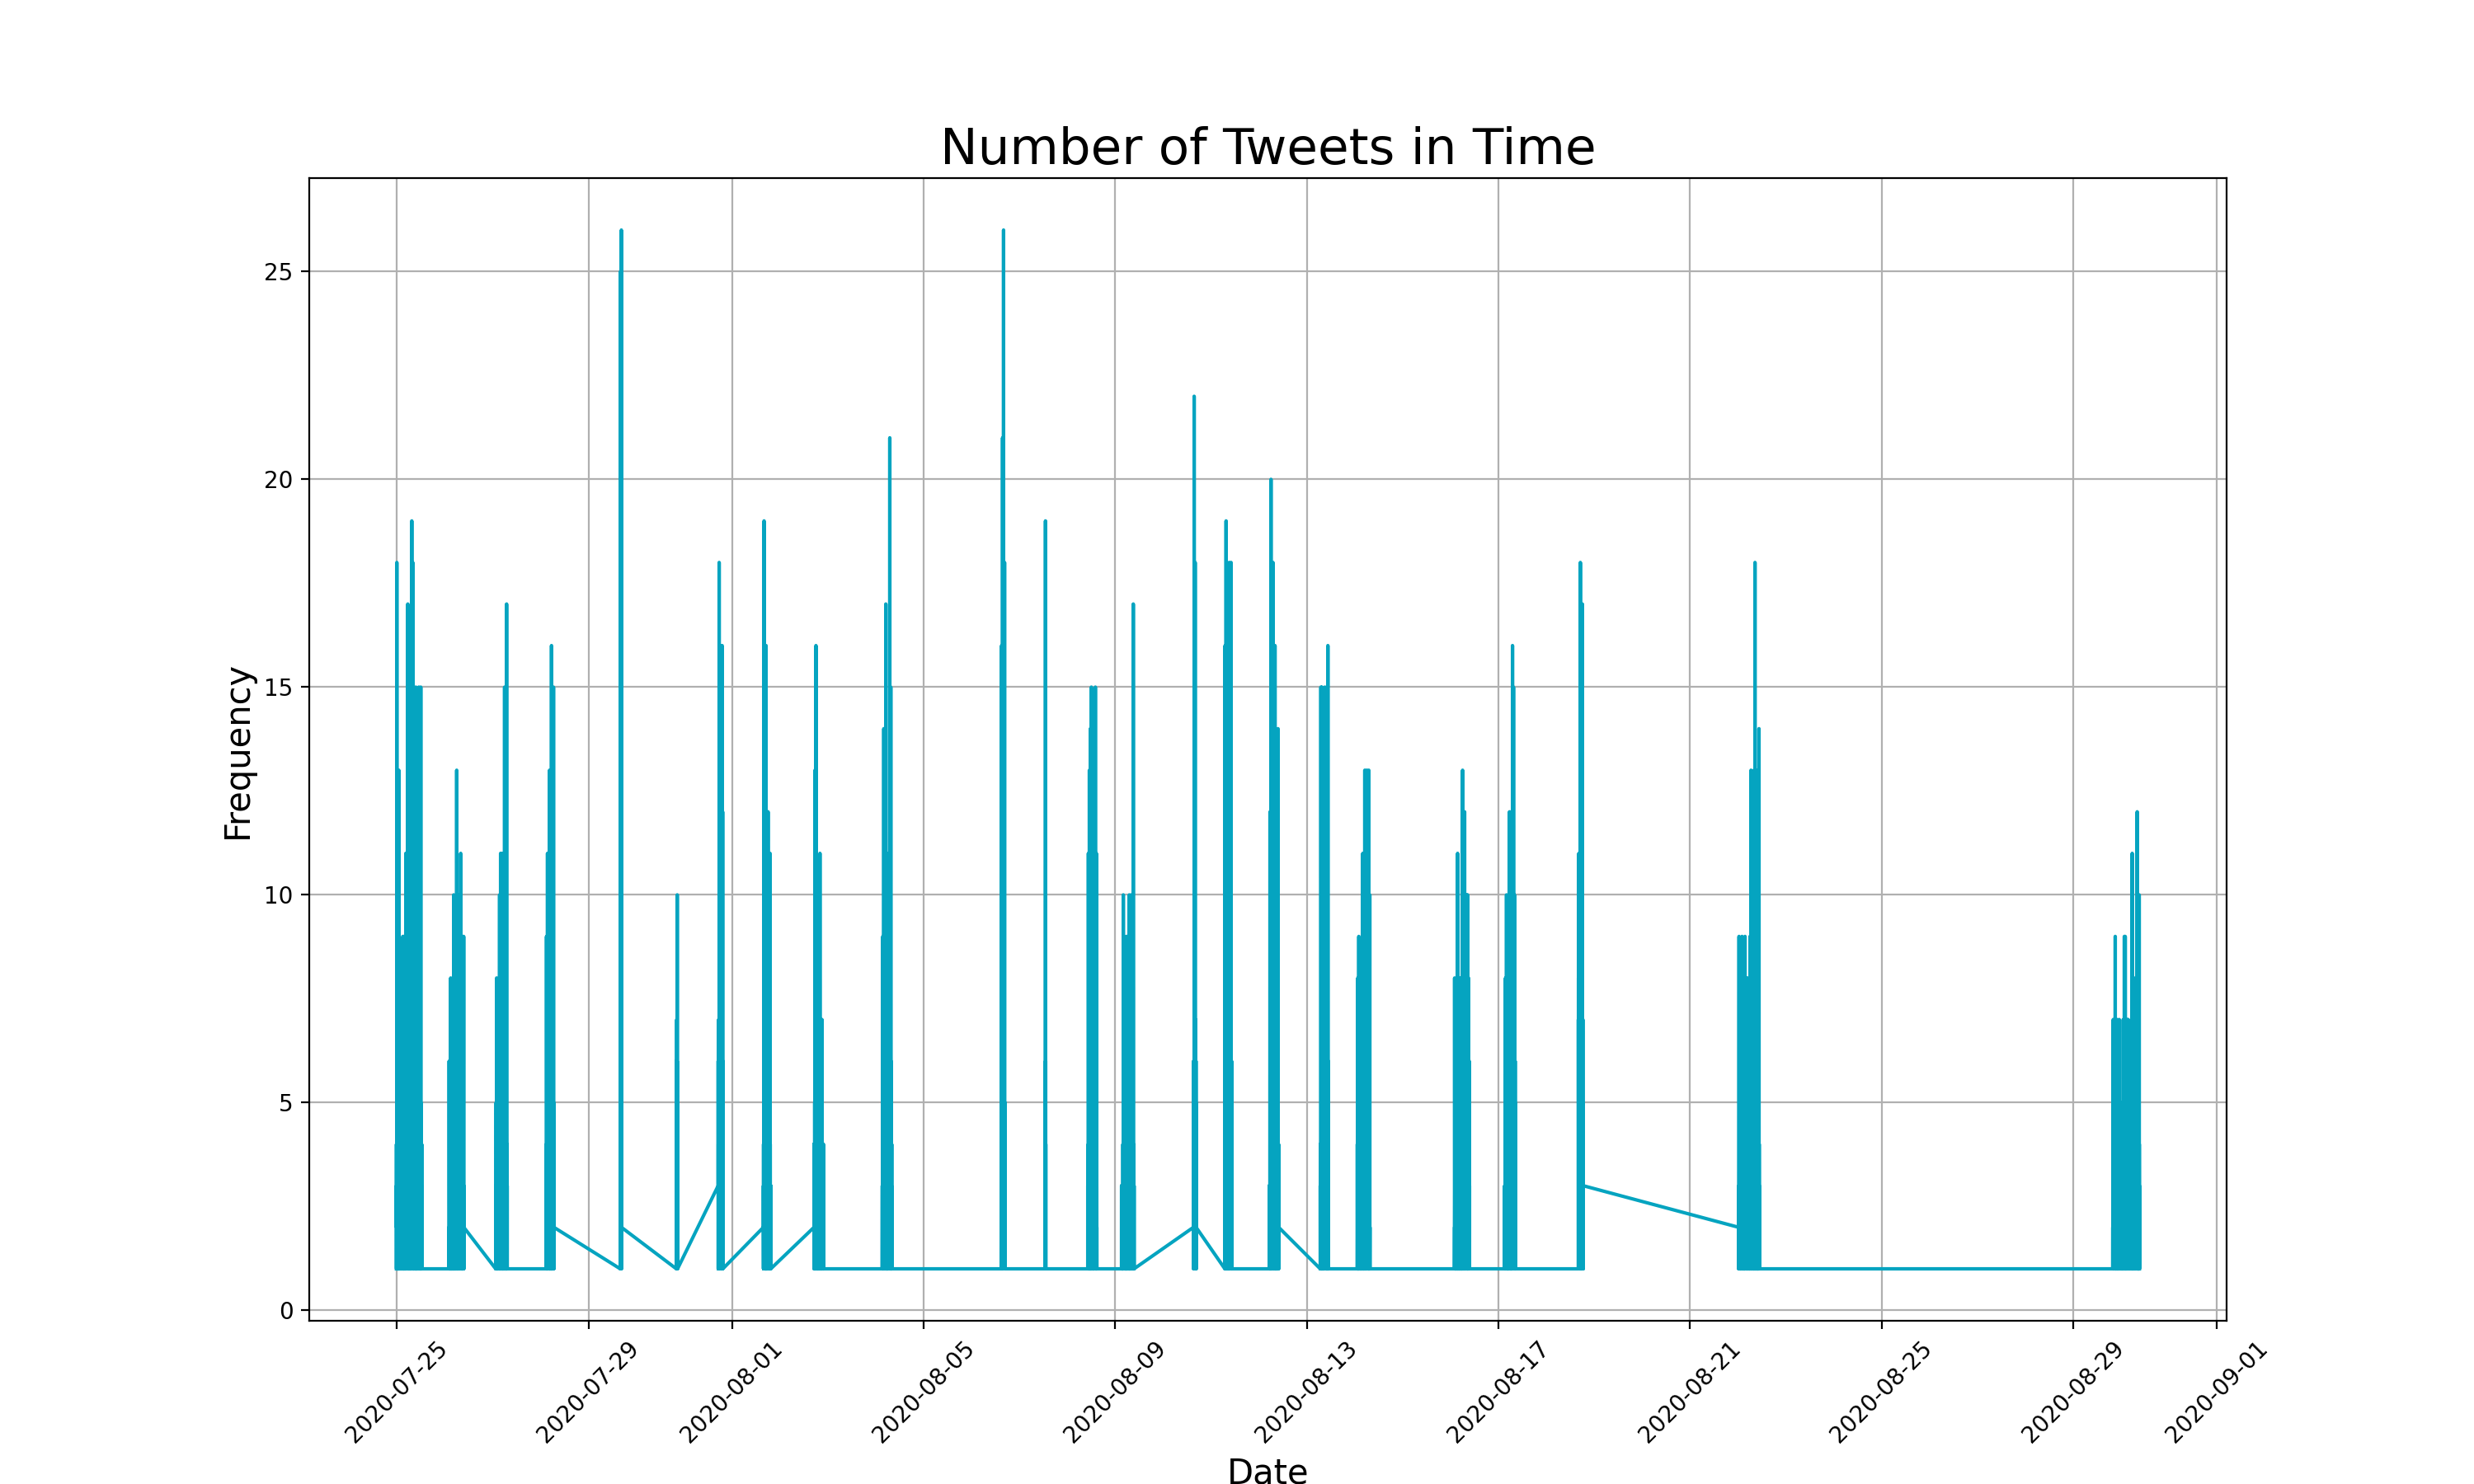

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'tweets' is your pandas DataFrame with a 'date' column

# Convert 'date' column to datetime type if it's not already
tweets['date'] = pd.to_datetime(tweets['date'])

# Group by date and count the number of tweets
tweets_count = tweets.groupby('date').size().reset_index(name='n')

# Plotting
plt.figure(figsize=(15, 9))
plt.plot(tweets_count['date'], tweets_count['n'], color=my_colors[0], linewidth=1.5)
plt.title('Number of Tweets in Time', fontsize=22)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-28-50989895cb0e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



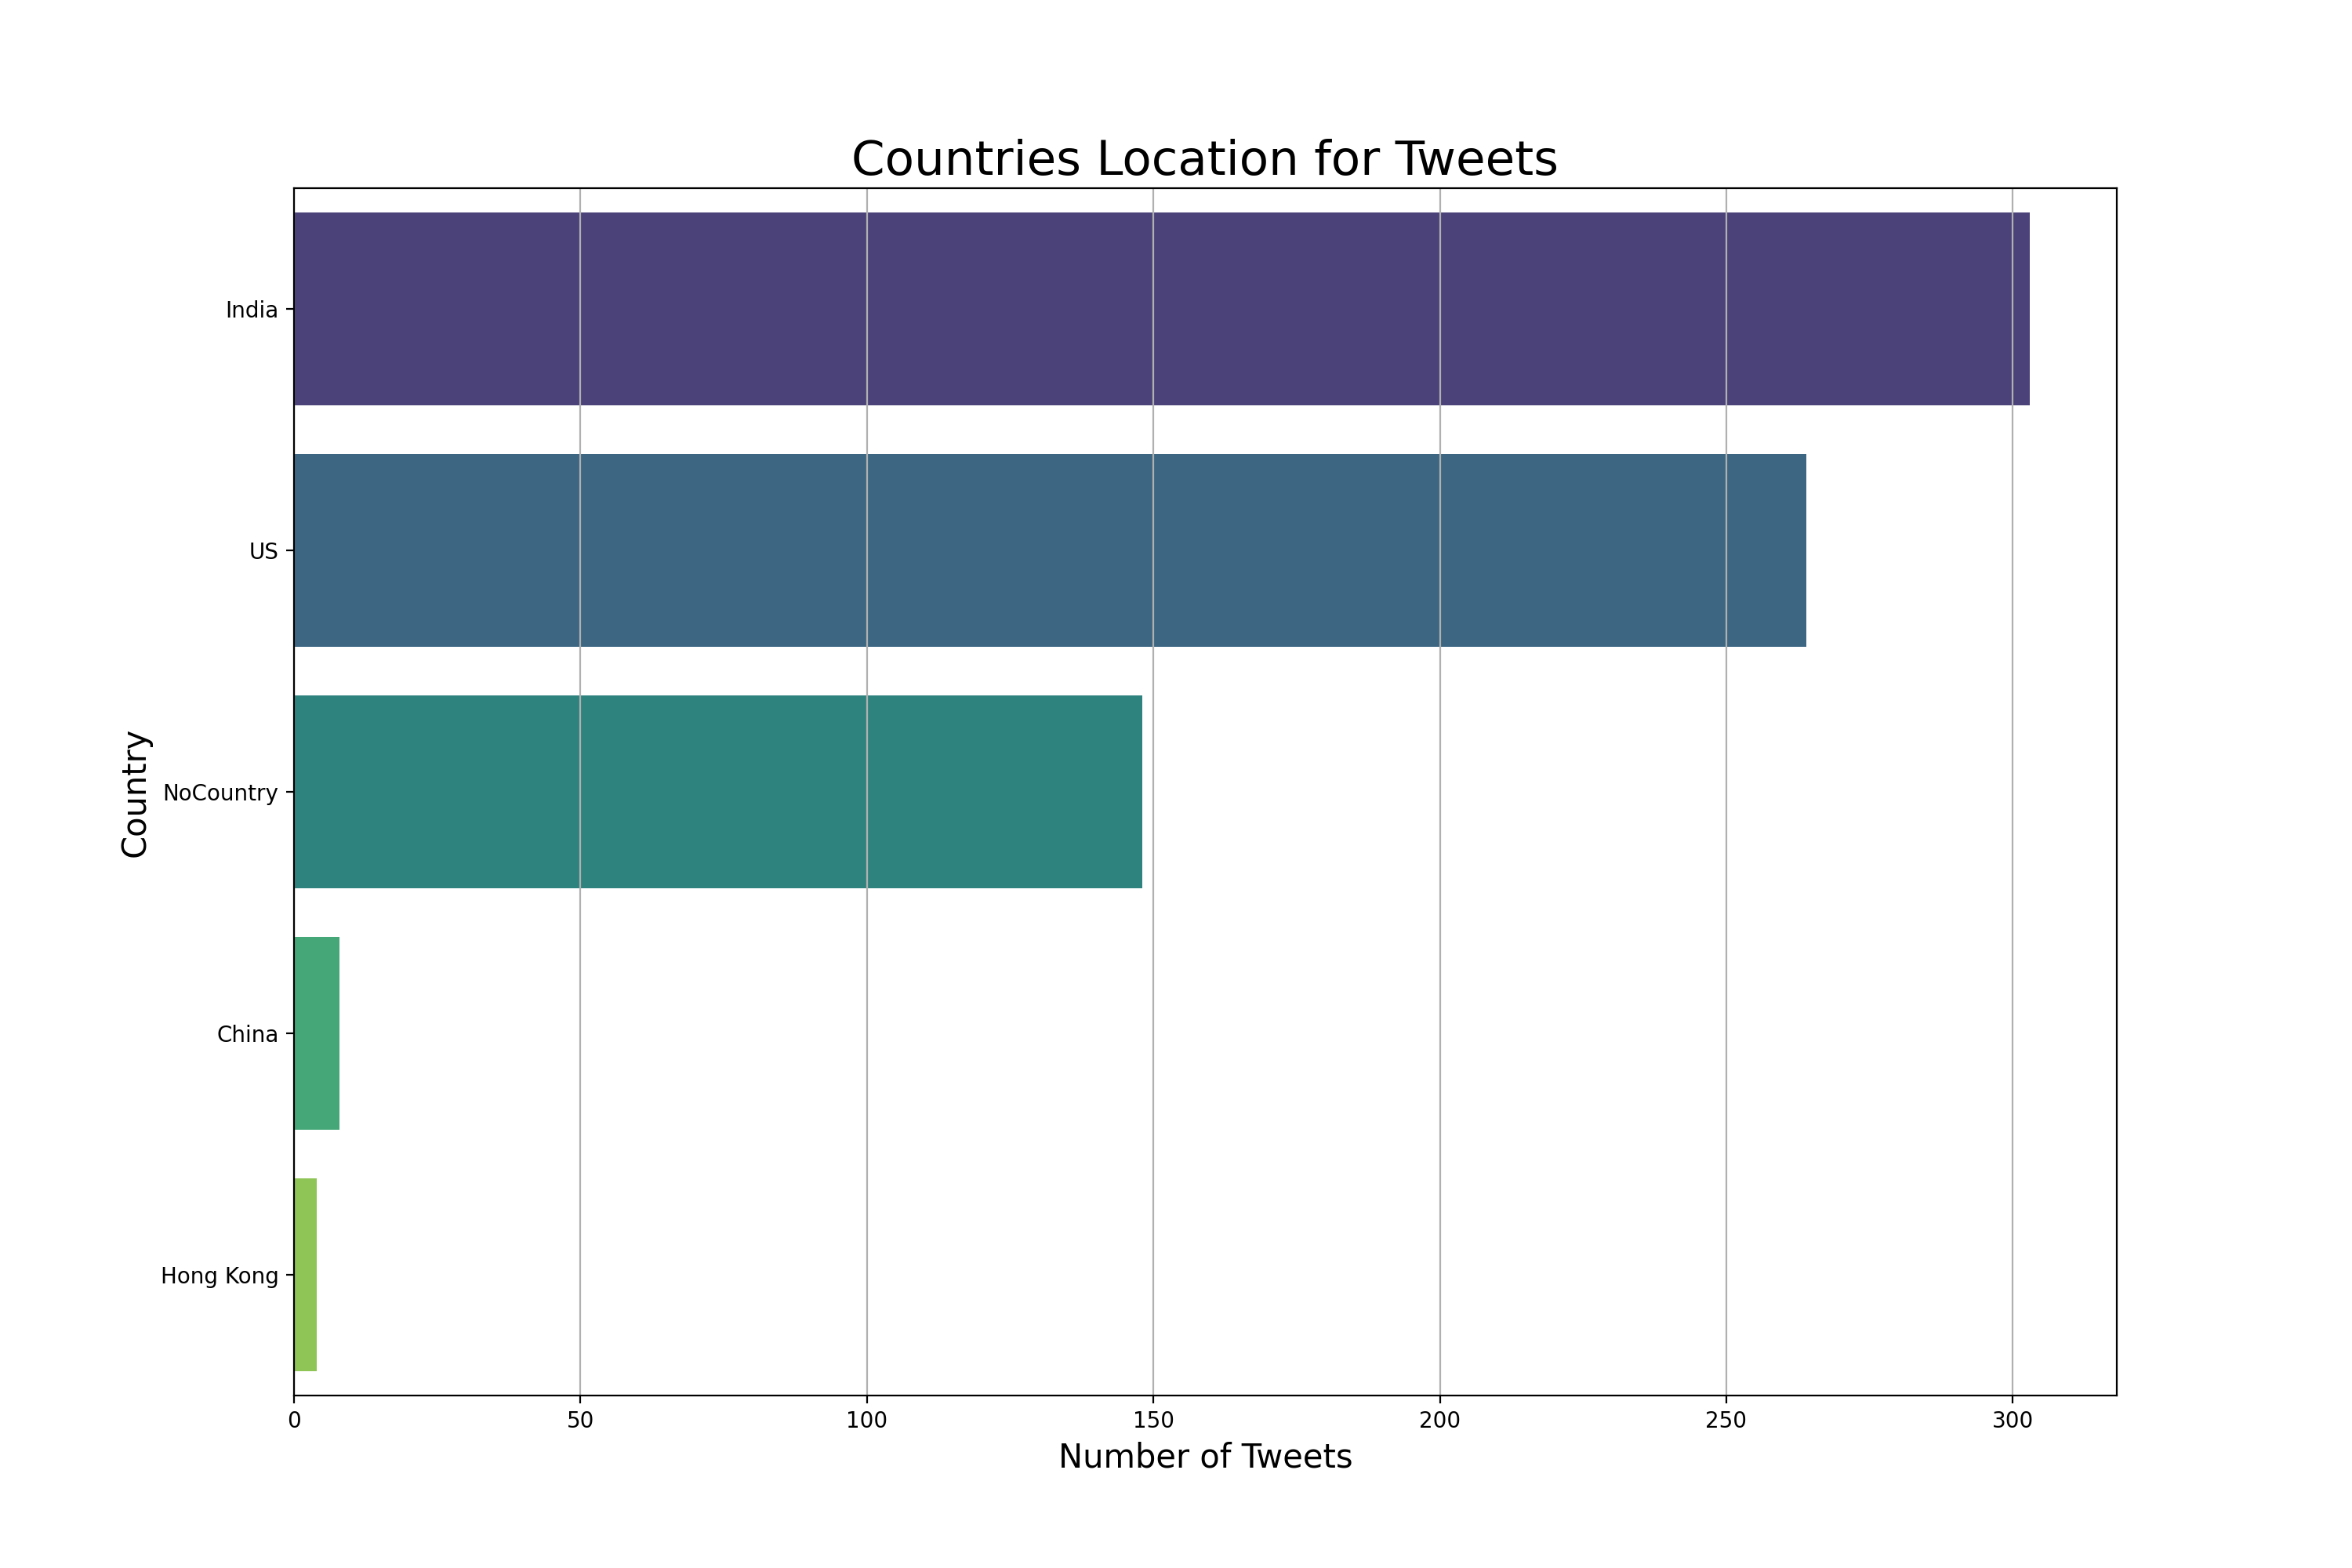

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'tweets' is your pandas DataFrame with a 'country' column

# Group by country and count the number of tweets
tweets_country_count = tweets.groupby('country').size().reset_index(name='n')

# Remove rows with 'NA' in the country column
tweets_country_count = tweets_country_count[tweets_country_count['country'] != 'NA']

# Sorting countries by tweet count
tweets_country_count = tweets_country_count.sort_values(by='n', ascending=False)

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='n', y='country', data=tweets_country_count, palette='viridis')
plt.title('Countries Location for Tweets', fontsize=22)
plt.xlabel('Number of Tweets', fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.grid(True, axis='x')
plt.show()


<ipython-input-29-46344299ce33>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<ipython-input-29-46344299ce33>:13: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.


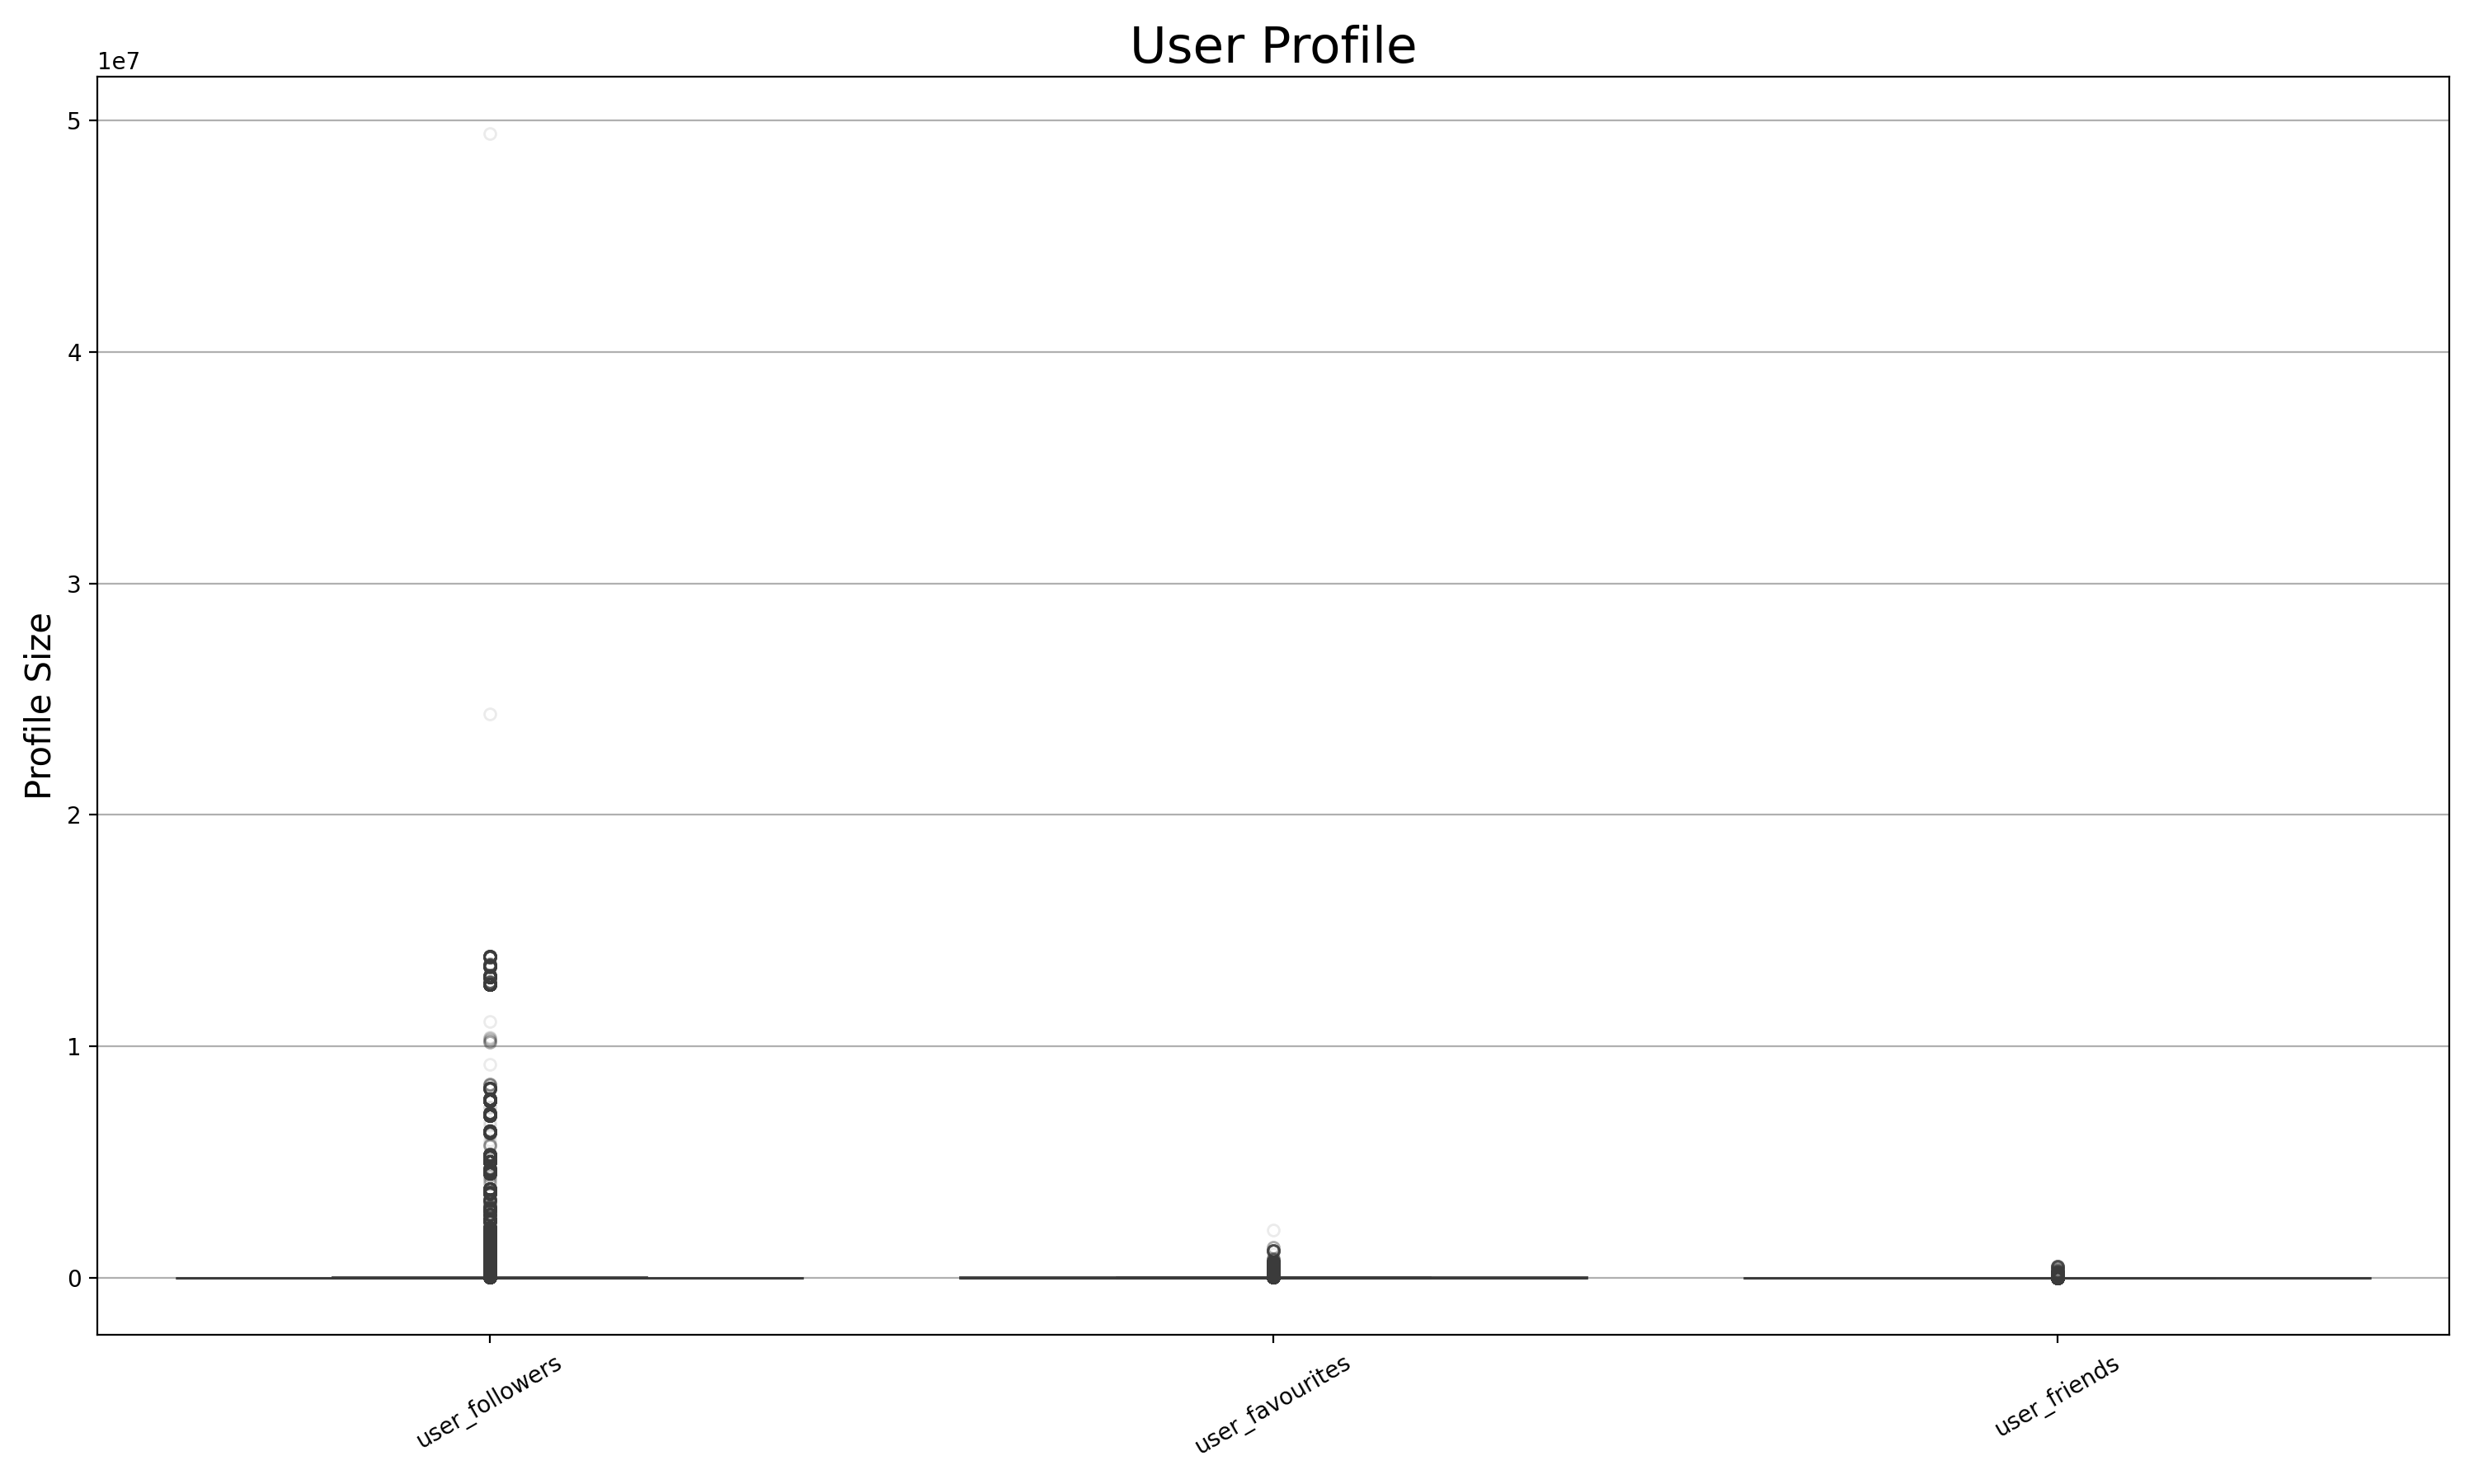

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'tweets' is your pandas DataFrame with columns 'user_followers', 'user_favourites', and 'user_friends'

# Melt the DataFrame to long format
tweets_melted = pd.melt(tweets[['user_followers', 'user_favourites', 'user_friends']],
                        var_name='group_var', value_name='Cases', ignore_index=False)

# Plotting
plt.figure(figsize=(15, 9))
sns.boxplot(data=tweets_melted, x='group_var', y='Cases', palette=my_colors,
            flierprops=dict(marker='o', markersize=5, alpha=0.1))
plt.ylabel('Profile Size', fontsize=15)
plt.xlabel('')
plt.title('User Profile', fontsize=22)
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


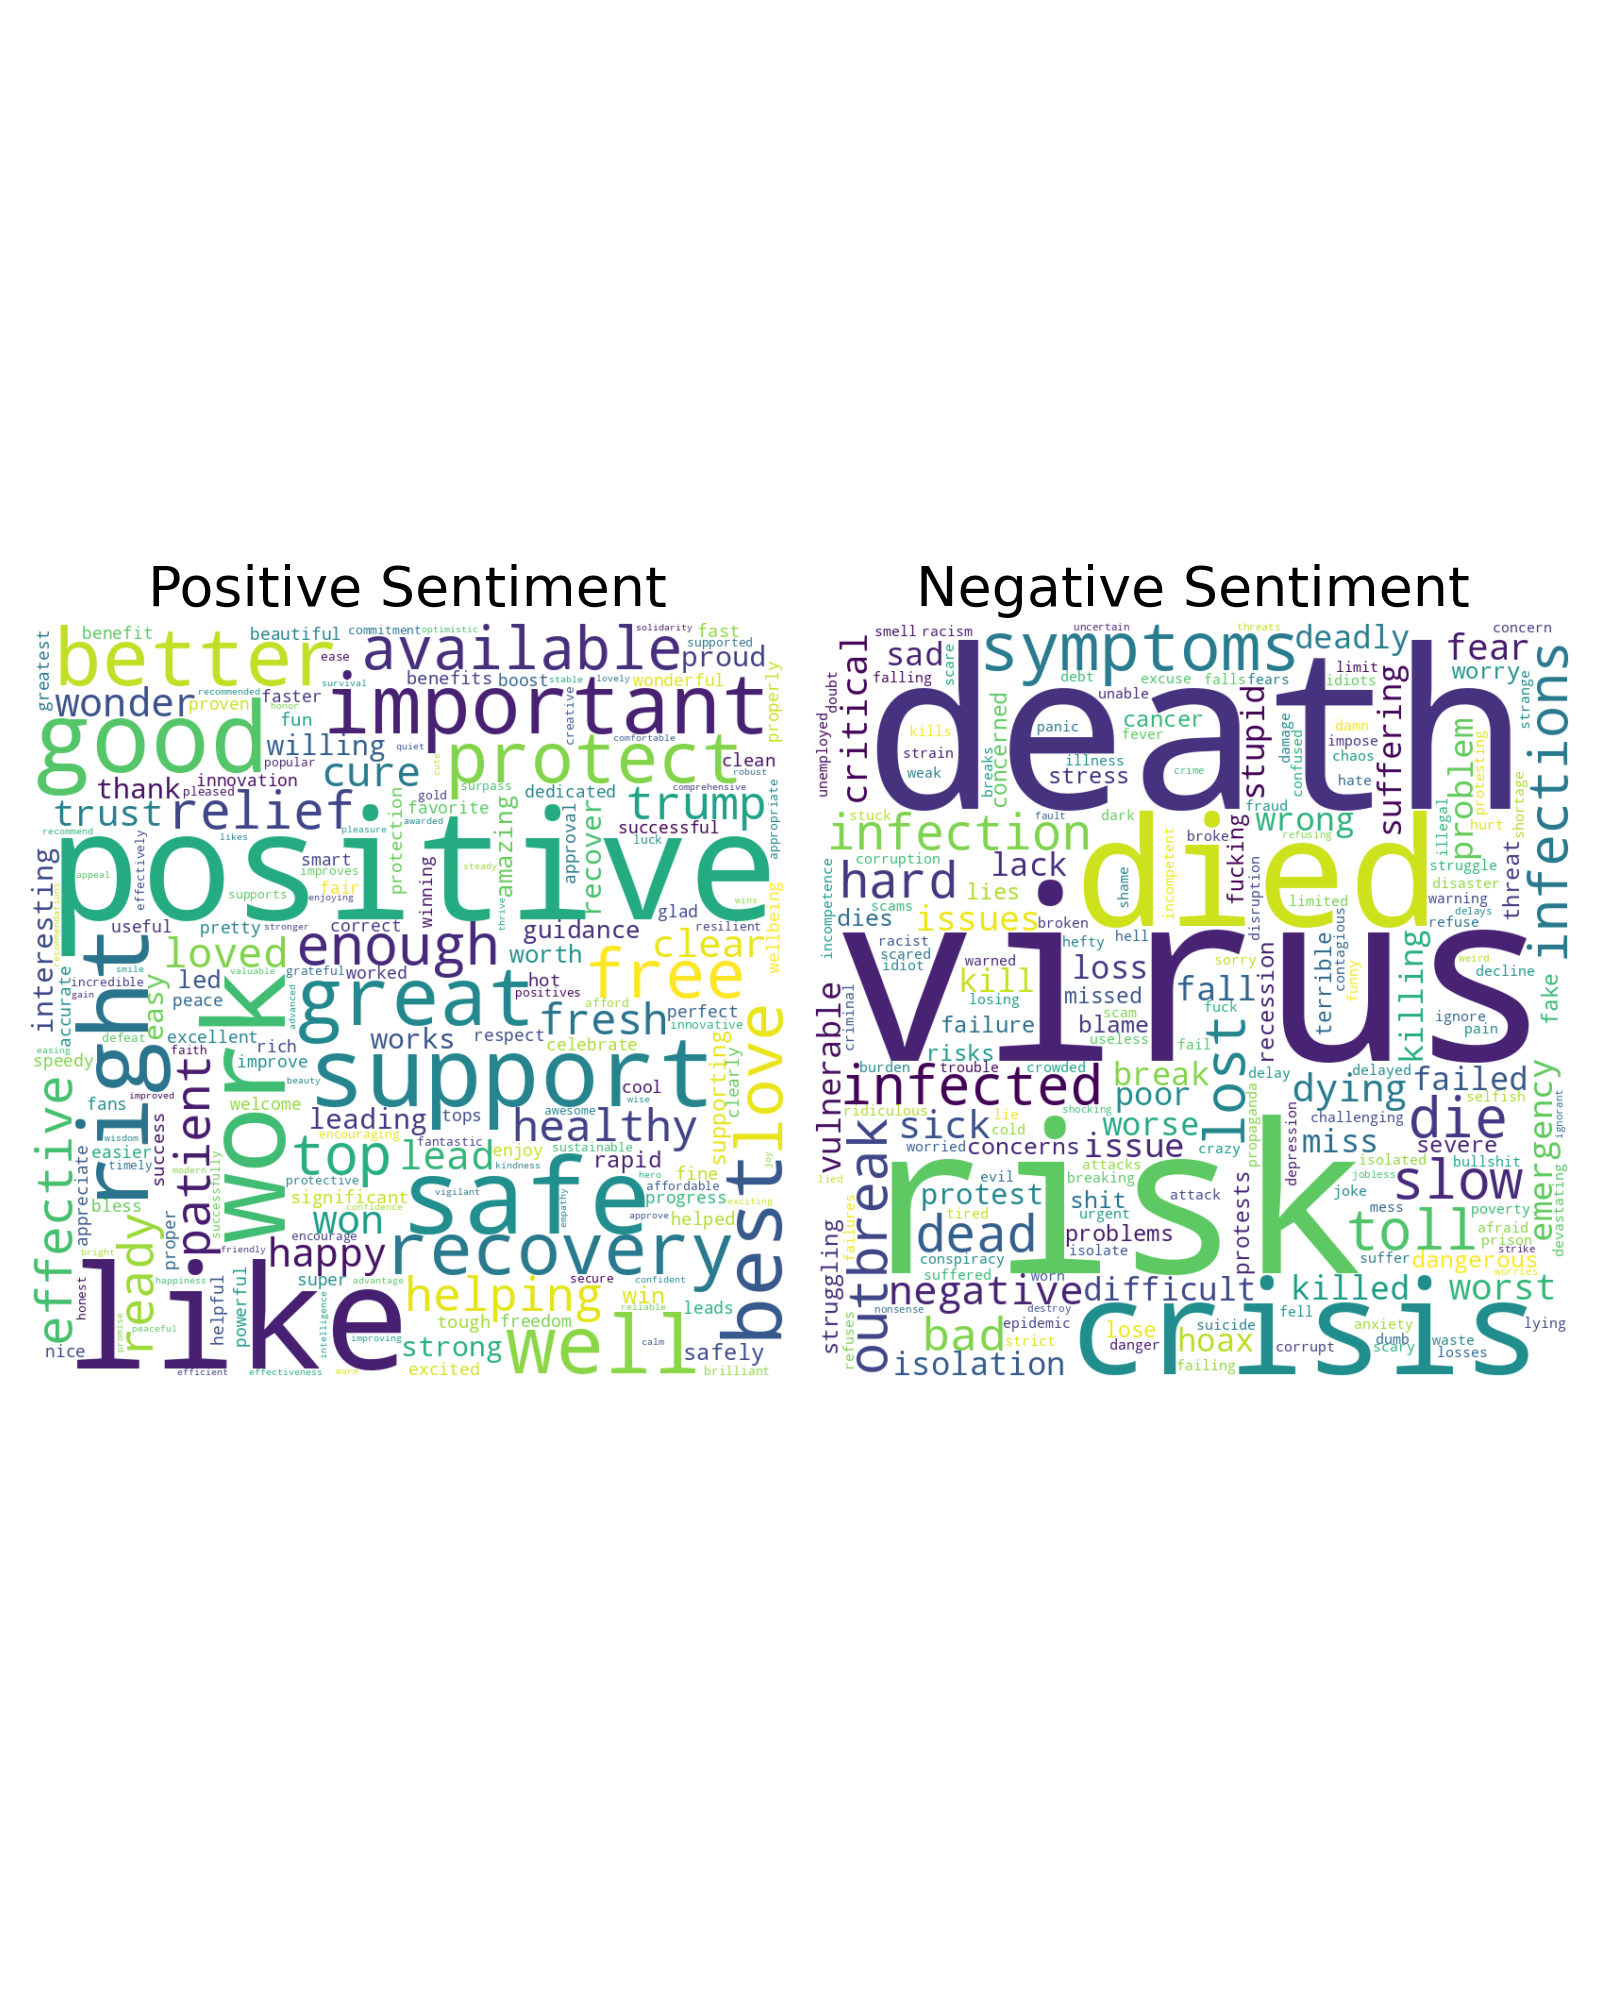

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'unnest_tweets' is your pandas DataFrame with words and 'bing' is the sentiment lexicon DataFrame

# Inner join 'unnest_tweets' with 'bing' on the 'word' column
merged_df = pd.merge(unnest_tweets, bing, on='word')

# Count occurrences of each word and sentiment
word_sentiment_counts = merged_df.groupby(['word', 'sentiment']).size().reset_index(name='n')

# Create separate DataFrames for positive and negative sentiment words
positive_words = word_sentiment_counts[word_sentiment_counts['sentiment'] == 'positive']
negative_words = word_sentiment_counts[word_sentiment_counts['sentiment'] == 'negative']

# Generate the word clouds for positive and negative sentiment words
wordcloud_positive = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(zip(positive_words['word'], positive_words['n'])))
wordcloud_negative = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(zip(negative_words['word'], negative_words['n'])))

# Plot the word clouds
plt.figure(figsize=(8,10))
plt.subplot(121)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment', fontsize=20)
plt.axis('off')

plt.subplot(122)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


<ipython-input-31-fd37c5759bb0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



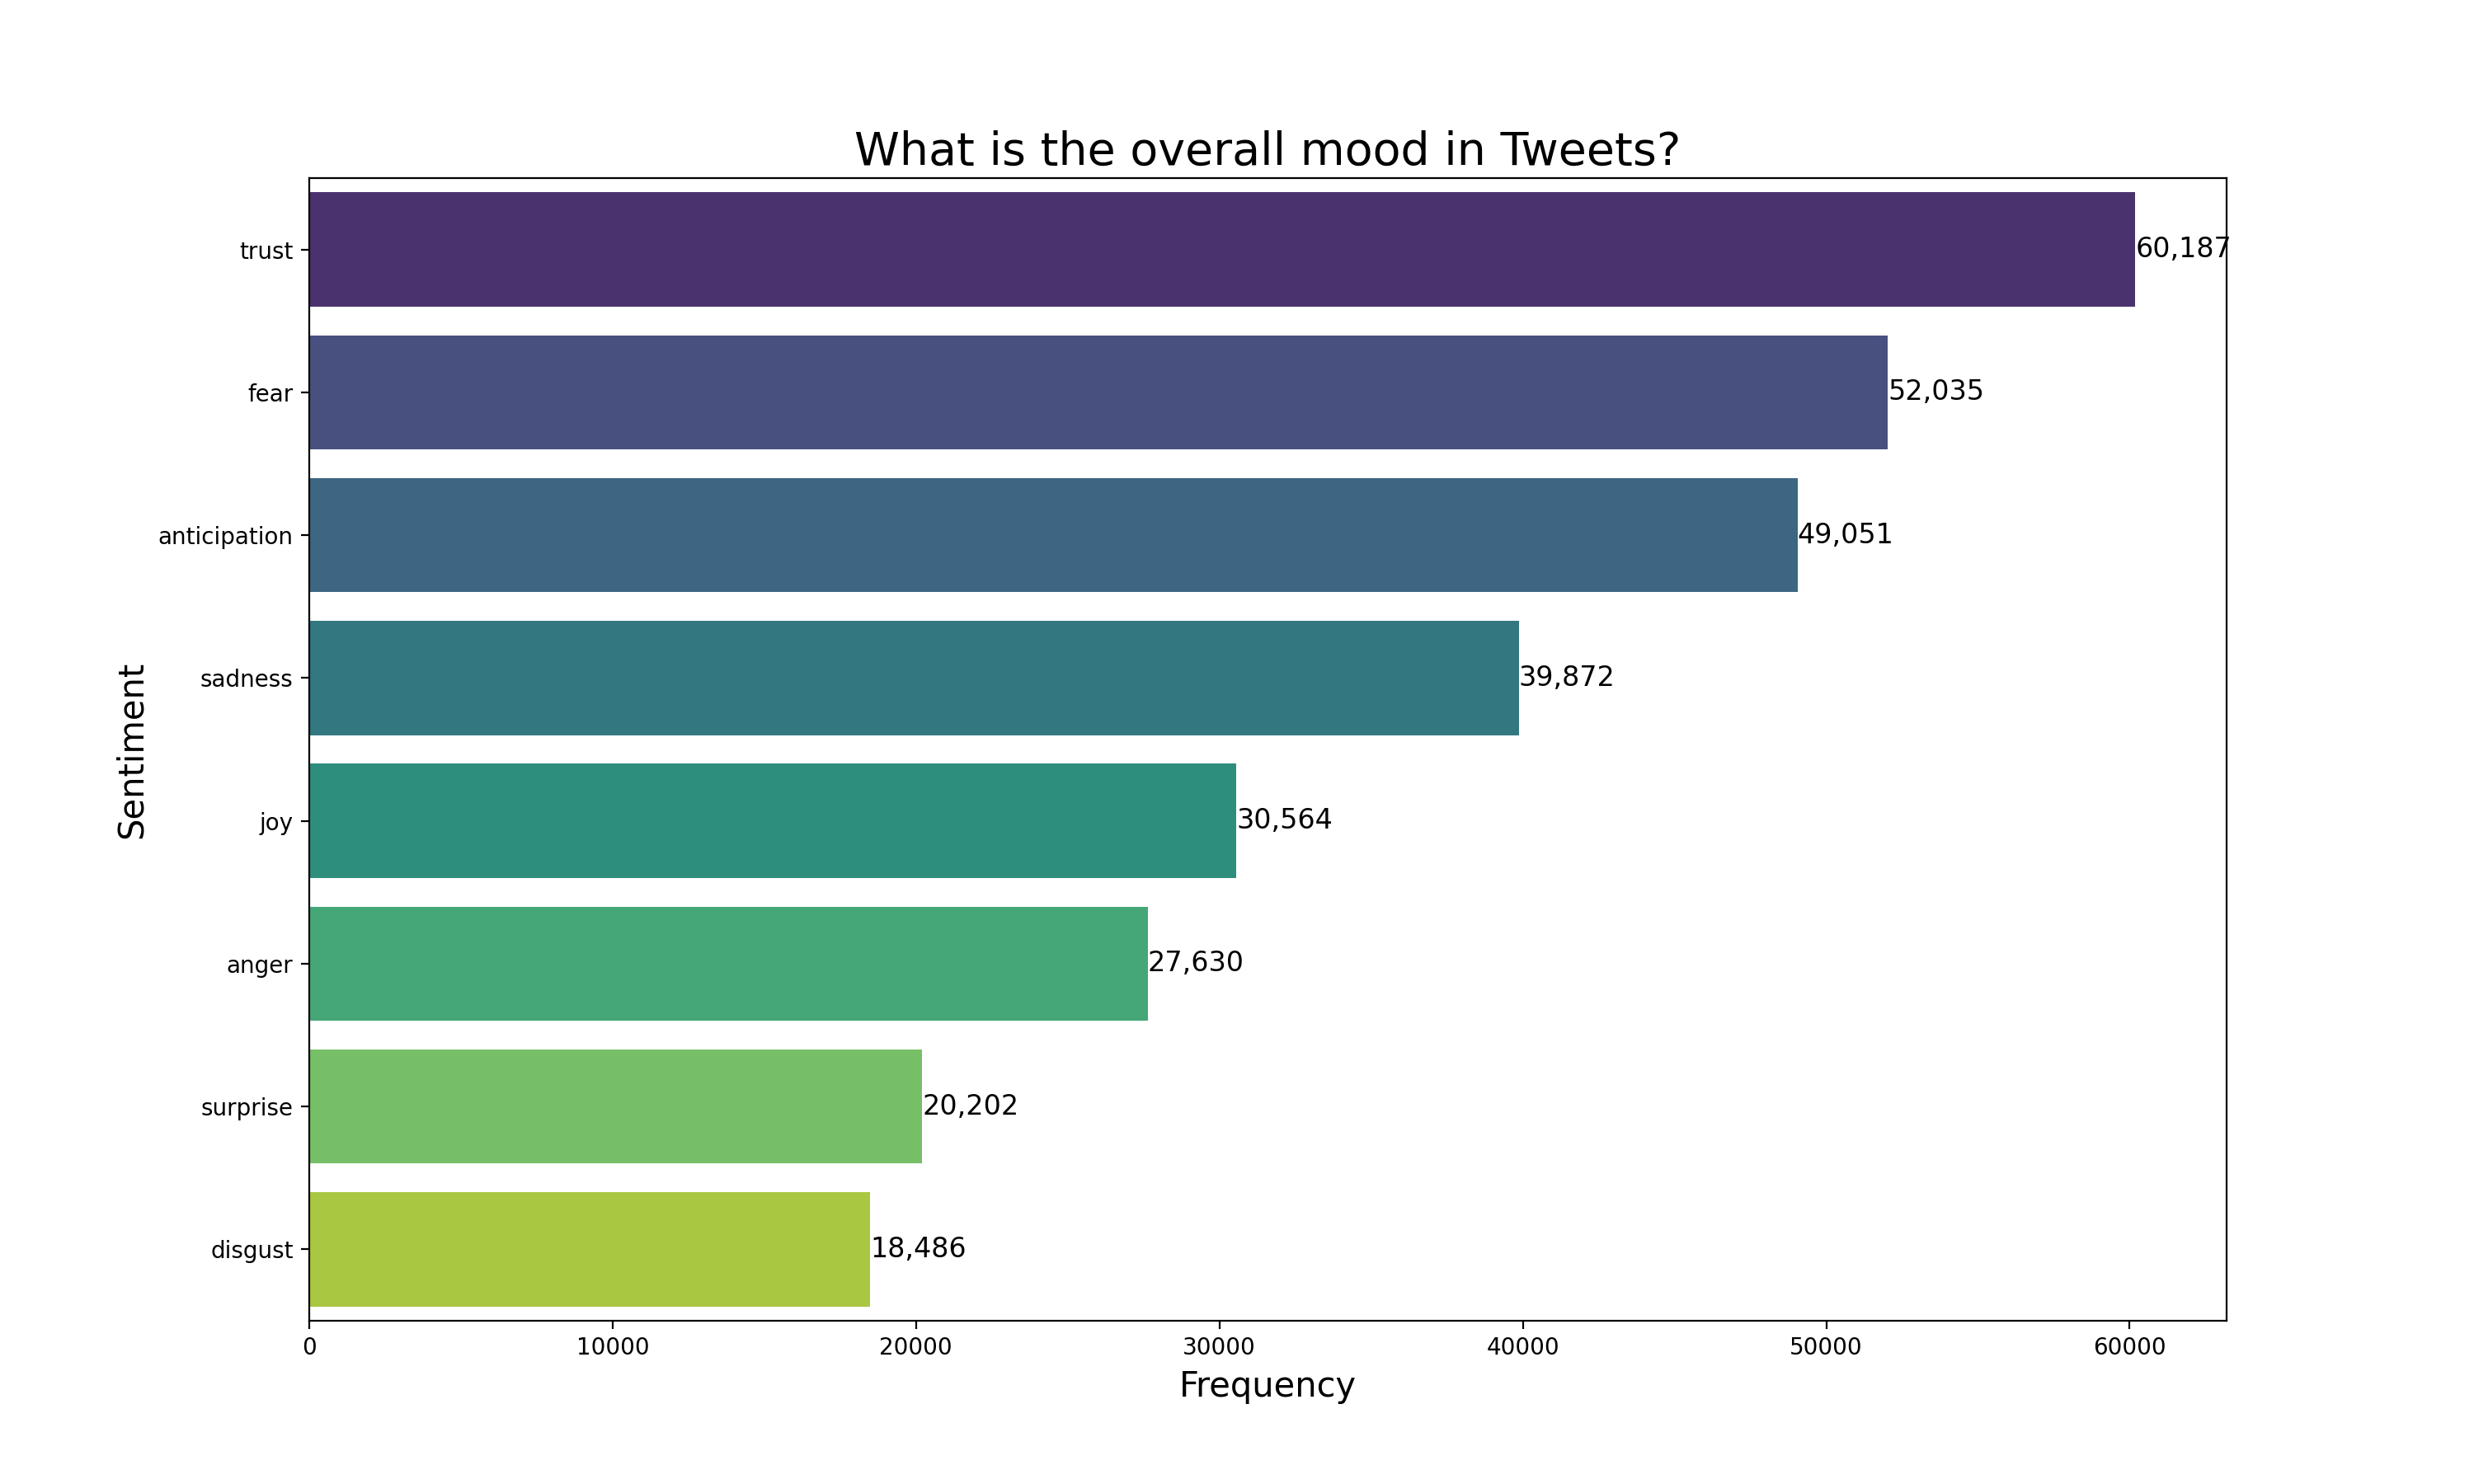

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'unnest_tweets' is your pandas DataFrame with words and 'nrc' is the sentiment lexicon DataFrame

# Inner join 'unnest_tweets' with 'nrc' on the 'word' column
merged_df = pd.merge(unnest_tweets, nrc, on='word')

# Filter out positive and negative sentiments
filtered_df = merged_df[~merged_df['sentiment'].isin(['positive', 'negative'])]

# Count occurrences of each sentiment
sentiment_counts = filtered_df['sentiment'].value_counts().reset_index(name='n')

# Plotting
plt.figure(figsize=(15, 9))
sns.barplot(data=sentiment_counts, x='n', y='index', palette='viridis', estimator=sum)
for index, value in enumerate(sentiment_counts['n']):
    plt.text(value, index, format(value, ','), ha='left', va='center', fontsize=12)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Sentiment', fontsize=15)
plt.title('What is the overall mood in Tweets?', fontsize=20)
plt.show()


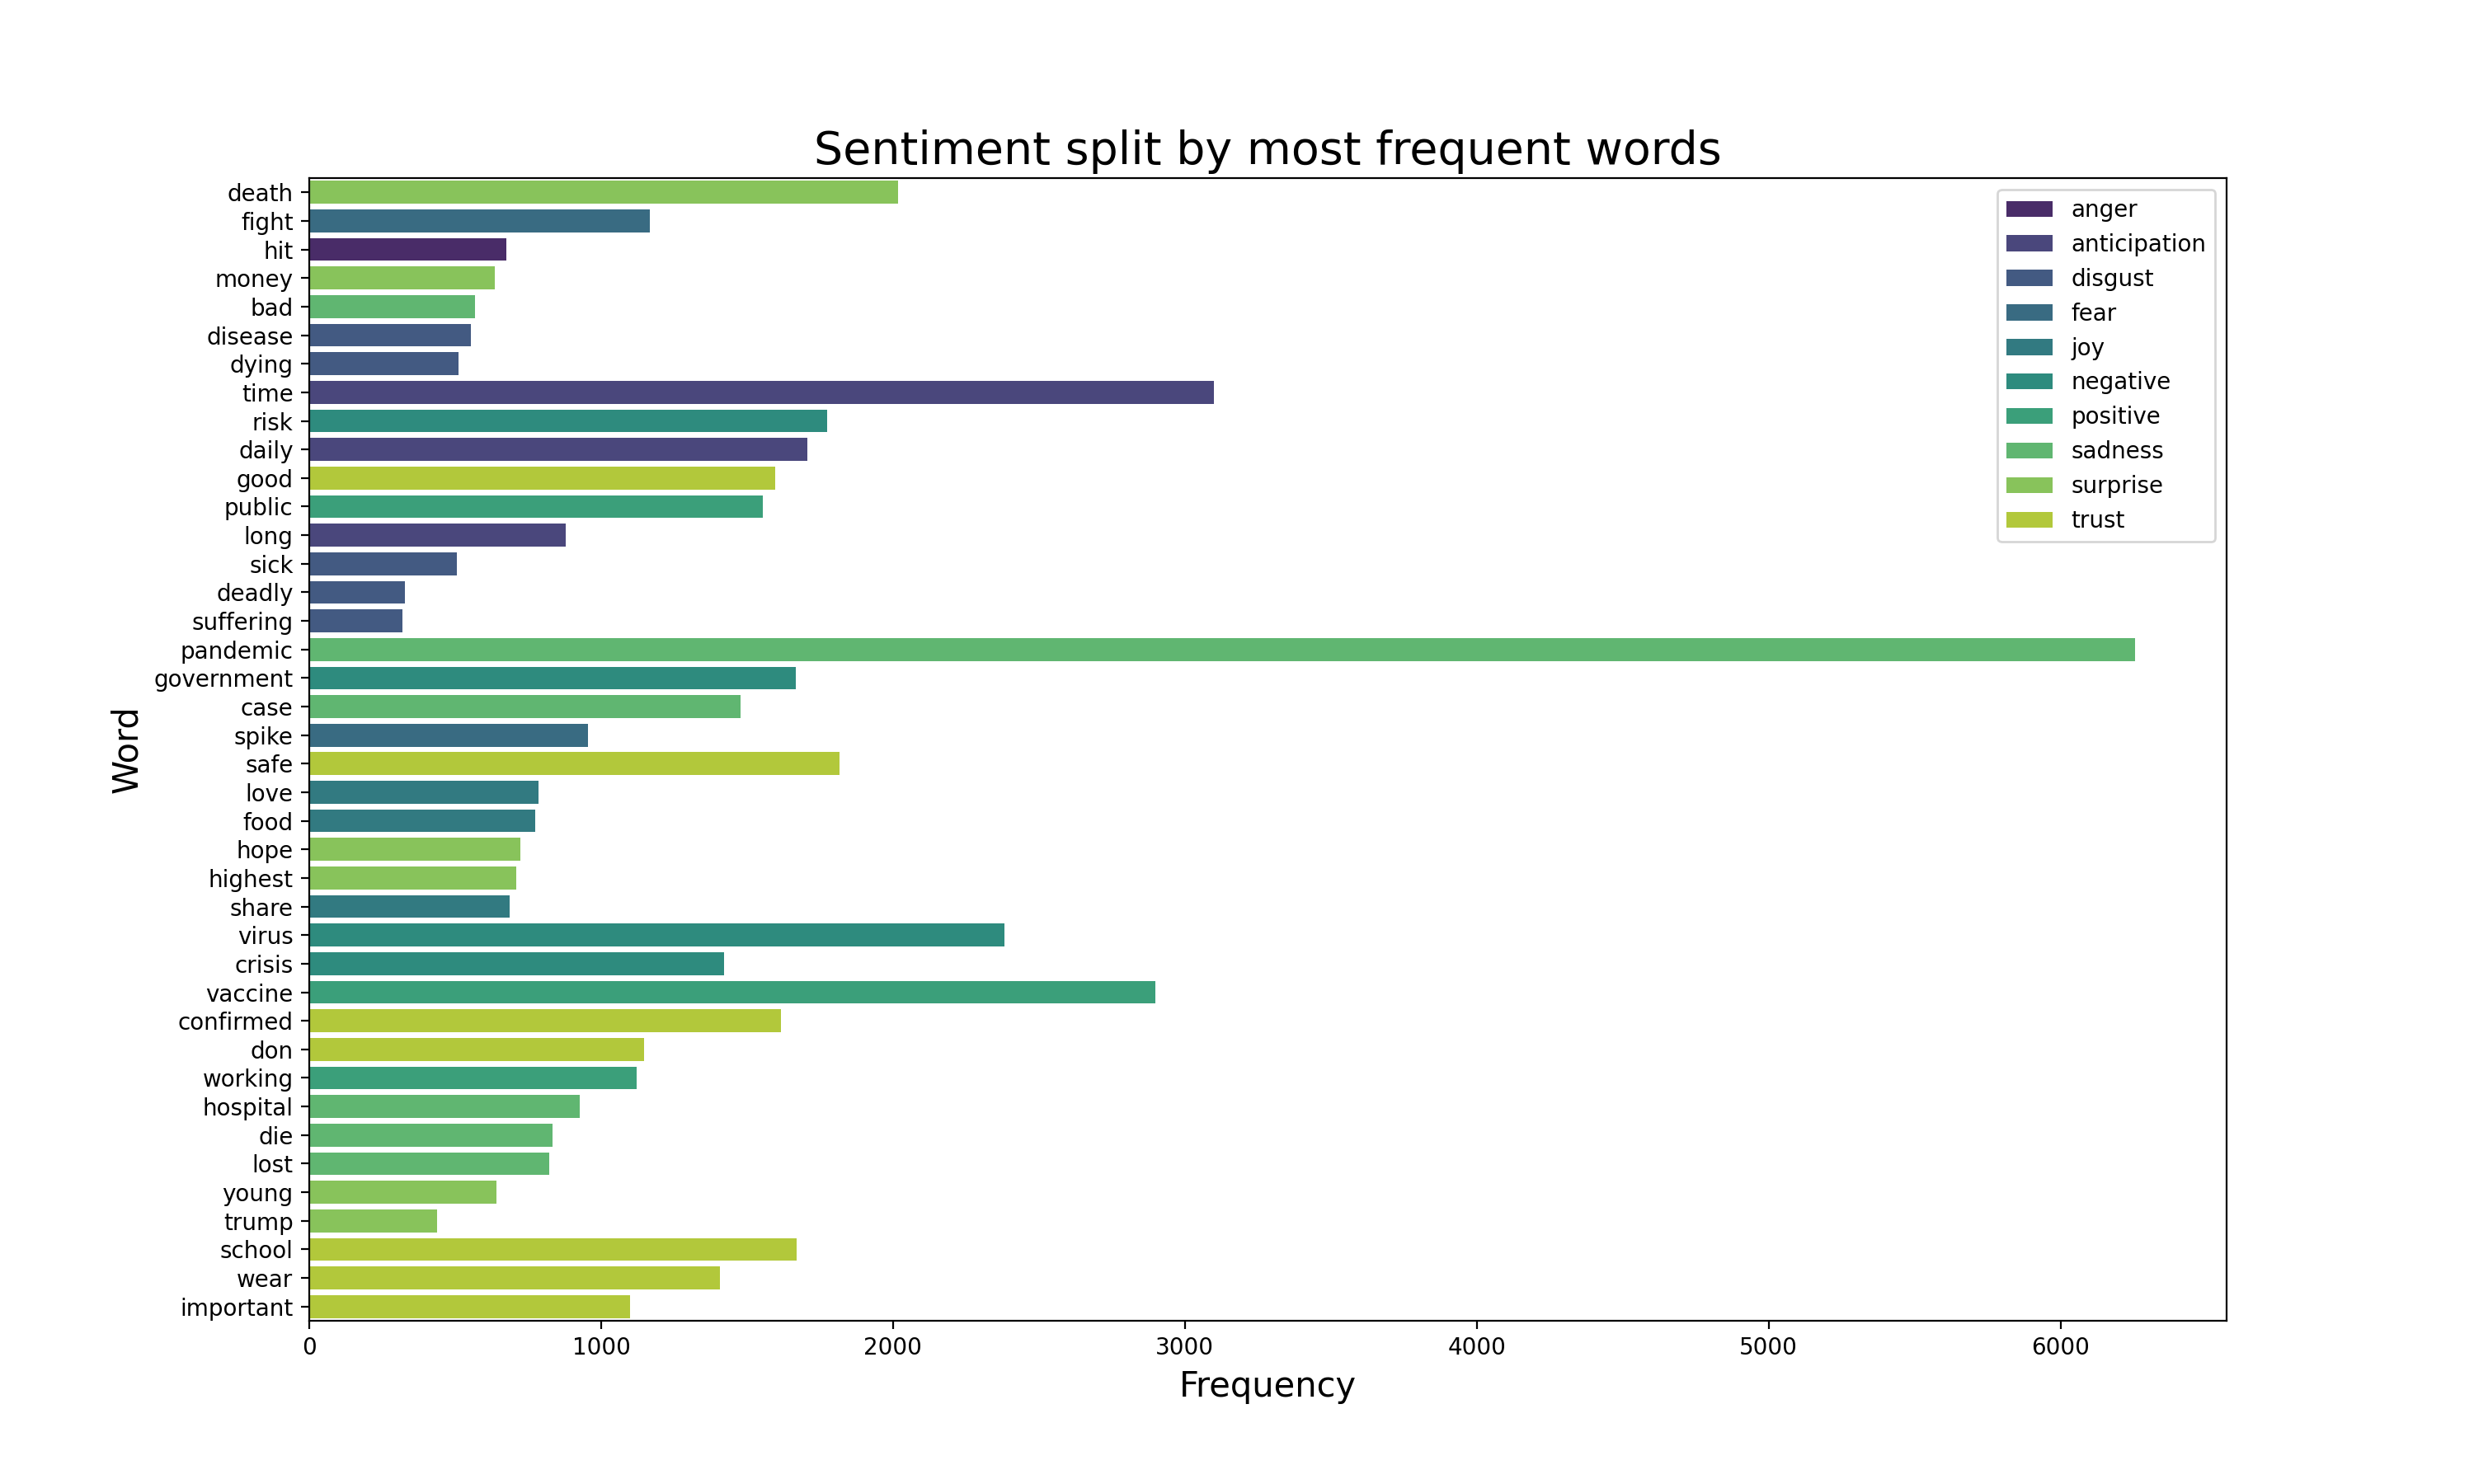

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'unnest_tweets' is your pandas DataFrame with words and 'nrc' is the sentiment lexicon DataFrame

# Inner join 'unnest_tweets' with 'nrc' on the 'word' column
merged_df = pd.merge(unnest_tweets, nrc, on='word')

# Count occurrences of each sentiment-word pair
sentiment_word_counts = merged_df.groupby(['sentiment', 'word']).size().reset_index(name='n')

# Group by sentiment and select the top 7 most frequent words for each sentiment
top_words_by_sentiment = sentiment_word_counts.groupby('sentiment').apply(lambda x: x.nlargest(7, 'n')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(15, 9))
sns.barplot(data=top_words_by_sentiment, x='n', y='word', hue='sentiment', dodge=False, palette='viridis')
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Word', fontsize=15)
plt.title('Sentiment split by most frequent words', fontsize=20)
plt.legend(title=None)
plt.show()


<ipython-input-33-91ab82831380>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



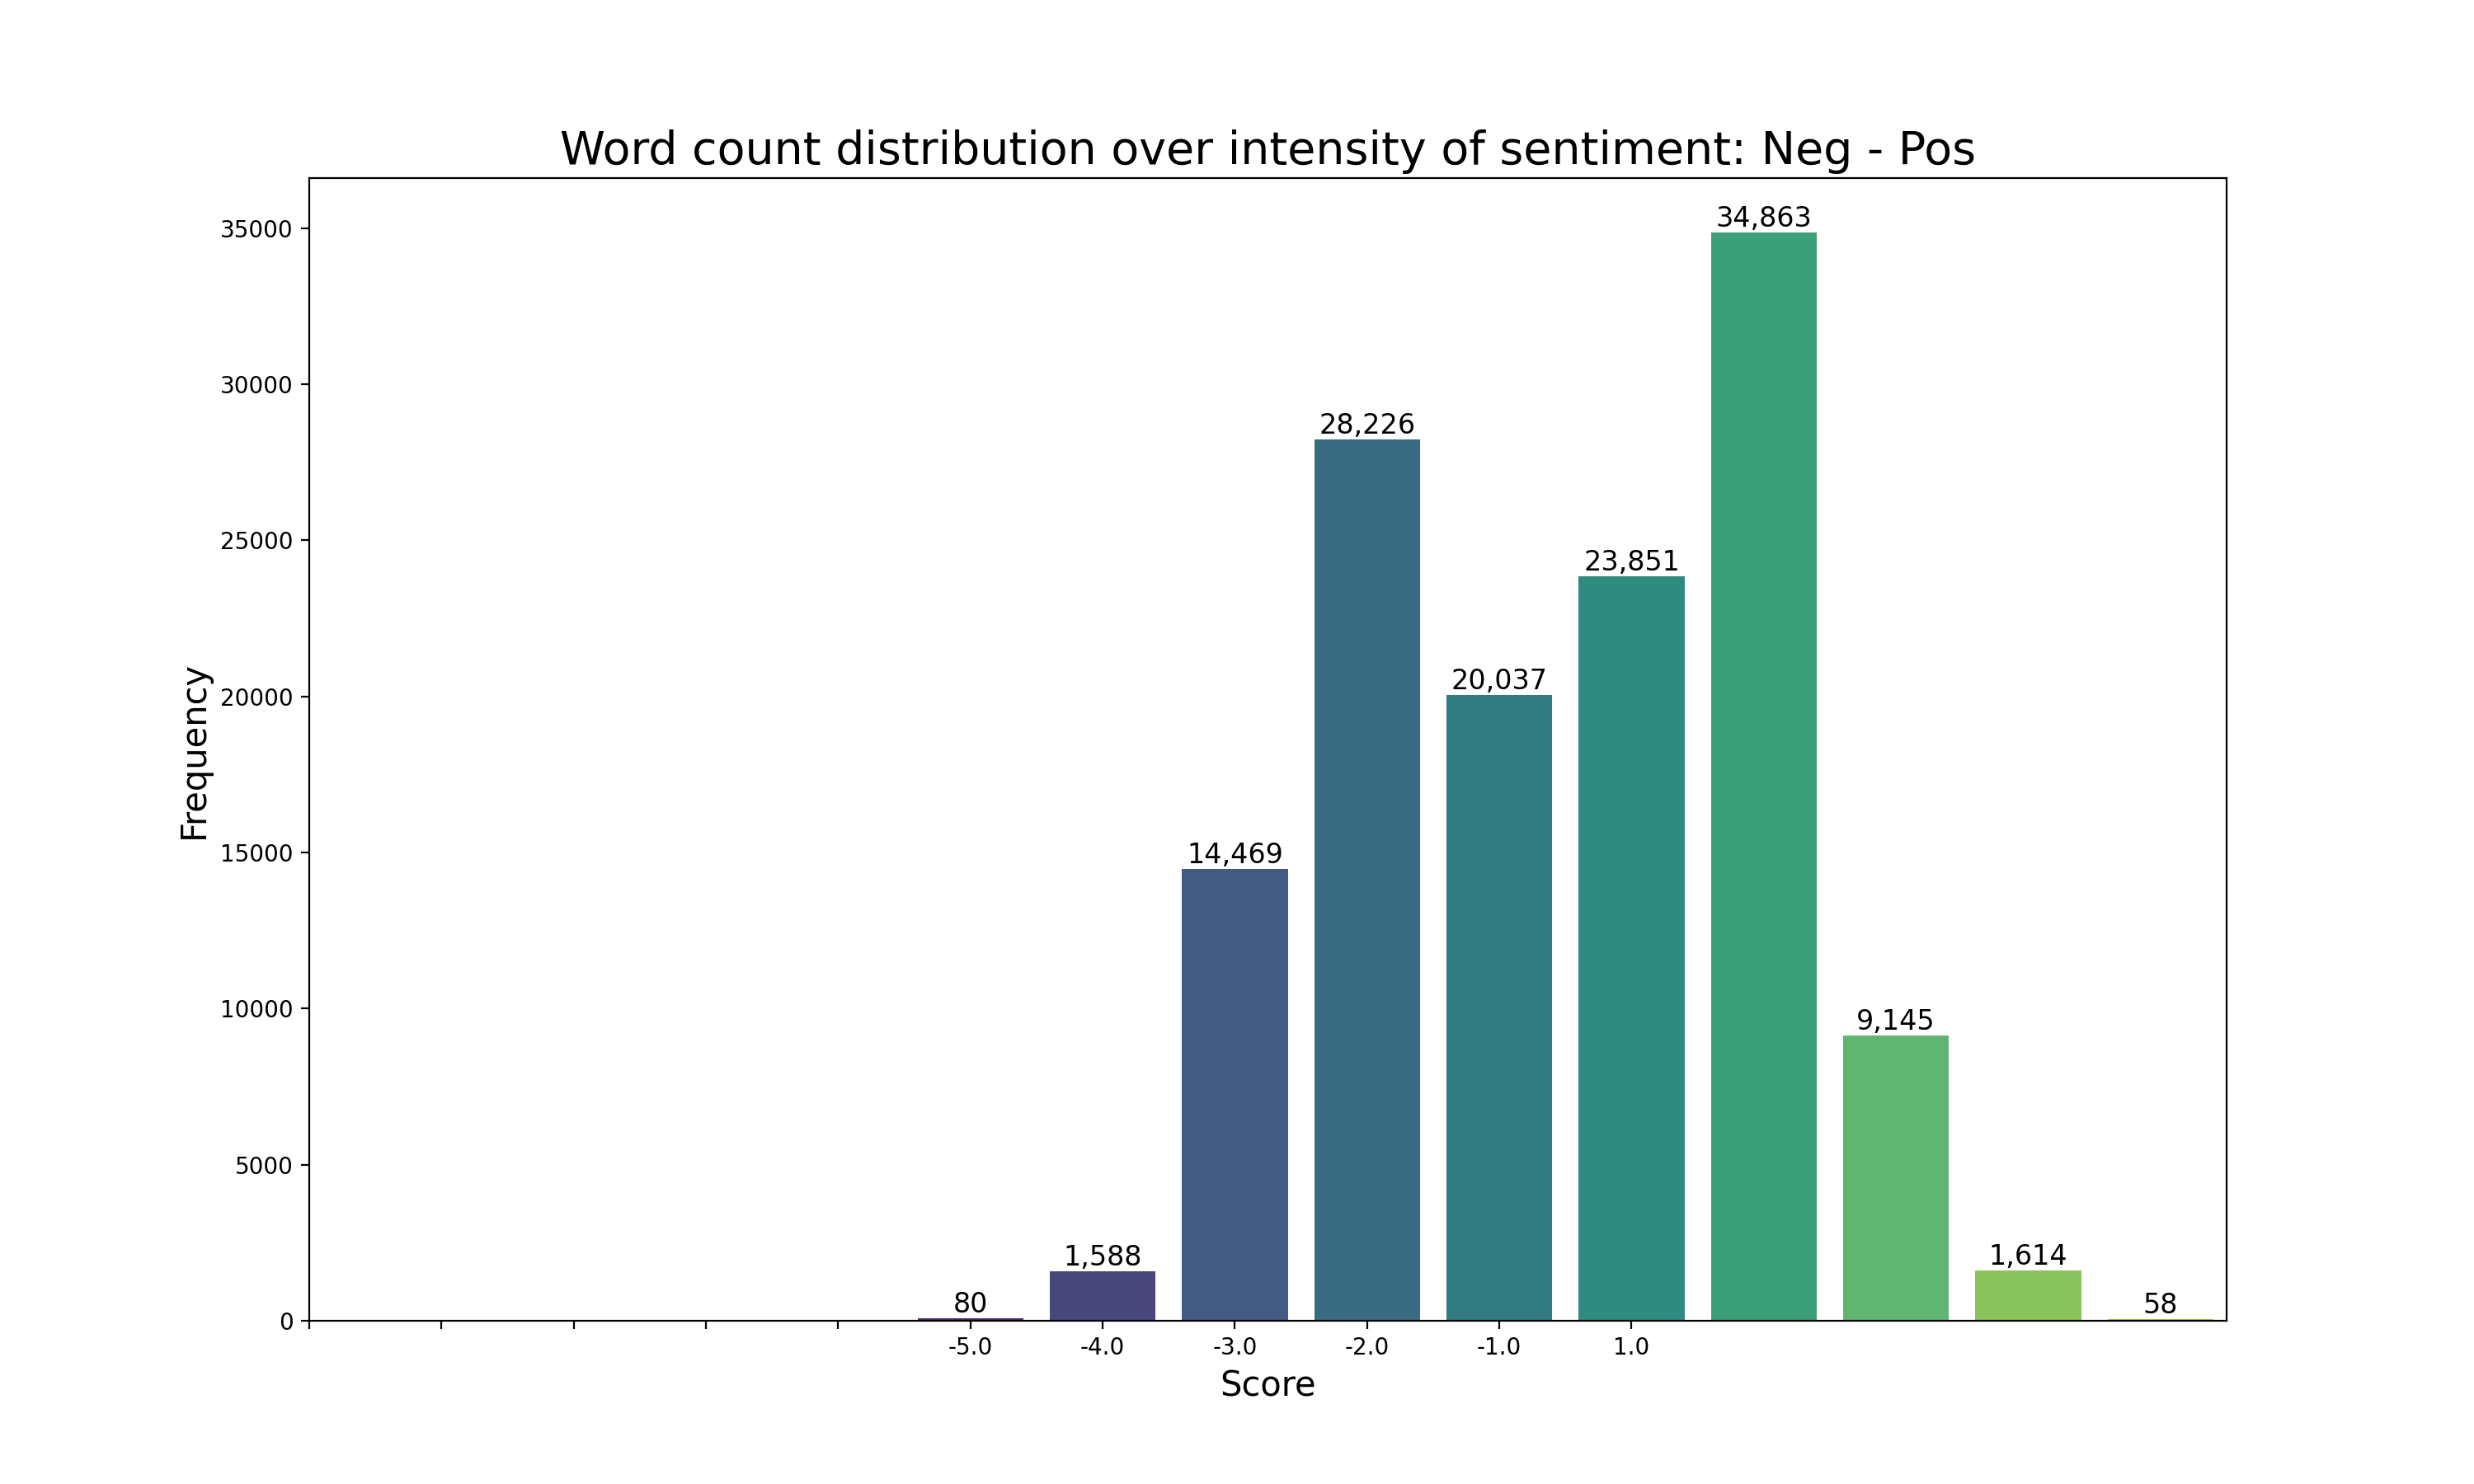

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'unnest_tweets' is your pandas DataFrame with words and 'afinn' is the sentiment lexicon DataFrame

# Inner join 'unnest_tweets' with 'afinn' on the 'word' column
merged_df = pd.merge(unnest_tweets, afinn, on='word')

# Count occurrences of each sentiment score
score_counts = merged_df['value'].value_counts().reset_index(name='n').sort_values(by='index')

# Plotting
plt.figure(figsize=(15, 9))
sns.barplot(data=score_counts, x='index', y='n', palette='viridis')
for index, value in enumerate(score_counts['n']):
    plt.text(index, value, format(value, ','), ha='center', va='bottom', fontsize=12)
plt.xlabel('Score', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Word count distribution over intensity of sentiment: Neg - Pos', fontsize=20)
plt.xticks(ticks=range(-5, 6))
plt.show()


In [ ]:
import pandas as pd

# Assuming 'unnest_tweets' is your pandas DataFrame containing the tweets and 'bing' is the sentiment lexicon DataFrame

# Filter only the main 3 countries with the most tweets
filtered_data = unnest_tweets[unnest_tweets['country'].isin(["US", "UK", "India", "NoCountry"])]

# Inner join 'filtered_data' with 'bing' on the 'word' column
merged_data = pd.merge(filtered_data, bing, on='word')

# Count the total tweets for each country
total_tweets = merged_data.groupby('country').size().reset_index(name='total_tweets')

print(total_tweets)


     country  total_tweets
0      India           220
1  NoCountry           147
2         US           253


In [ ]:
pip install circlify

In [ ]:
pip install nxviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 8.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming 'merged_data' is already prepared with 'country', 'word', and 'sentiment'
# Count the number of occurrences of each sentiment per country
sentiment_counts = merged_data.groupby(['country', 'sentiment']).size().reset_index(name='counts')

# Merge the sentiment_counts with total_tweets to calculate the percentages
merged_sentiments = pd.merge(sentiment_counts, total_tweets, on='country')
merged_sentiments['sentiment_perc'] = merged_sentiments['counts'] / merged_sentiments['total_tweets']

# Create a list of unique countries and sentiments for nodes
countries = merged_sentiments['country'].unique().tolist()
sentiments = merged_sentiments['sentiment'].unique().tolist()

# Create indices for the Sankey plot
country_indices = {country: idx for idx, country in enumerate(countries)}
sentiment_indices = {sentiment: idx + len(countries) for idx, sentiment in enumerate(sentiments)}

# Create the source, target, and value lists for the Sankey plot
source = merged_sentiments.apply(lambda row: country_indices[row['country']], axis=1)
target = merged_sentiments.apply(lambda row: sentiment_indices[row['sentiment']], axis=1)
value = merged_sentiments['sentiment_perc']

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=countries + sentiments,
      # Define colors for each node here
      color=["blue", "green", "red", "orange"] + ["grey", "darkgrey"], # replace with your colors
    ),
    link=dict(
      source=source,
      target=target,
      value=value
    ))])

fig.update_layout(title_text="Relationship between Sentiment and Countries", font_size=10)
fig.show()


In [ ]:
# Filter only main 3 countries with most tweets
main_countries = ["US", "UK", "India", "NoCountry"]
filtered_data = unnest_tweets[unnest_tweets['country'].isin(main_countries)]
import pandas as pd



In [ ]:
filtered_data.head()

user_name user_location  \
47  Wanda Warwick     worldwide   
47  Wanda Warwick     worldwide   
47  Wanda Warwick     worldwide   
47  Wanda Warwick     worldwide   
47  Wanda Warwick     worldwide   

                                     user_description        user_created  \
47  Travel Tweets from a Worldwide Traveller - 110... 2016-09-01 13:00:41   
47  Travel Tweets from a Worldwide Traveller - 110... 2016-09-01 13:00:41   
47  Travel Tweets from a Worldwide Traveller - 110... 2016-09-01 13:00:41   
47  Travel Tweets from a Worldwide Traveller - 110... 2016-09-01 13:00:41   
47  Travel Tweets from a Worldwide Traveller - 110... 2016-09-01 13:00:41   

    user_followers  user_friends  user_favourites  user_verified  \
47           510.0         276.0            156.0          False   
47           510.0         276.0            156.0          False   
47           510.0         276.0            156.0          False   
47           510.0         276.0            156.0          False   
47           510.0         276.0            156.0          False   

                  date                                               text  \
47 2020-07-25 12:25:38  Coronavirus Testing Fiasco: St Mirren have ple...   
47 2020-07-25 12:25:38  Coronavirus Testing Fiasco: St Mirren have ple...   
47 2020-07-25 12:25:38  Coronavirus Testing Fiasco: St Mirren have ple...   
47 2020-07-25 12:25:38  Coronavirus Testing Fiasco: St Mirren have ple...   
47 2020-07-25 12:25:38  Coronavirus Testing Fiasco: St Mirren have ple...   

   hashtags                   source  is_retweet    country         word  
47      NaN  TweetCaster for Android       False  NoCountry  Coronavirus  
47      NaN  TweetCaster for Android       False  NoCountry      Testing  
47      NaN  TweetCaster for Android       False  NoCountry       Fiasco  
47      NaN  TweetCaster for Android       False  NoCountry            :  
47      NaN  TweetCaster for Android       False  NoCountry           St

In [ ]:
import pandas as pd

# Assuming 'data' is your pandas DataFrame containing the tweets and 'nrc' is the sentiment lexicon DataFrame

# Table with countries, sentiment, and word count
char_sentiment = pd.merge(filtered_data, nrc, on="word")
char_sentiment = char_sentiment[~char_sentiment['sentiment'].isin(["positive", "negative"])]
char_sentiment = char_sentiment.groupby(['country', 'sentiment']).size().reset_index(name='char_sentiment_count')

# Total count of sentiments per country
total_char = pd.merge(filtered_data, nrc, on="word")
total_char = total_char[~total_char['sentiment'].isin(["positive", "negative"])]
total_char = total_char.groupby(['country']).size().reset_index(name='total')

# Printing the DataFrames to verify the results
print(char_sentiment)
print(total_char)


      country     sentiment  char_sentiment_count
0       India         anger                    35
1       India  anticipation                    56
2       India       disgust                    18
3       India          fear                    80
4       India           joy                    25
5       India       sadness                    52
6       India      surprise                    22
7       India         trust                    65
8   NoCountry         anger                    29
9   NoCountry  anticipation                    44
10  NoCountry       disgust                    19
11  NoCountry          fear                    55
12  NoCountry           joy                    27
13  NoCountry       sadness                    40
14  NoCountry      surprise                    20
15  NoCountry         trust                    56
16         US         anger                    52
17         US  anticipation                    85
18         US       disgust                    63


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming 'char_sentiment' and 'total_char' are already defined as per previous instructions

# Merge the char_sentiment and total_char DataFrames
merged_data = pd.merge(char_sentiment, total_char, on="country")

# Calculate the percentage
merged_data['percent'] = (merged_data['char_sentiment_count'] / merged_data['total']) * 100

# Drop the unnecessary columns
merged_data = merged_data.drop(columns=['char_sentiment_count', 'total'])

# Pivot the table so that each country becomes a separate column
pivoted_data = merged_data.pivot(index='sentiment', columns='country', values='percent')

# Now we can create a radar chart using Plotly
# Assuming 'my_colors' is a list or a dictionary with your color codes
categories = pivoted_data.index

country_colors = {
    "US": "red",
    "UK": "blue",
    "India": "green",
    "NoCountry": "gray"
}

fig = go.Figure()

for idx, col in enumerate(pivoted_data.columns):
    fig.add_trace(go.Scatterpolar(
        r=pivoted_data[col].values,
        theta=categories,
        fill='toself',
        name=col,
        line=dict(color=country_colors[col]), # Use the dictionary to map country to color
    ))

# Update the layout of the plot
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 25]
        )),
    title="Countries Tweets and Emotion",
    autosize=True  # Make the figure responsive to the size of the container
)

# Show the plot
fig.show()

# Save the plot as an HTML file
fig.write_html("plt.html")


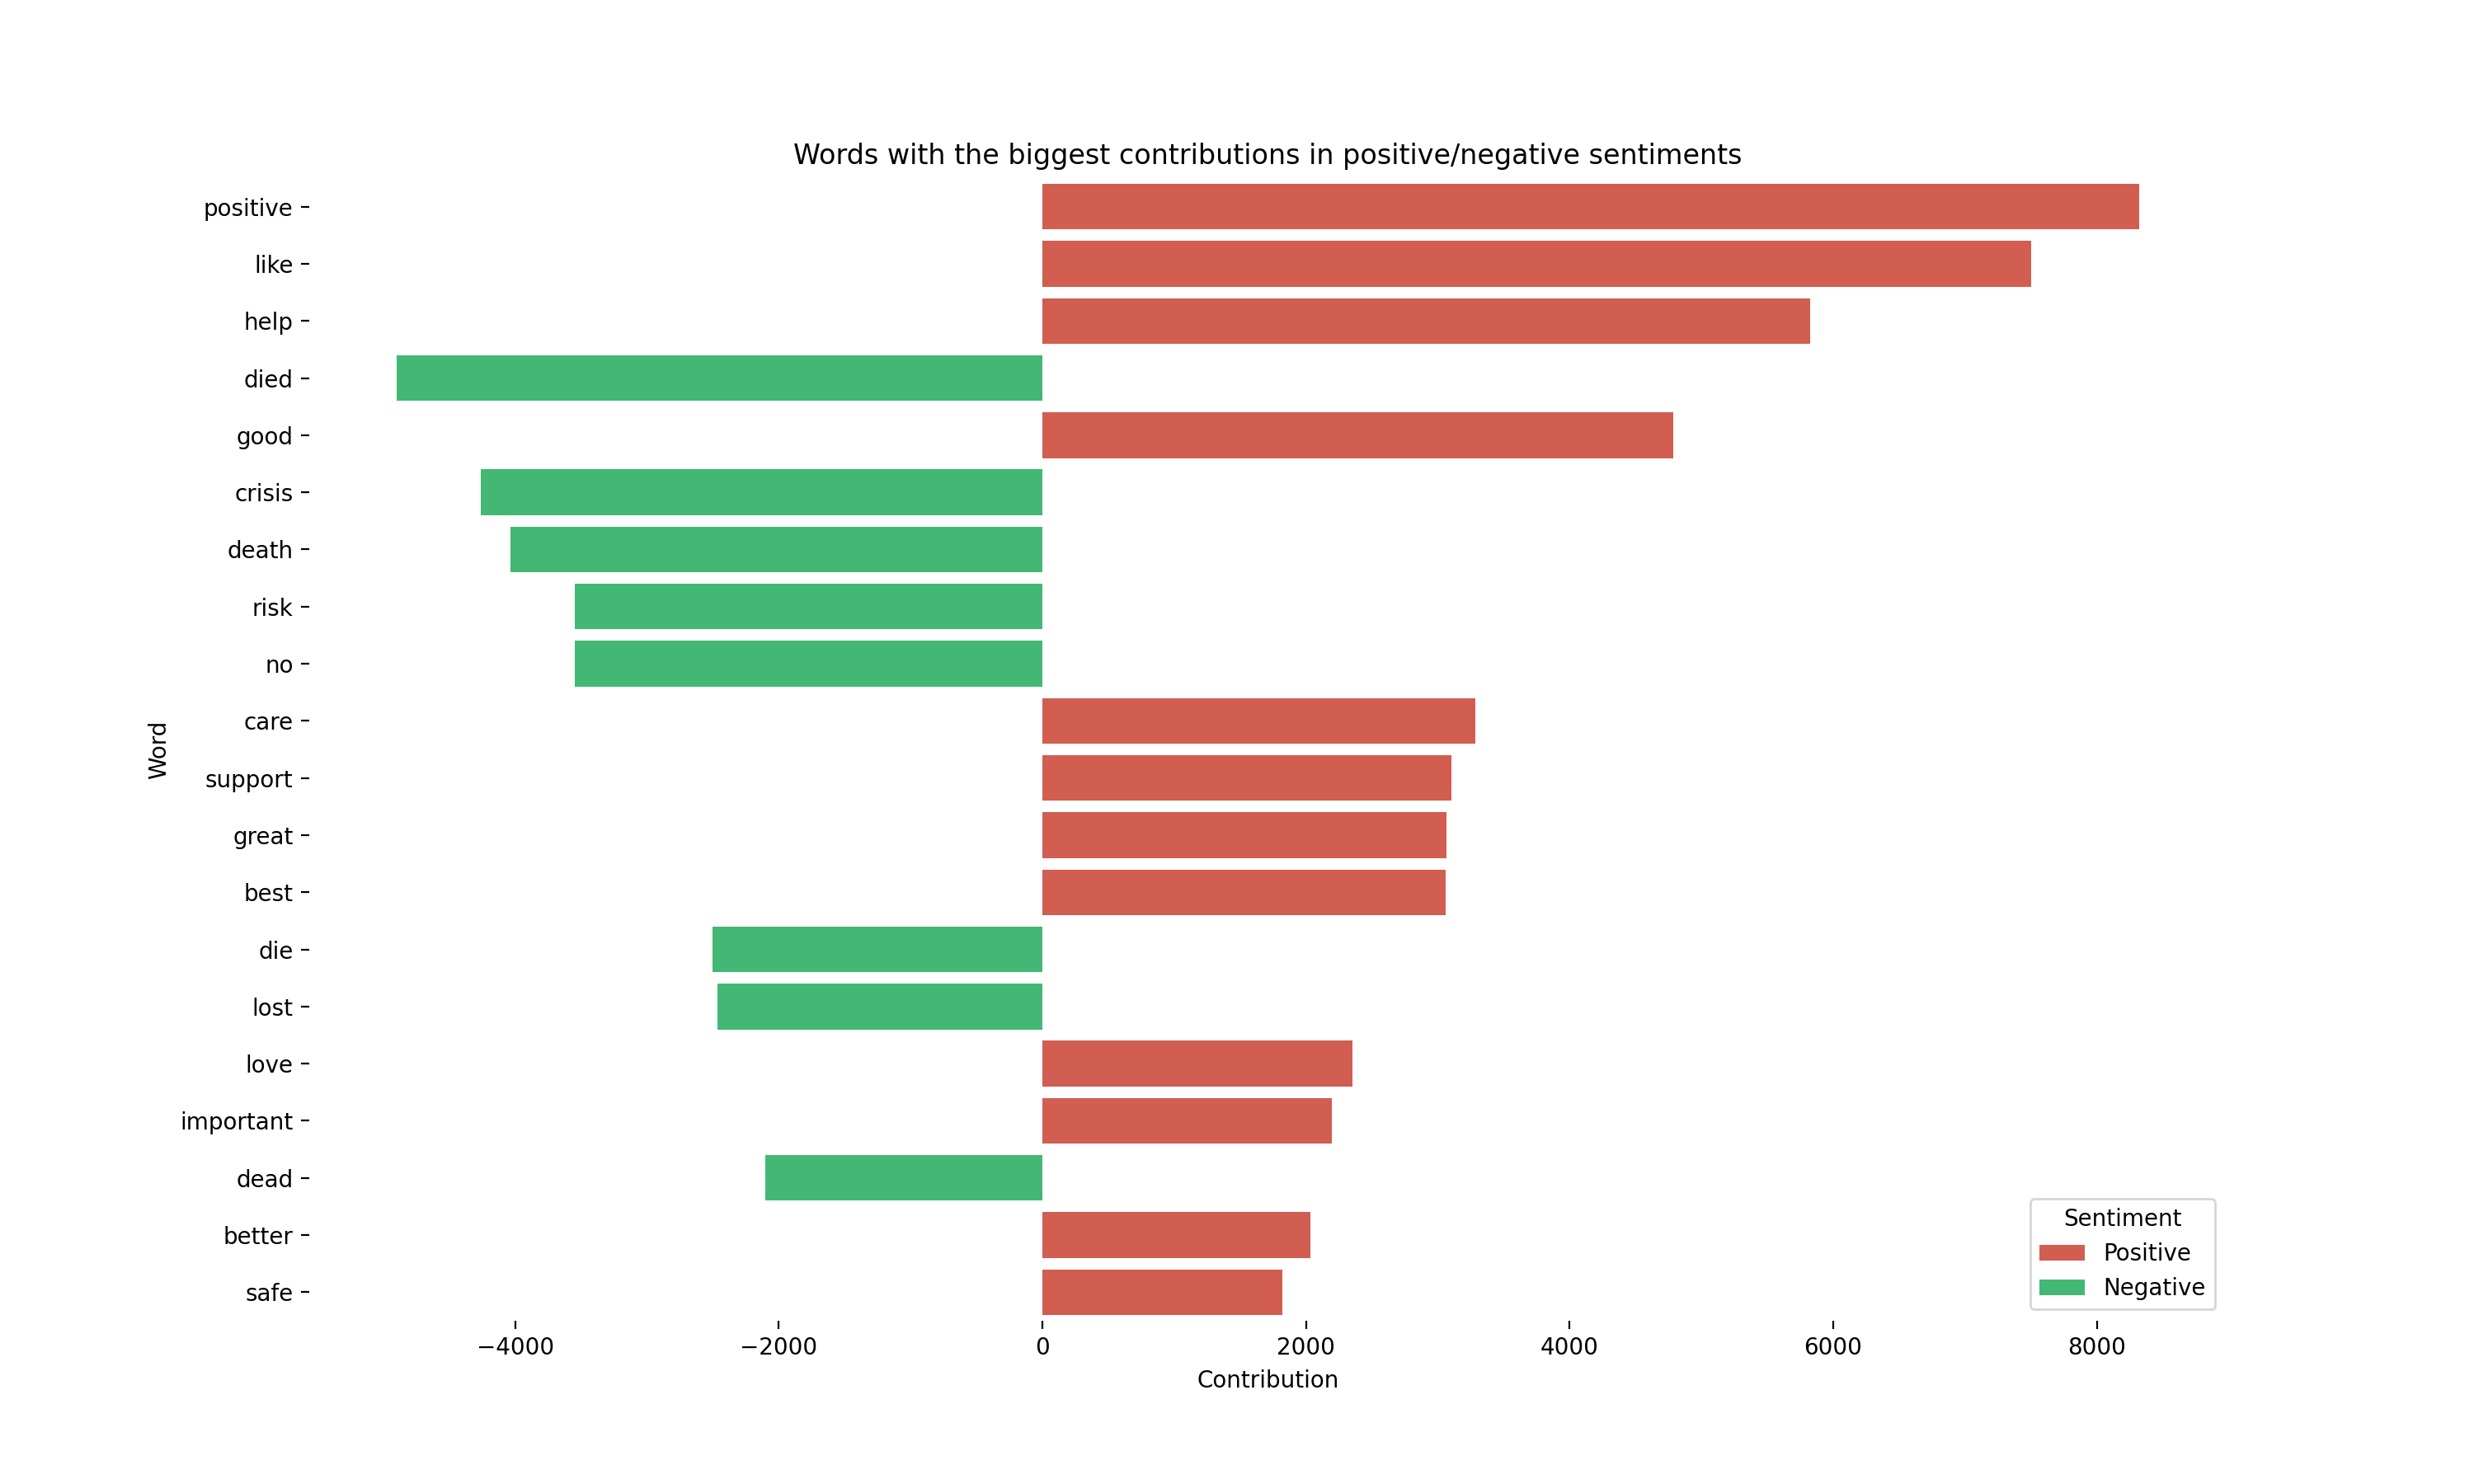

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'unnest_tweets' is your pandas DataFrame containing the tweets
# and 'afinn' is the sentiment lexicon DataFrame

# Merging and counting occurrences
merged_data = pd.merge(unnest_tweets, afinn, on="word")
word_counts = merged_data.groupby(['word', 'value']).size().reset_index(name='n')
word_counts['contribution'] = word_counts['n'] * word_counts['value']
word_counts['sentiment'] = word_counts['contribution'].apply(lambda x: "Positive" if x > 0 else "Negative")

# Selecting top 20 words by contribution
top_words = word_counts.assign(abs_contribution=word_counts['contribution'].abs())
top_words = top_words.sort_values(by='abs_contribution', ascending=False).head(20)

# Plotting
plt.figure(figsize=(15, 9))
color_for_negative = '#e74c3c'  # red color
color_for_positive = '#2ecc71'  # green color

sns.barplot(
    x='contribution',
    y='word',
    data=top_words,
    hue='sentiment',
    dodge=False,
    palette=[color_for_negative, color_for_positive]
)

plt.xlabel('Contribution')
plt.ylabel('Word')
plt.title('Words with the biggest contributions in positive/negative sentiments')
plt.legend(title='Sentiment', loc='lower right')
sns.despine(left=True, bottom=True)  # Removing the spines for aesthetic purposes
plt.show()


In [ ]:
pip install wordcloud matplotlib selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.7 MB/s eta 0:00:00


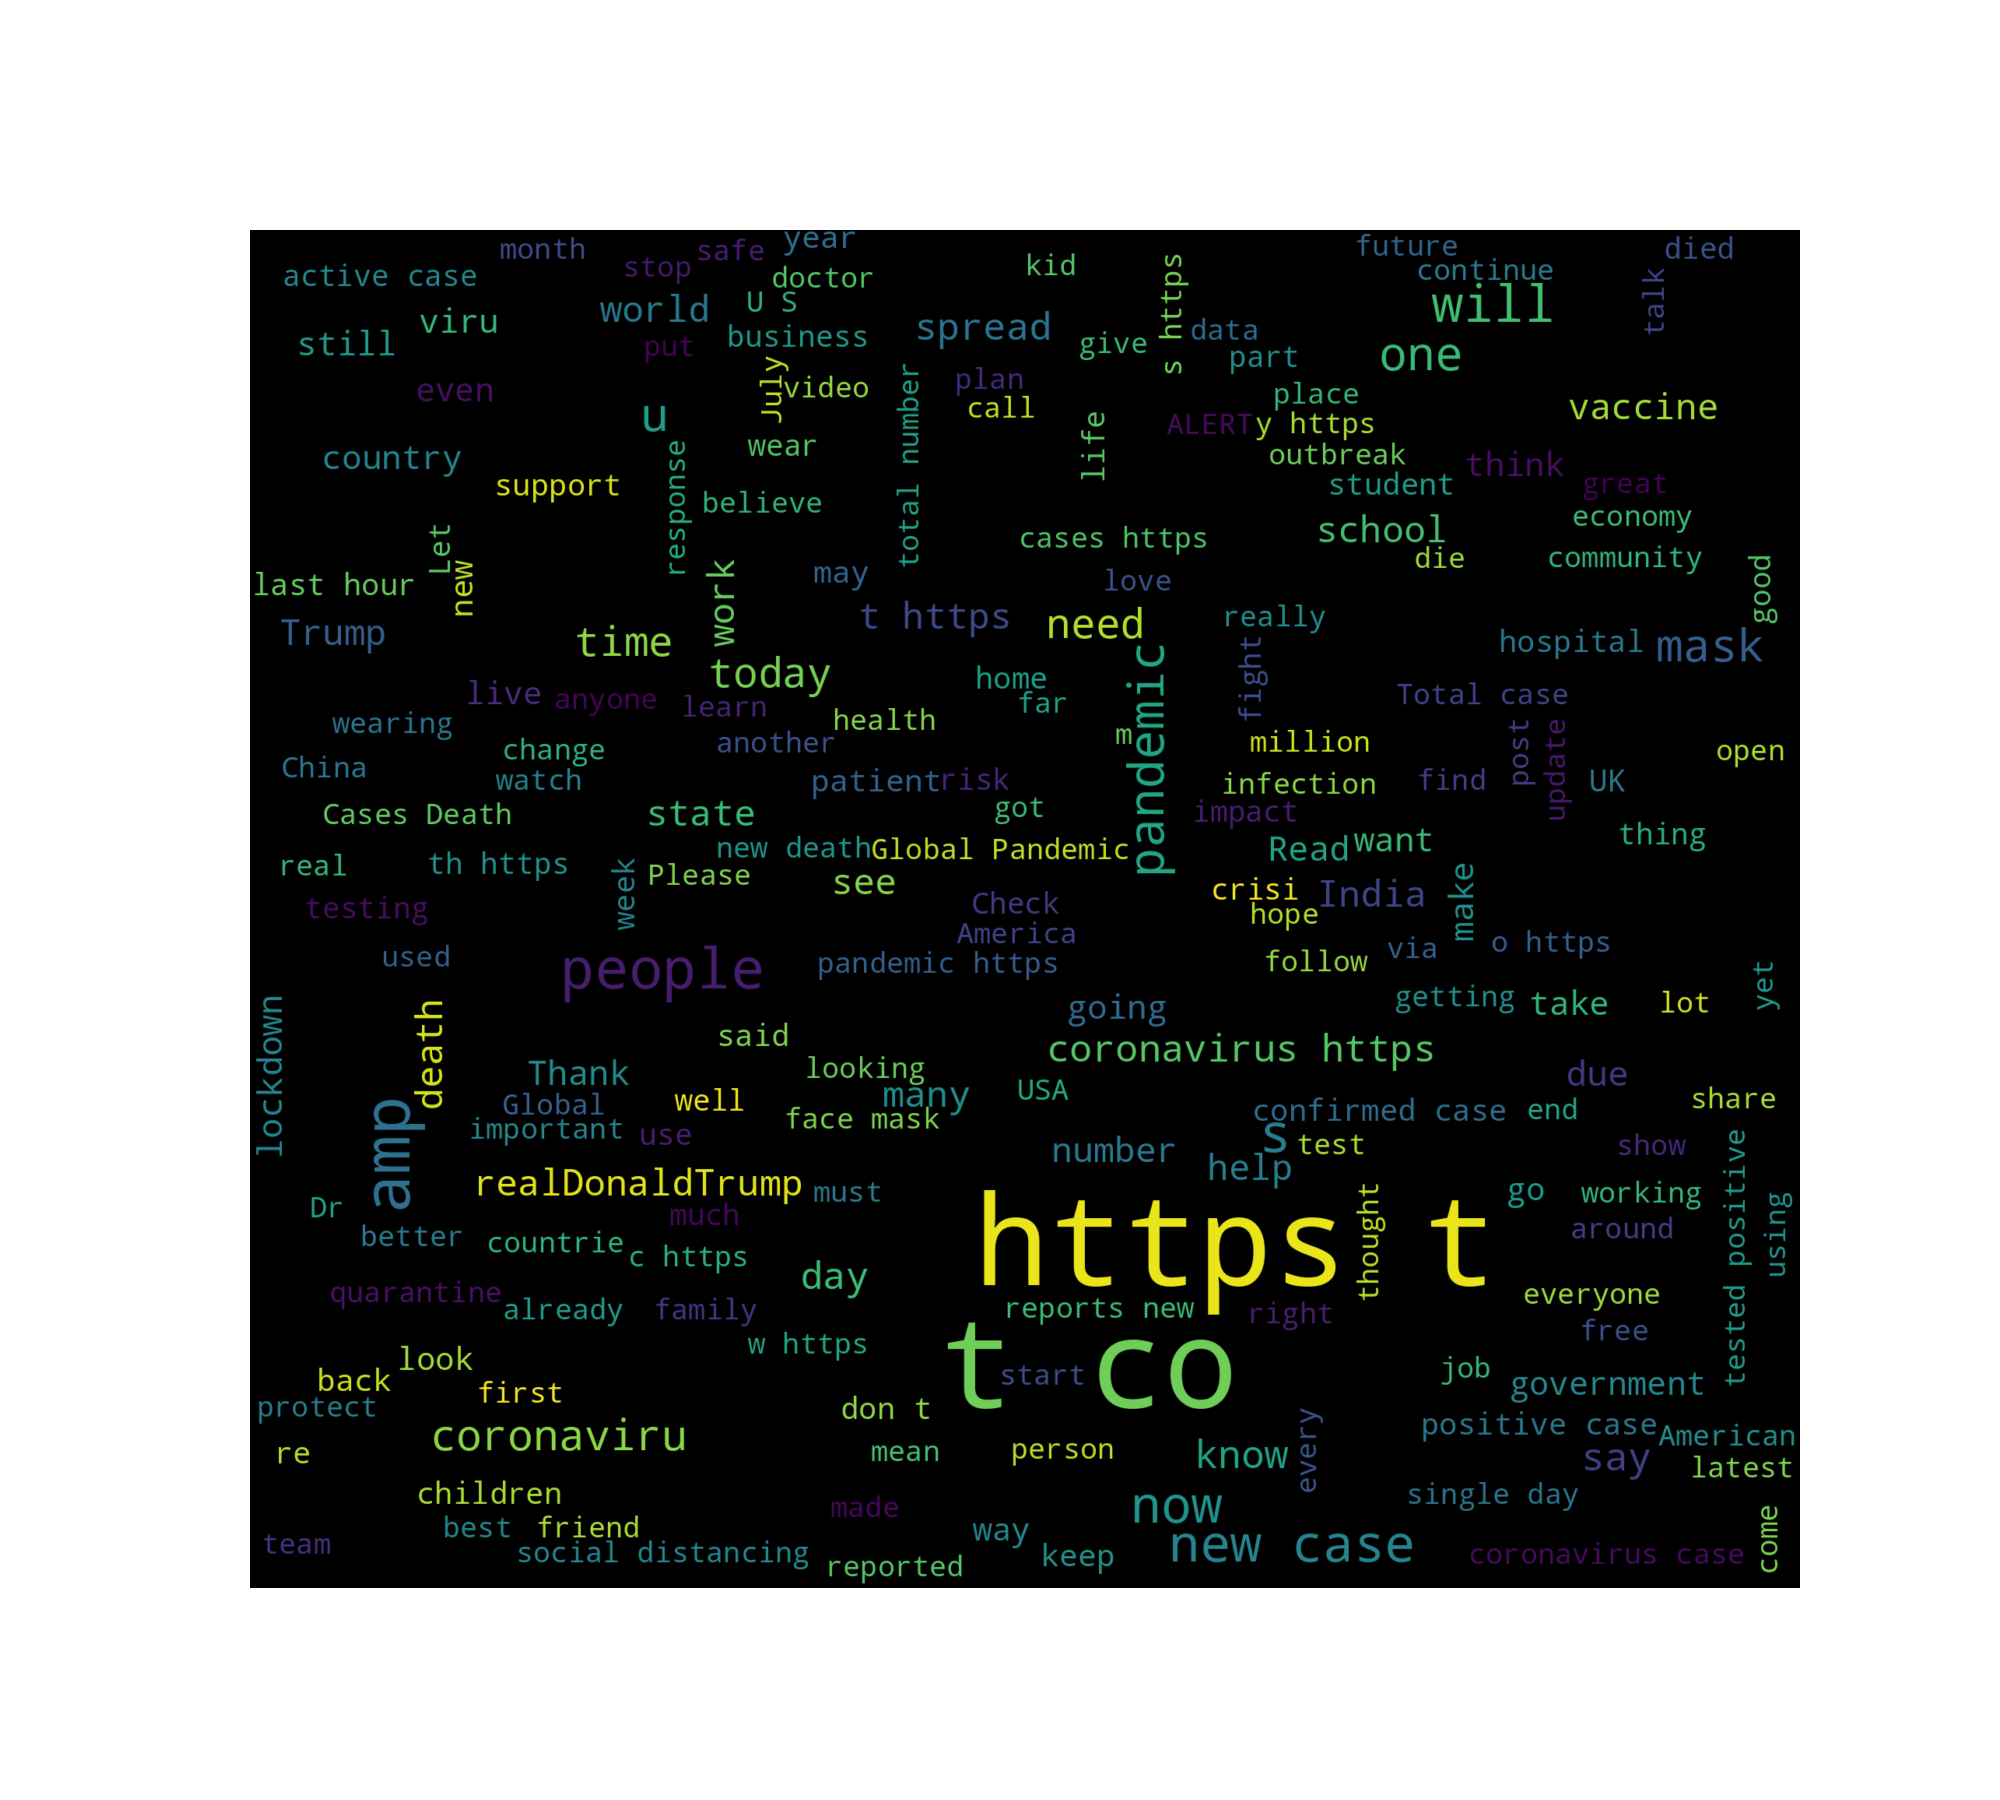

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'tweets' is your pandas DataFrame and it has a column 'text' with tweet content
# Remove the word "covid" from the text
tweets['text'] = tweets['text'].str.replace('covid', '', case=False)

# Join all tweets into a single string
text = " ".join(tweet for tweet in tweets['text'])

# Generate word cloud
wordcloud = WordCloud(
    width=1992,
    height=1744,
    background_color='black',
    colormap='viridis',  # or any matplotlib colormap
    min_font_size=9,
    max_font_size=160
).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the word cloud to a file
wordcloud.to_file("word_cloud.png")

In [ ]:
import pandas as pd
from nltk import bigrams
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Assuming 'tweets' is your pandas DataFrame containing the tweets
# First, filter the tweets by country
filtered_tweets = tweets[tweets['country'].isin(["US", "UK", "India", "NoCountry"])]

# Drop NA values from 'text' column
filtered_tweets = filtered_tweets.dropna(subset=['text'])

# Tokenize the text and create bigrams
# You might need to preprocess the text to remove punctuation and stopwords

# It's a good idea to download the stopwords package if you haven't already
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing function to remove punctuation and stopwords
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

# Create bigrams
bigram_list = []
for text in filtered_tweets['text']:
    words = preprocess(text)
    bigram_list.extend(list(bigrams(words)))

# Calculate frequency distribution
bigram_freq = FreqDist(bigram_list)

# Get the 25 most common bigrams
most_common_bigrams = bigram_freq.most_common(25)

# Print or convert to a DataFrame if needed
print(most_common_bigrams)
# If you want to create a DataFrame
bigram_df = pd.DataFrame(most_common_bigrams, columns=['bigram', 'count'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(('new', '19'), 90), (('positive', 'cases'), 74), (('19', 'cases'), 68), (('19', 'positive'), 65), (('deaths', 'reported'), 47), (('total', 'number'), 33), (('reported', 'state'), 31), (('24', 'hours'), 27), (('last', '24'), 26), (('cases', 'amp'), 23), (('today', 'total'), 21), (('active', 'cases'), 18), (('number', 'cases'), 18), (('cases', 'reported'), 17), (('discharges', 'amp'), 16), (('state', 'today'), 15), (('cases', 'including'), 14), (('taking', 'total'), 13), (('today', 'till'), 12), (('total', 'positive'), 12), (('health', 'insurance'), 11), (('total', 'cases'), 11), (('19', 'pandemic'), 11), (('📲', '9845684754'), 10), (('9845684754', 'starhealthinsurance'), 10)]


In [ ]:
bigram_df.head()

bigram  count
0           (new, 19)     90
1   (positive, cases)     74
2         (19, cases)     68
3      (19, positive)     65
4  (deaths, reported)     47

<ipython-input-47-60c0c49ba82d>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




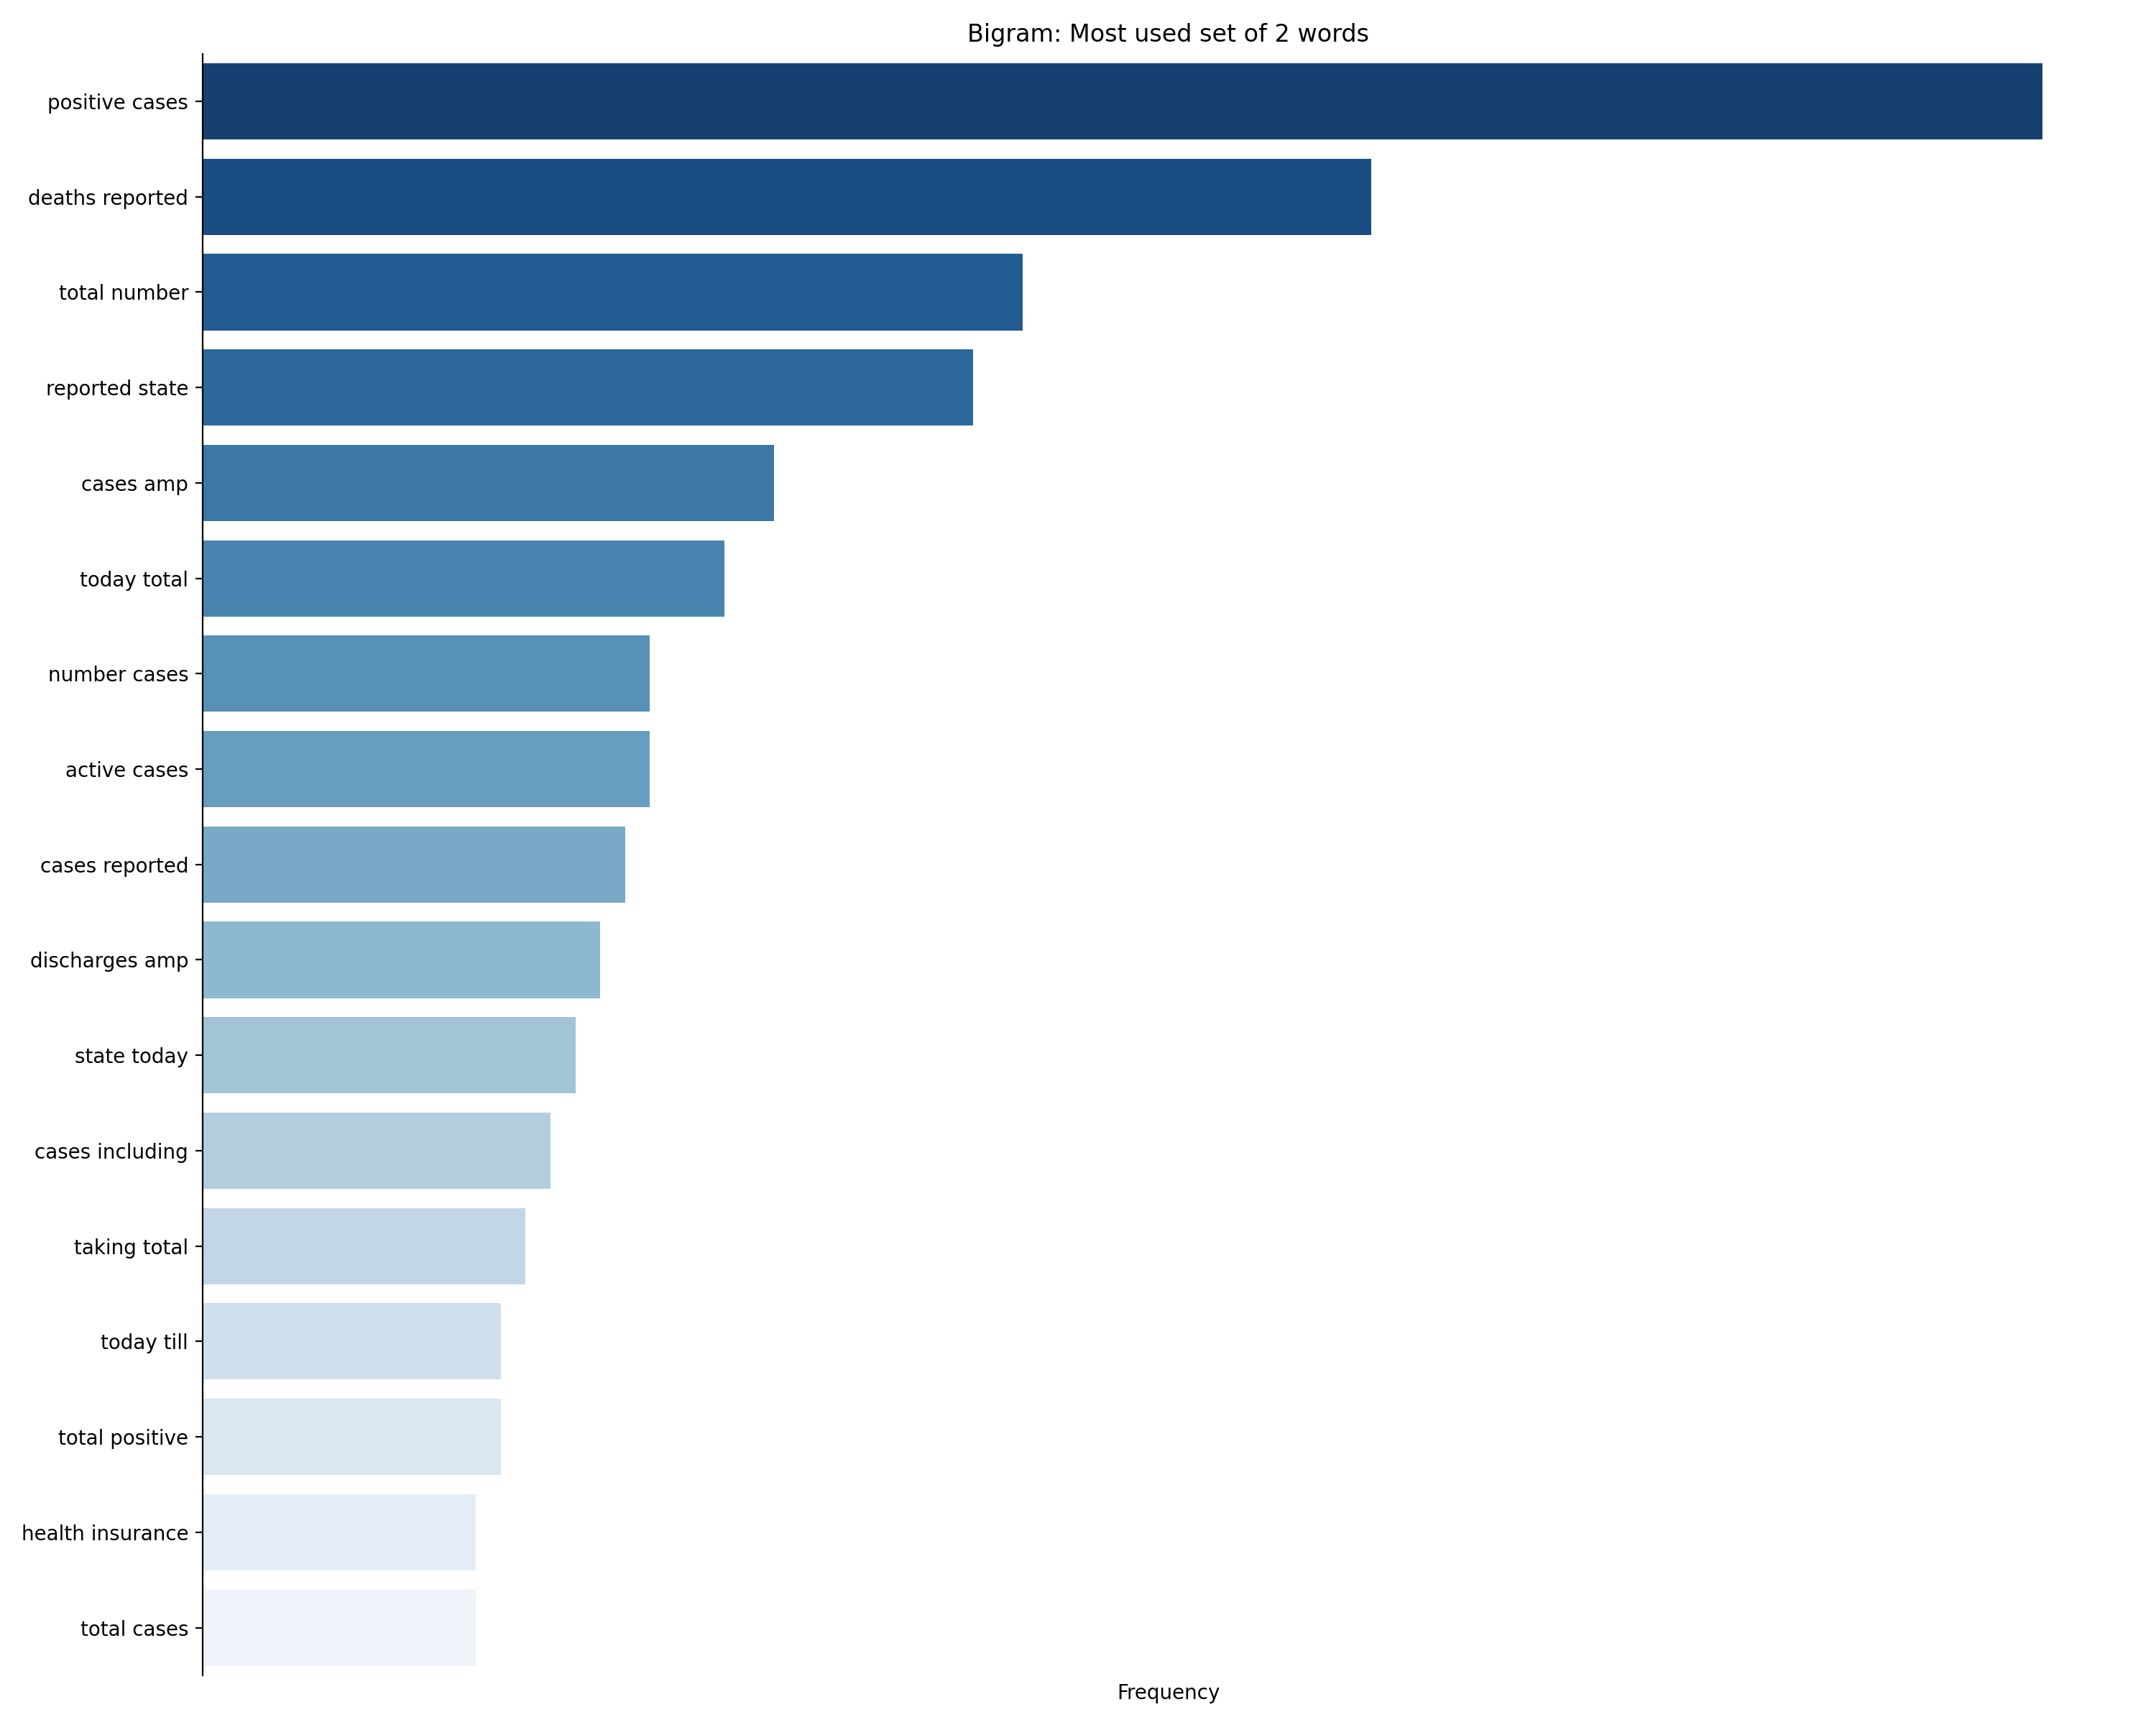

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# bigram_df is already defined with 'bigram' and 'count' according to your uploaded file

# We need to convert the 'bigram' tuple into a string if it's not already
bigram_df['bigram_str'] = bigram_df['bigram'].apply(lambda x: ' '.join(x))

# Now we filter out any rows where 'bigram_str' contains digits
bigram_df = bigram_df[~bigram_df['bigram_str'].str.contains(r'\d')]

# Sort the DataFrame based on the frequency count in descending order
bigram_df_sorted = bigram_df.sort_values(by='count', ascending=True)

# Set the plot size
plt.figure(figsize=(15, 12))

# Create the bar plot using seaborn
barplot = sns.barplot(
    x='count',
    y='bigram_str',
    data=bigram_df_sorted,
    palette=sns.color_palette("Blues", len(bigram_df_sorted))  # Change to your preference
)

# Remove the axes splines except the left one
sns.despine(left=False, bottom=True, right=True, top=True)

# Set title and labels
plt.title('Bigram: Most used set of 2 words')
plt.xlabel('Frequency')
plt.ylabel('')

# Invert the y-axis to have the largest bar at the top
plt.gca().invert_yaxis()

# Remove x-axis labels
plt.xticks([])

# Adjust plot to fit the window
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import pandas as pd
from nltk import trigrams
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

# Assuming 'tweets' is your pandas DataFrame containing the tweets

# Filter the DataFrame for specific countries
filtered_tweets = tweets[tweets['country'].isin(["US", "UK", "India", "NoCountry"])]

# Drop rows with missing text
filtered_tweets = filtered_tweets.dropna(subset=['text'])

# Tokenize the text and create trigrams
# It's a good idea to download the stopwords package if you haven't already
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def preprocess(text):
    # Lowercase the text
    text = text.lower()
    # Remove non-alphabetic characters and split into words
    words = re.sub(r'[^a-z\s]', '', text).split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

# Generate trigrams
trigram_list = []
for text in filtered_tweets['text']:
    tokens = preprocess(text)
    trigram_list.extend(list(trigrams(tokens)))

# Get the 25 most common trigrams
trigram_freq = FreqDist(trigram_list)
most_common_trigrams = trigram_freq.most_common(25)

# Create a DataFrame for the trigrams
trigram_df = pd.DataFrame(most_common_trigrams, columns=['trigram', 'count'])

# Show the DataFrame
print(trigram_df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                          trigram  count
0          (new, positive, cases)     44
1         (amp, deaths, reported)     38
2          (total, number, cases)     21
3            (cases, amp, deaths)     19
4       (deaths, reported, state)     18
5        (total, positive, cases)     16
6       (discharges, amp, deaths)     16
7        (cases, discharges, amp)     15
8        (reported, state, today)     15
9          (positive, cases, amp)     13
10         (today, total, number)     12
11     (including, active, cases)     11
12              (till, pm, total)     11
13  (positive, cases, discharges)     11
14           (state, today, till)     10
15           (last, hours, total)     10
16    (positive, cases, reported)      9
17           (new, cases, deaths)      9
18     (rajasthan, new, positive)      8
19        (new, cases, including)      8
20      (positive, cases, deaths)      7
21              (today, till, pm)      7
22   (positive, cases, including)      7
23        (new, 

<ipython-input-49-92042ec79d44>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




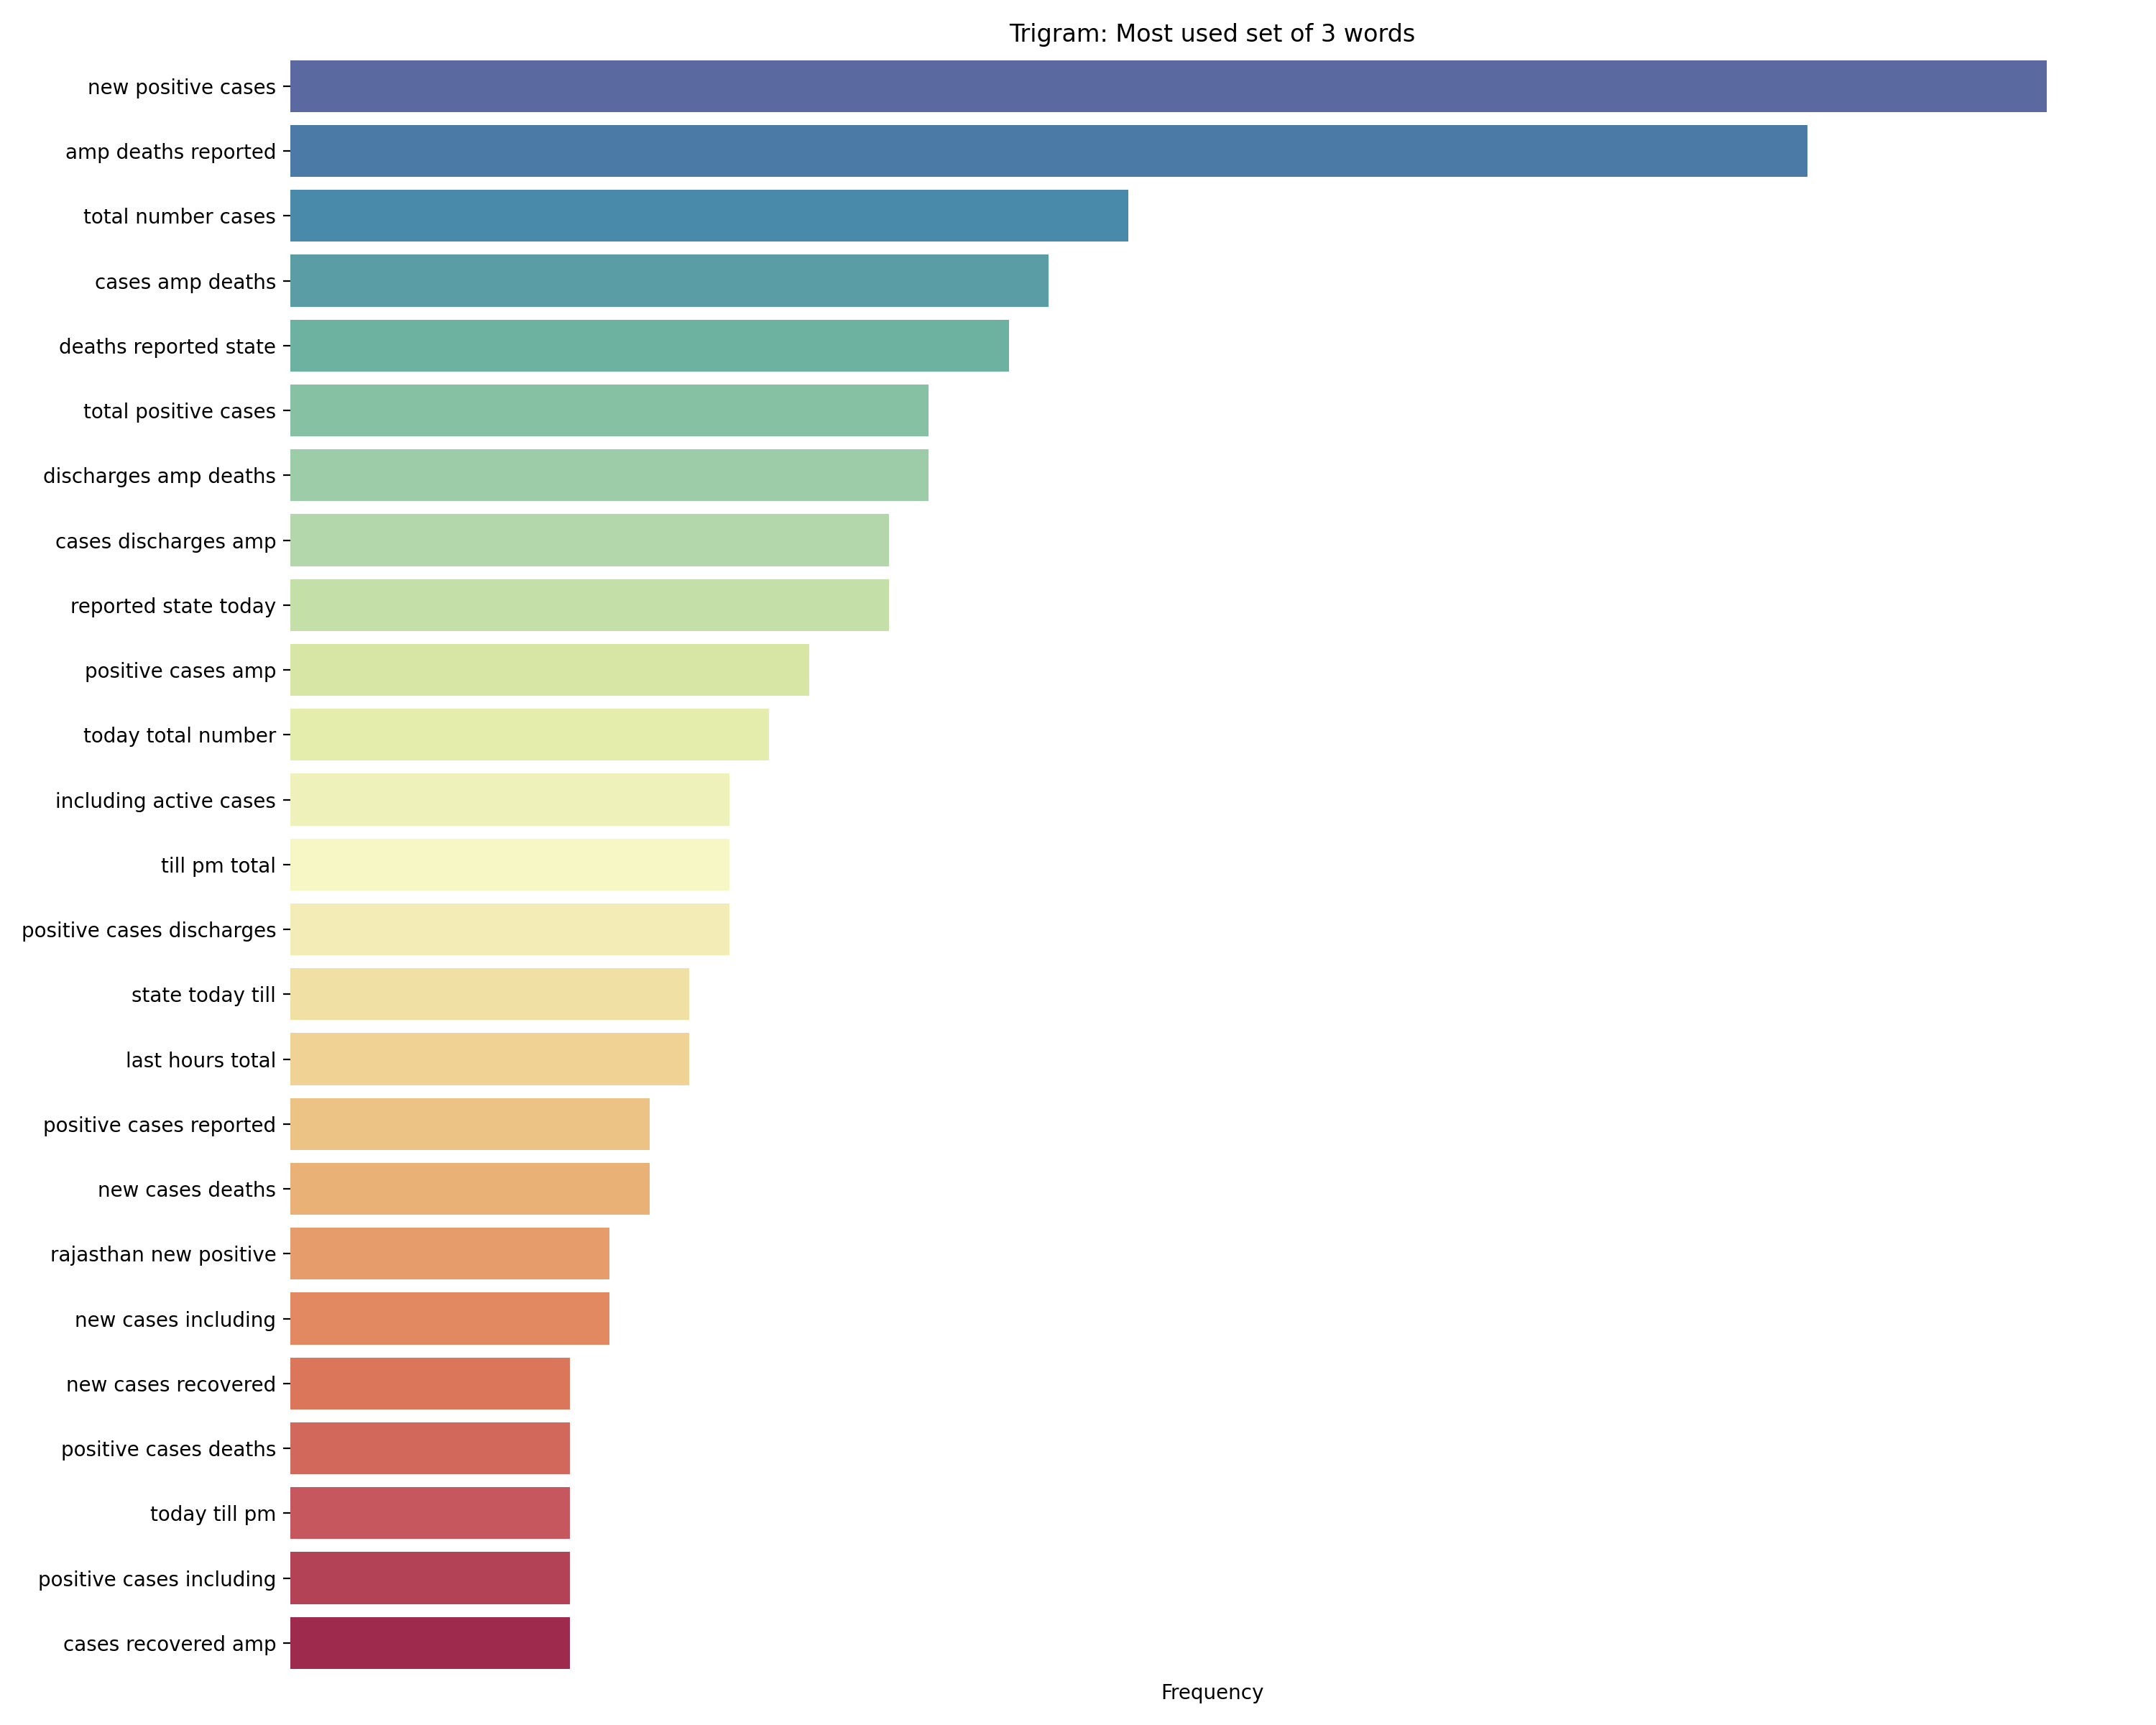

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's assume that 'trigram_df' is the DataFrame that contains the trigram data
# with columns 'trigram' and 'count', similar to how 'bigram_df' was structured.

# Convert the trigram tuples into strings if they are not already in that format
trigram_df['trigram_str'] = trigram_df['trigram'].apply(lambda x: ' '.join(x))

# Sort the DataFrame by count in ascending order to have the largest bar at the top when plotted
trigram_df_sorted = trigram_df.sort_values('count', ascending=True)

# Set the plot size
plt.figure(figsize=(15, 12))

# Create the bar plot using seaborn
barplot = sns.barplot(
    x='count',
    y='trigram_str',
    data=trigram_df_sorted,
    palette=sns.color_palette("Spectral", n_colors=len(trigram_df_sorted))  # Choose a color palette
)

# Customizing the plot
plt.title('Trigram: Most used set of 3 words')
plt.xlabel('Frequency')
plt.ylabel('')

# Invert the y-axis to have the largest bar at the top
plt.gca().invert_yaxis()

# Adjust the space to the left of the y-axis to prevent clipping of labels
plt.gcf().subplots_adjust(left=0.3)  # Adjust as needed

# Hide x-axis tick labels
plt.xticks([])

# Remove all spines except the left spine
sns.despine(left=True, bottom=True, right=True, top=True)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
pip install networkx matplotlib pyvis plotly python-igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.5 MB/s eta 0:00:00


In [ ]:
pip install mayavi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 25.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.9/268.9 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.7 MB/s eta 0:00:00
  Using cached vtk-9.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (92.0 MB)
  Created wheel for mayavi: filename=mayavi-4.8.1-cp310-cp310-linux_x86_64.whl size=16167219 sha256=6be3b65db775d41995d13ee2a93960f13f4769b810b91f384089aa1463bdfb65
  Stored in directory: /root/.cache/pip/wheels/c2/6b/23/49aa8ae5063a76fbc35ce90e74f8361cddb9d3a86d5a41ec0a
Successfully bu

In [ ]:
import pandas as pd
import re
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Assuming 'tweets' is your pandas DataFrame containing the tweets with a 'text' and 'country' column

# Filter the DataFrame for specific countries
filtered_tweets = tweets[tweets['country'].isin(["US", "UK", "India", "NoCountry"])]

# Drop rows with missing text
filtered_tweets = filtered_tweets.dropna(subset=['text'])

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Define a preprocessing function
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove semicolons and non-alphabetic characters, but keep spaces
    text = re.sub(r'[;]|[^a-z\s]', '', text)
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word != 'amp']
    return words

# Create bigrams from the tokenized words
bigram_list = [
    bigram for text in filtered_tweets['text'] for bigram in bigrams(preprocess(text))
]

# Create a DataFrame from the bigram list
bigram_df = pd.DataFrame(bigram_list, columns=['item1', 'item2'])

# Filter out any bigrams containing numbers or special characters
bigram_df = bigram_df[~(bigram_df['item1'].str.contains(r'\d|[^a-z]') |
                        bigram_df['item2'].str.contains(r'\d|[^a-z]'))]

# Calculate frequency of each bigram
bigram_freq = bigram_df.groupby(['item1', 'item2']).size().reset_index(name='n')

# Sort by frequency in descending order and take the top 25
bigram_freq = bigram_freq.sort_values(by='n', ascending=False).head(25)

# Inspect data
print(bigram_freq)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


           item1       item2   n
3599    positive       cases  74
3116         new       cases  52
1107      deaths    reported  47
3126         new    positive  45
564        cases      deaths  39
4905       total      number  33
3981    reported       state  31
2567        last       hours  24
3196      number       cases  23
4851       today       total  22
598        cases   including  20
4913       total    positive  20
38        active       cases  19
622        cases    reported  18
1214  discharges      deaths  17
566        cases  discharges  17
4475       state       today  15
620        cases  recoveries  14
4633      taking       total  13
2260   including      active  13
4803        till          pm  13
4882       total       cases  12
629        cases       state  12
4850       today        till  12
3538          pm       total  12


In [ ]:
import pandas as pd

# Assuming 'bigram_freq' is your pandas DataFrame resulting from the previous bigram processing

# Get distinct item1 and rename the column to 'label'
sources = bigram_freq[['item1']].drop_duplicates().rename(columns={'item1': 'label'})

# Get distinct item2 and rename the column to 'label'
destinations = bigram_freq[['item2']].drop_duplicates().rename(columns={'item2': 'label'})

# Display the dataframes
print(sources.head())
print(destinations.head())


         label
3599  positive
3116       new
1107    deaths
564      cases
4905     total
         label
3599     cases
1107  reported
3126  positive
564     deaths
4905    number


In [ ]:
import pandas as pd

# Assuming 'bigram_freq' is the bigram DataFrame with 'item1', 'item2', and 'n'

# Combine unique 'item1' and 'item2' into a single DataFrame of unique labels
unique_labels = pd.concat([bigram_freq['item1'], bigram_freq['item2']]).unique()
nodes = pd.DataFrame(unique_labels, columns=['label'])

# Create a unique ID for each node
nodes['id'] = range(1, len(nodes) + 1)

# Create the edges DataFrame
# First, merge bigram_freq with nodes to map 'item1' to its unique ID
edges = pd.merge(bigram_freq, nodes, left_on='item1', right_on='label')
edges = edges.rename(columns={'id': 'from'})

# Then, merge with nodes again to map 'item2' to its unique ID
edges = pd.merge(edges, nodes, left_on='item2', right_on='label')
edges = edges.rename(columns={'id': 'to', 'n': 'weight'})

# Select only 'from', 'to', and 'weight' for the final edges DataFrame
edges = edges[['from', 'to', 'weight']]

# Display the dataframes
print(nodes.head())
print(edges.head())


      label  id
0  positive   1
1       new   2
2    deaths   3
3     cases   4
4     total   5
   from  to  weight
0     1   4      74
1     2   4      52
2     5   4      12
3     8   4      23
4    10   4      19


In [ ]:
pip install networkx

In [ ]:
import networkx as nx

# Assuming 'edges' and 'nodes' are already defined DataFrames

# Create a directed graph from the edges DataFrame
net = nx.from_pandas_edgelist(edges, source='from', target='to', edge_attr='weight', create_using=nx.DiGraph())

# Simplify the graph by removing self-loops
net.remove_edges_from(nx.selfloop_edges(net))

# Now 'net' is the simplified NetworkX graph object


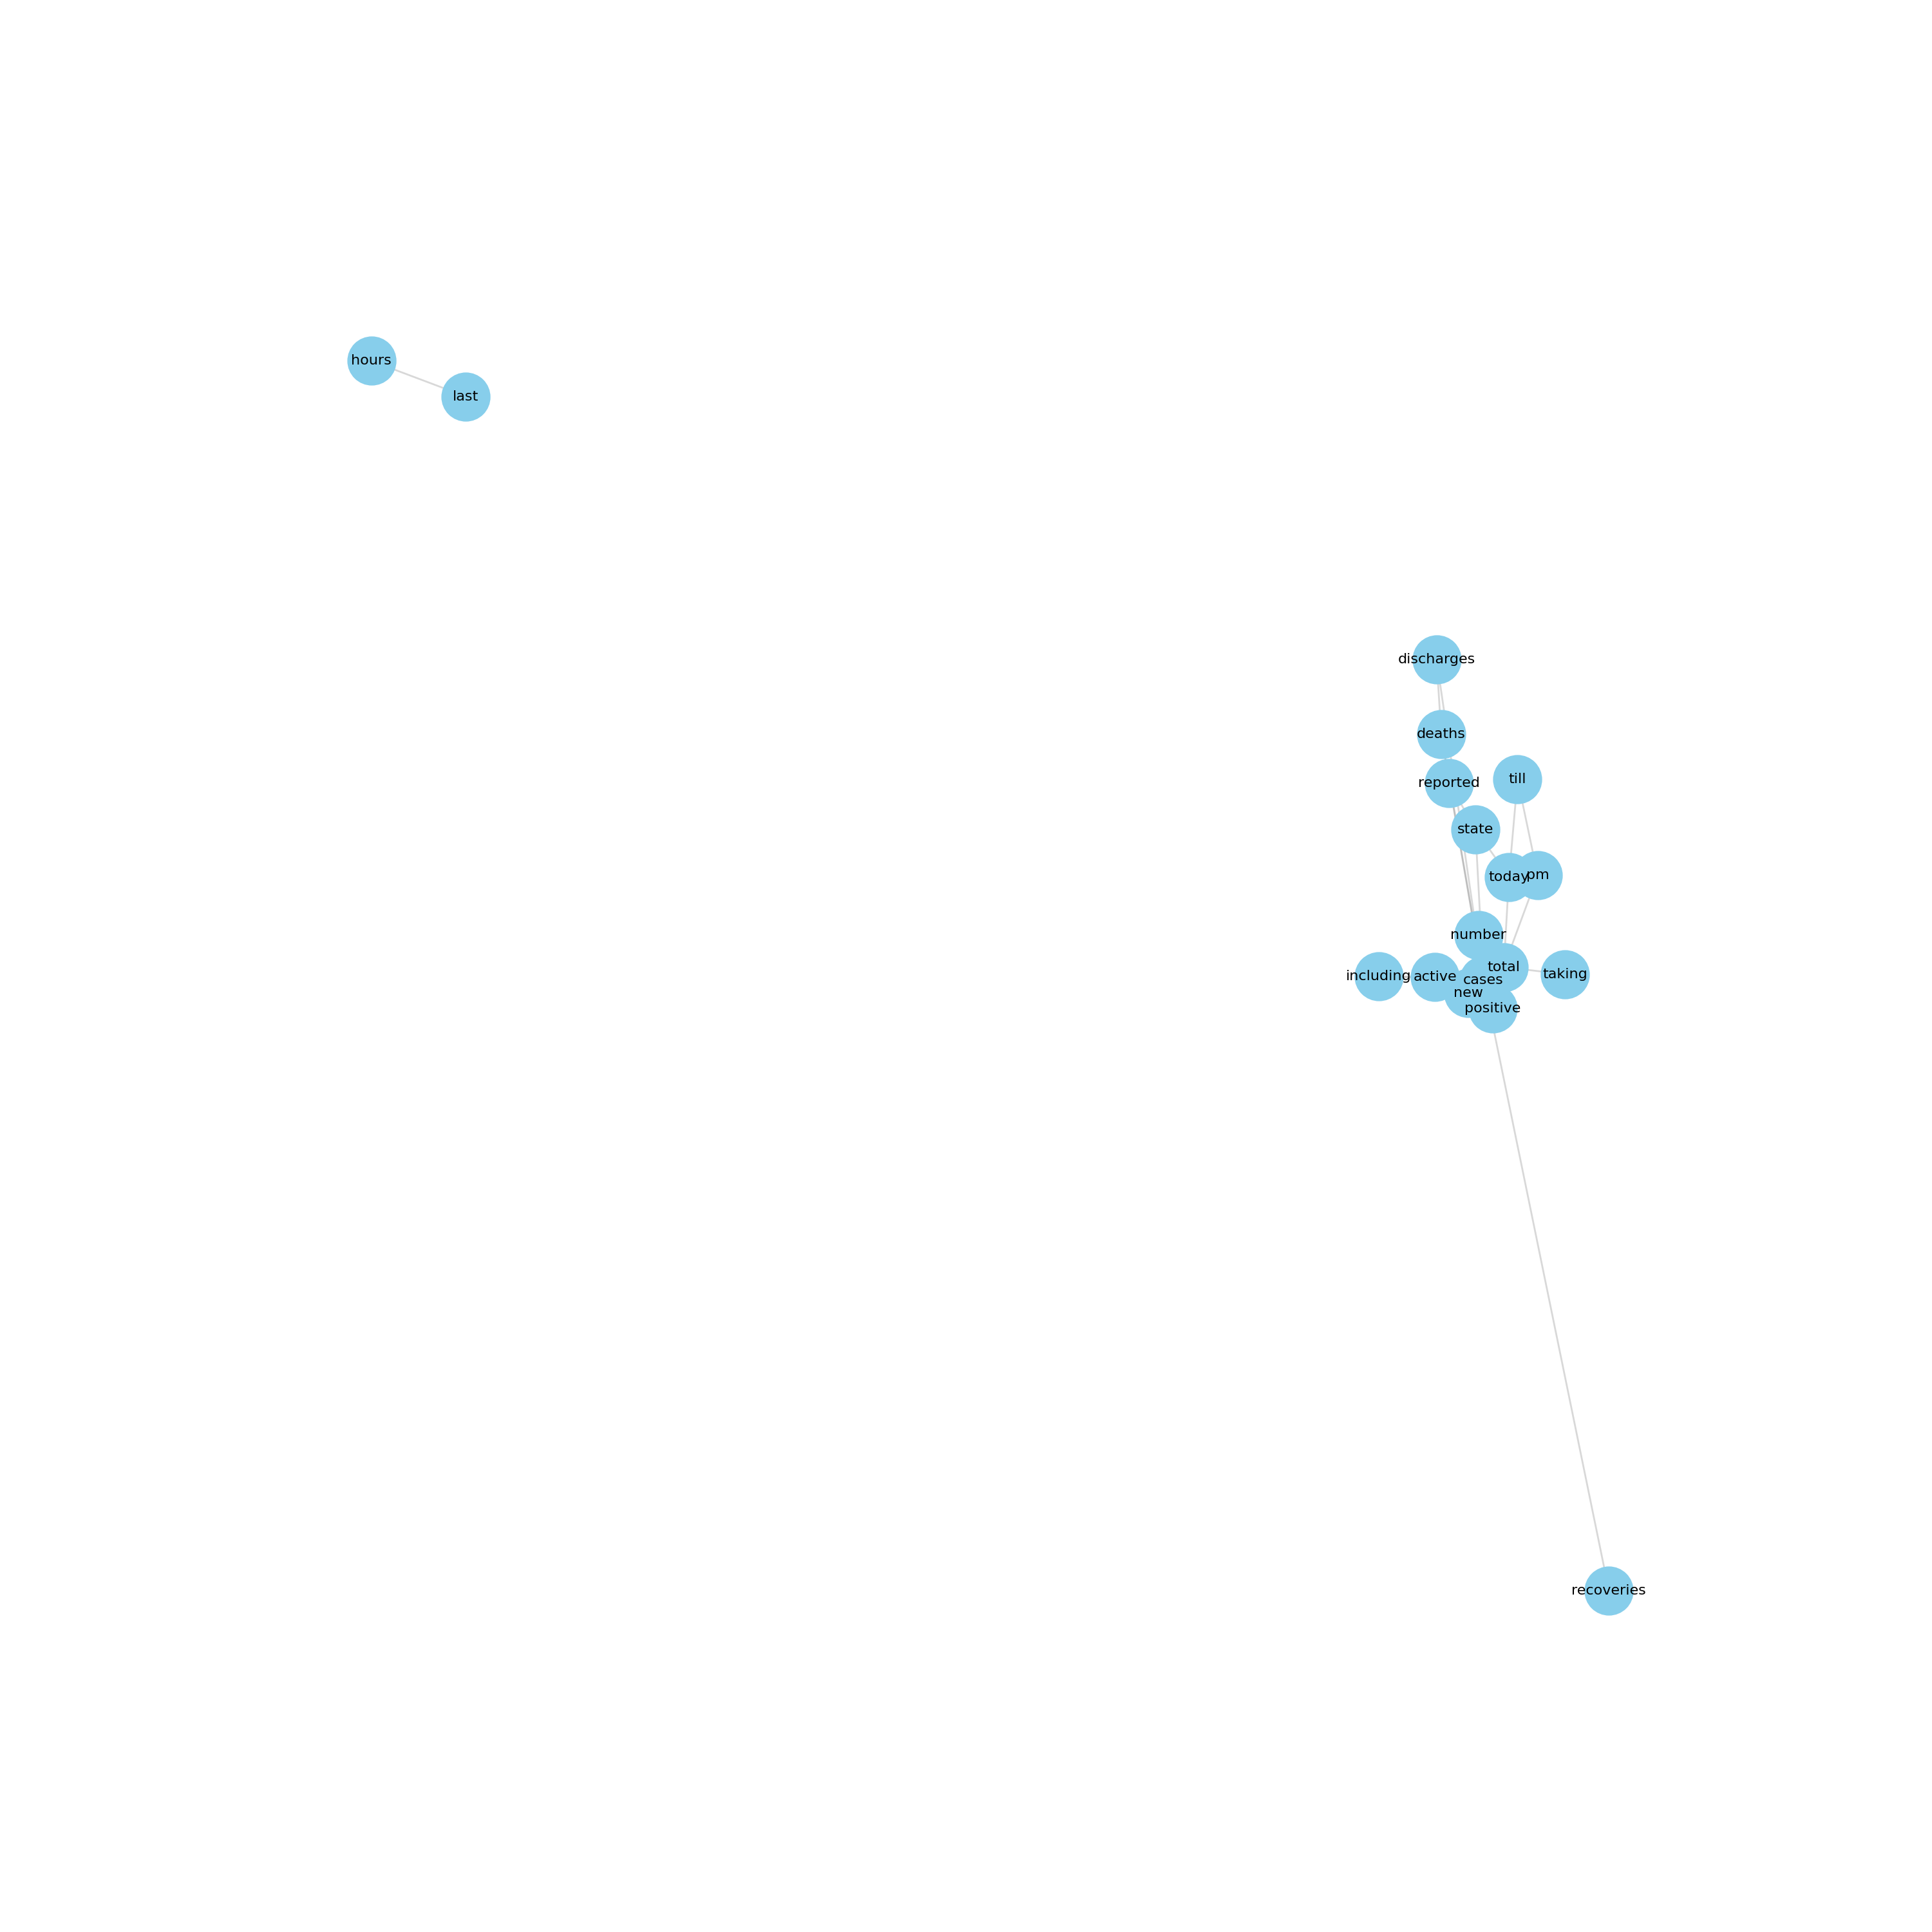

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd


# Create a directed graph from the edges and nodes DataFrames
G = nx.from_pandas_edgelist(edges, source='from', target='to', edge_attr=True, create_using=nx.DiGraph())

# Add node labels
for node in G.nodes():
    G.nodes[node]['label'] = nodes[nodes['id'] == node]['label'].values[0]

# Generate a layout for the graph
pos = nx.spring_layout(G, seed=42)

# Draw the network graph with node labels
plt.figure(figsize=(15, 15))  # Set the size of the plot
edges = nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray', arrows=False)
nodes = nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)
labels = nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=8)

plt.axis('off')  # Turn off the axis
plt.show()  # Show the plot
